In [3]:
library(gridExtra)
library(matrixStats)
library(dplyr)
library(rlang)
library(reshape2)
library(clusterCrit)
library(grid)
library(ggrepel)
library(RColorBrewer)
library(dplyr)
library(IRdisplay)
library(scales)
library(survival)
library(corrplot)
library(Hmisc)
library(ggplot2)
library(survminer)
library(muhaz)
library(dplyr)
library(stringr)
options(warn=-1)
library(glmnet)
library(doMC)
library(survival)
library(data.table)
library(mltools)
library(CoxBoost)
library(randomForestSRC)
library(CoxHD)
library(broom)
library(logistf)
library(ggfortify)
source('../../src/tools.R')     # custom tools function
source('../../src/hdp_tools_yanis.R')
source("../../src/merge_df.R")
source("../../src/my_toolbox.R")
source("../../src/my_components.R")
source("../../src/my_utils.R")
source("../../src/ggstyles.R")
source("../../src/my_hotspots.R")
###


theme_set(theme_minimal())

# set jupyer notebook parameters
options(repr.plot.res        = 100, # set a medium-definition resolution for the jupyter notebooks plots (DPI)
        repr.matrix.max.rows = 200, # set the maximum number of rows displayed
        repr.matrix.max.cols = 200) # set the maximum number of columns displayed

In [4]:
colors_analysis <- c(gen="#BFBFBF",cyto="#2b8cbe")

In [5]:
# val=c("grey45", "#e79f00", "#009E73","#0072B2",  "#CC79A7",
#         "#9ad0f3", "#D55E00", 
#         "lightgoldenrod","lightskyblue","#F0E442",
#         "firebrick3","#000000","#870C14","#a6bddb","mistyrose4","#fdbb84","deeppink","darkseagreen","black")
val = c("#EE9937","#5C5C5C","#870C14","#BFBFBF","#59A08B","#2b8cbe","#a6bddb","#fdbb84","#e79f00","#000000","darkseagreen","lightskyblue","#0072B2","pink","blue","green")
plot_surv <-function(fit,tmp,submain="",vals=val,legend="top"){
    ggsurvplot(fit,  pval = TRUE,main = "Survival curve",risk.table=T,submain = submain,palette=vals,legend=legend,risk.table.col = "strata",linetype = 1,pval.size=6,pval.coord=c(0,0.05),risk.table.fontsize=8,xlab="Time (years)",
                  ggtheme = theme_survminer(
                 font.main = c(20, "bold", "black"),
                 font.submain = c(20, "bold.italic", "black"),
                 font.legend=24,
                 font.caption = c(20, "plain", "black"),
                 font.x = c(14, "bold.italic", "black"),
                 font.y = c(14, "bold.italic", "black"),
                 font.tickslab = c(16, "plain", "black")))

}

In [6]:
df_w_correlates <- read.table("../clustering/clustering_Final_1/df_final_full_component.tsv")
df_final <- read.table("../clustering/clustering_Final_1/df_final_full_component.tsv")
col_list <- c("t_15_17","inv_16","t_8_21","t_11","t_6_9","inv_3","additions","TP53_complex","NPM1","CEBPA_bi","DNMT3A_IDH1_2","WT1","chr_splicing_multiple","chr_splicing_1","not_assigned","no_events")

genes <- colnames(df_final[,c(5:88)])

cytos <- colnames(df_final[,c(89:158)])

eln <- colnames(df_final[,c(2,3,4)])
comp <- colnames(df_final[,c(170:186)])

all_gen <- c(5:88)
vect <- apply(X=df_final[,all_gen],2,FUN=function(x) 100*length(which(x==1))/dim(df_final)[1])
gen <- colnames(df_final[,match(names(vect[vect>=2]),names(df_final))])

all_cyto <- c(89:158)
vect <- apply(X=df_final[,all_cyto],2,FUN=function(x) 100*length(which(x==1))/dim(df_final)[1])
cyto <- colnames(df_final[,match(names(vect[vect>=2]),names(df_final))])

clin <- colnames(df_final[,c(159:165)])
demo <- colnames(df_final[,c(166:167)])
pal <- c(eln="#EE9937",comp="#59A08B",gen="#BFBFBF",cyto="#2b8cbe",clin="#870C14",demo="#a6bddb",age="#a6bddb",gen_cyto="pink",eln_gen_cyto="#fdbb84",comp_gen_cyto="lightgoldenrod",all="lightsalmon")  
colors <- c("black","gray1","grey45", "#e79f00", "#009E73","#0072B2",  "#CC79A7",
"#9ad0f3", "#D55E00", 
"lightgoldenrod","lightskyblue","#F0E442",
"firebrick3","#000000","#870C14","#a6bddb","mistyrose4","#fdbb84","gray","deeppink","darkblue","darkred","darkgreen","purple","forestgreen","gray2")

In [7]:
cols_component <- colnames(df_final %>% dplyr:: select(starts_with("full_component_")))
tmp <- NULL
for (comp in cols_component){
    tmp1 <- df_w_correlates[df_w_correlates[,comp]==1,]
    tmp1$comparison <- str_remove(comp,"full_component_")
    tmp <- rbind(tmp,tmp1)
    }
tmp$fill_pal <- factor(tmp$comparison)
color_values <- c("grey45", "#e79f00", "#009E73","#0072B2",  "#CC79A7","#9ad0f3", "#D55E00", "lightgoldenrod","lightskyblue","#F0E442",
                  "firebrick3","#000000","#870C14","#a6bddb","mistyrose4","#fdbb84","gray","deeppink","darkblue","darkred","darkgreen",
                  "purple","forestgreen")
names(color_values) <- levels(factor(tmp$fill_pal))
color_values["overlap"] <- "purple"

In [8]:
plot_surv <-function(fit,tmp,submain="",vals=val,legend="top",risk.tab=T, leg.labs = "",remove=F){
    p <-ggsurvplot(fit,  pval = TRUE,main = "Survival curve",risk.table=risk.tab,submain = submain,palette=vals,legend=legend,risk.table.col = "strata",pval.size=8,pval.coord=c(0,0.05),risk.table.fontsize=10,xlab="Time (years)",
               legend.labs=leg.labs,
               linetype=1,size=4,
                  ggtheme = theme_survminer(
                 font.main = c(30, "bold", "black"),
                 font.submain = c(30, "bold.italic", "black"),
                 font.legend=28,
                 font.caption = c(30, "plain", "black"),
                 font.x = c(24, "bold.italic", "black"),
                 font.y = c(24, "bold.italic", "black"),
                 font.tickslab = c(26, "plain", "black")))
    if(remove) {
        p <-ggsurvplot(fit,  pval = TRUE,main = "Survival curve",risk.table=risk.tab,submain = submain,palette=vals,legend=legend,risk.table.col = "strata",pval.size=8,pval.coord=c(0,0.05),risk.table.fontsize=10,xlab="Time (years)",ylab="",
               legend.labs=leg.labs,
               linetype=1,size=4,
                  ggtheme = theme_survminer(axis.text.y=element_blank(),
                 font.main = c(30, "bold", "black"),
                 font.submain = c(30, "bold.italic", "black"),
                 font.legend=28,
                 font.caption = c(30, "plain", "black"),
                 font.x = c(24, "bold.italic", "black"),
                 font.y = c(24, "bold.italic", "black"),
                 font.tickslab = c(26, "plain", "black"))
                      )
                      
    }
    p

}

# ELN SURV

In [6]:
# png("eln_surv.png",width=3000,height=1500,res=200)

set_notebook_plot_size(20,10)
tmp <- df_w_correlates
tmp$ELN <- ifelse(tmp$eln_2017_favorable==1,"favorable",
                        ifelse(tmp$eln_2017_intermediate==1,"intermediate","adverse"))
surv_object <- Surv(time = tmp$os, event = tmp$os_status)
fit <- survfit(surv_object ~ ELN, data = tmp)
res <- plot_surv(fit,leg.labs=c("adverse, n=802","favorable, n=844","intermediate, n=479"),vals=c("#EE9937","#2b8cbe","#59A08B"),legend="top",submain="ELN",risk.tab=F)
print(res,newpage=F)
# dev.off()

ERROR: Error in plot_surv(fit, leg.labs = c("adverse, n=802", "favorable, n=844", : unused arguments (leg.labs = c("adverse, n=802", "favorable, n=844", "intermediate, n=479"), risk.tab = F)


# AGE SURV

In [674]:
png("age_surv.png",width=3000,height=2000,res=200)
tmp <- df_w_correlates
tmp$comparison <- ifelse(tmp$age<45,"inf_45",
                        ifelse(tmp$age>=45 & tmp$age<60,"45-60",
                        ifelse(tmp$age>=60 & tmp$age<70,"60-70","sup_70")))
fit <- survfit(surv_object ~ comparison, data = tmp)
res <- plot_surv(fit,leg.labs=c("45-60, n=659","60-70, n=584","< 45, n=465","> 70, n=417"),vals=c("#5C5C5C","#e79f00","#009E73","#870C14"),legend="top",submain="Age",risk.tab=F)
print(res,newpage=F)
dev.off()

pdf 
  2

In [ ]:
ggplot(tmp)

# GENE , CYTO , GENE-CYTO SURV

In [116]:
# png("gene_cyto_surv.png",width=11200,height=2200,res=230)
set_notebook_plot_size(30,15)
survlist <- list()
tmp <- df_w_correlates
tmp$genes <- rowSums(tmp[,c(genes)])
tmp$cytos <- rowSums(tmp[,c(cytos)])
tmp$total <- rowSums(tmp[,c(genes,cytos)])

### genes
tmp[tmp$genes>=8,"genes"] <- "8++"

surv_object <- Surv(time = tmp$os, event = tmp$os_status)
fit <- survfit(surv_object ~ genes, data = tmp)
p <- plot_surv(fit,legend="top",leg.labs=c("0, n=143","1, n=299","2, n=379","3, n=483","4, n=408","5, n=243","6, n=109","7, n=41",">8, n=20"),
                           vals=c("#EE9937","#5C5C5C","#870C14","#BFBFBF","darkseagreen","lightskyblue","#0072B2","pink","blue","green"),submain="Gene mutations",risk.tab=T,y="Survival Probability")

### cytos
tmp[tmp$cytos>=8,"cytos"] <- "8++"

surv_object <- Surv(time = tmp$os, event = tmp$os_status)
fit <- survfit(surv_object ~ cytos, data = tmp)
q <- plot_surv(fit,legend="top",leg.labs=c("0, n=1220","1, n=498","2, n=167","3, n=66","4, n=57","5, n=32","6, n=32","7, n=19",">8, n=34"),
                           vals=c("#EE9937","#5C5C5C","#870C14","#BFBFBF","darkseagreen","lightskyblue","#0072B2","pink","blue","green"),submain="Cyto events",risk.tab=T)

### cytos
tmp[tmp$total>=8,"total"] <- "8++"

surv_object <- Surv(time = tmp$os, event = tmp$os_status)
fit <- survfit(surv_object ~ total, data = tmp)
r <- plot_surv(fit,legend="top",leg.labs=c("0, n=51","1, n=107","2, n=291","3, n=479","4, n=471","5, n=331","6, n=174","7, n=99",">8, n=122"),
                           vals=c("#EE9937","#5C5C5C","#870C14","#BFBFBF","darkseagreen","lightskyblue","#0072B2","pink","blue","green","grey45"),submain="Gene and cyto events",risk.tab=T)

grid.arrange(p,q,r,nrow=1)
# dev.off()

ERROR: Error in plot_surv(fit, legend = "top", leg.labs = c("0, n=143", "1, n=299", : unused argument (y = "Survival Probability")


In [117]:
table(tmp$cytos)


   0    1    2    3    4    5    6    7    8    9   10   11   12 
1220  498  167   66   57   32   32   19   19    6    5    2    2 

In [ ]:
# png("overall_strat_freq.png",width=6000,height=4000,res=200)
library(dplyr)
tmp <- df_w_correlates
df_to_plot <- tmp[,c(genes,cytos,"eln_2017")] %>% group_by(eln_2017) %>% summarise_all(funs(sum))
df_to_plot <- df_to_plot[,names(sort(colSums(df_to_plot), decreasing = TRUE))]
df_to_plot <- cbind(eln = c("adverse","intermediate","favorable"),df_to_plot[,1:70])
df_to_plot [1,2:ncol(df_to_plot)] <- 100 * df_to_plot [1,2:ncol(df_to_plot)] /nrow(tmp)
df_to_plot [2,2:ncol(df_to_plot)] <- 100 * df_to_plot [2,2:ncol(df_to_plot)] / nrow(tmp)
df_to_plot [3,2:ncol(df_to_plot)] <- 100 * df_to_plot [3,2:ncol(df_to_plot)] / nrow(tmp)
gg <- melt(df_to_plot,id="eln",value.name="Frequency", variable.name="Variable")

ggplot(gg, aes(x = Variable, y = Frequency,fill=eln)) +
    geom_bar(stat='identity')+scale_fill_manual(values=c("#EE9937","#2b8cbe","#59A08B"))+theme(axis.title.x=element_text(hjust = 0.5,size=30),axis.title.y=element_text(hjust = 0.5,size=30),
                                                                                               axis.text.x=element_text(angle=90, hjust=1),plot.title = element_text(hjust = 0.5,size=55),
                                                                                               axis.text=element_text(size=30,face="bold"),axis.title=element_text(size=14,face="bold"),
                                                                                              legend.text=element_text(size=25),legend.title=element_text(size=45))+
    labs(fill="ELN 2017")
# dev.off()

# COMPONENT REPARTITION

[,1]      [,2]     [,3]           [,4]                 
Final Component (HDP) additions CEBPA_bi chr_splicing_1 chr_splicing_multiple
Num of Patients        56        38      179            397                  
                      [,5]          [,6]   [,7]  [,8]      [,9]         [,10]
Final Component (HDP) DNMT3A_IDH1_2 inv_16 inv_3 no_events not_assigned NPM1 
Num of Patients        63            87     14    51       121          678  
                      [,11] [,12]   [,13] [,14]  [,15]        [,16]
Final Component (HDP) t_11  t_15_17 t_6_9 t_8_21 TP53_complex WT1  
Num of Patients        61    20      13    99    199           49

[,1] [,2]
Overlap         0    1   
Num of Patients 1768  357

$title
[1] "Component Repartition"

attr(,"class")
[1] "labels"

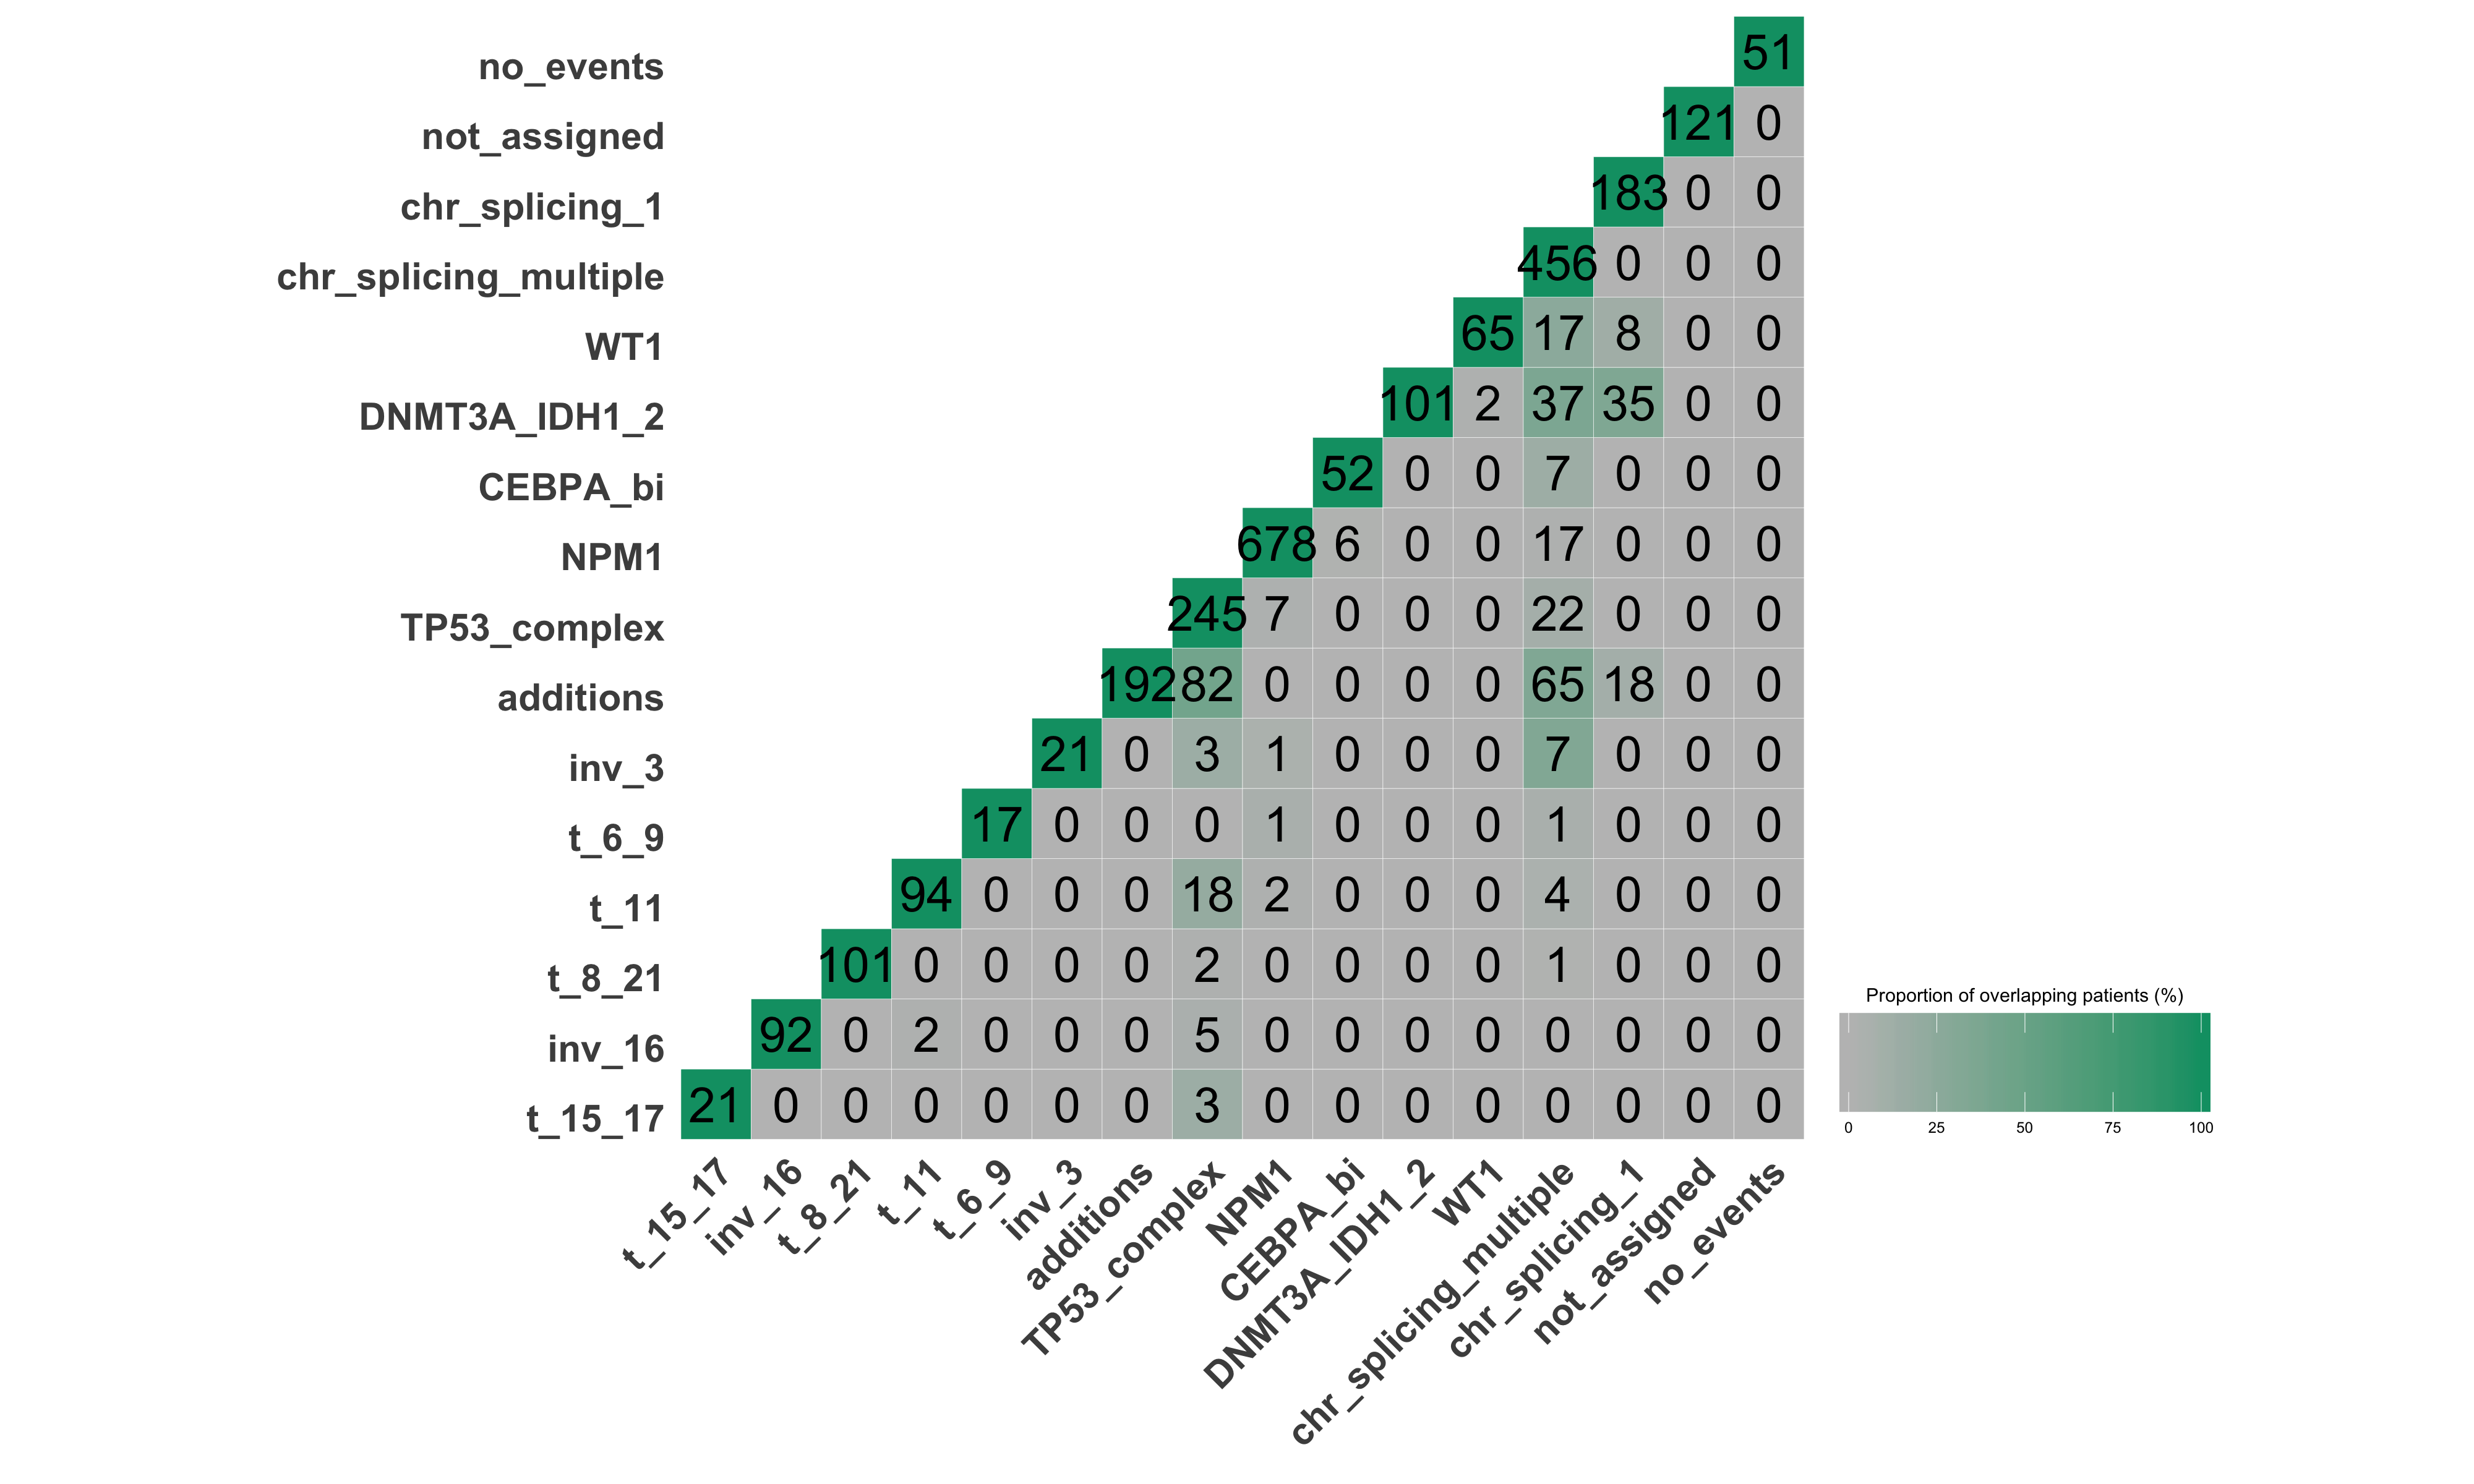

In [119]:

# comp_repartition(df_final,cols_component,col_names=col_list)
# png("comp_repartition.png",width=4500,height=4500,res=200)
cols_component <- colnames(df_final %>% dplyr:: select(starts_with("full_component_")))
df_tmp <- setNames(data.frame(matrix(ncol = length(col_list), nrow = length(col_list))), gsub("full_component_","",col_list))
rownames(df_tmp) <- gsub("full_component_","",col_list)
for (col in cols_component){
    for (col_bis in cols_component){
        df_tmp[gsub("full_component_","",col),gsub("full_component_","",col_bis)] <- ifelse(is.null(dim(df_final[df_final[,col]==1 & df_final[,col_bis]==1,])[1]),0,dim(df_final[df_final[,col]==1 & df_final[,col_bis]==1,])[1])
        }}

set_notebook_plot_size(20,12)
get_lower_tri<-function(cormat){
cormat[upper.tri(cormat)] <- NA
return(cormat)
}
# Get upper triangle of the correlation matrix
get_upper_tri <- function(cormat){
cormat[lower.tri(cormat)]<- NA
return(cormat)
}
upper_tri <- get_upper_tri(as.matrix(df_tmp))
melted_cormat <- melt(upper_tri, na.rm = TRUE)
melted_cormat <- cbind(melted_cormat, value_bis=0)
for (col in unique(melted_cormat$Var1)){
    melted_cormat[melted_cormat$Var1==col,]$value_bis <- 100*melted_cormat[melted_cormat$Var1==col,]$value / melted_cormat[melted_cormat$Var1==col & melted_cormat$Var2==col,]$value
    }
tmp <- t(data.frame(table(df_final$final_component)))
rownames(tmp) <- c("Final Component (HDP)","Num of Patients")
tmp
tmp <- t(data.frame(table(df_w_correlates$overlap)))
rownames(tmp) <- c("Overlap","Num of Patients")
tmp
ggplot(melted_cormat, aes(Var2, Var1, fill = value_bis))+
geom_tile(color = "white")+
scale_fill_gradient2(low = "#0072B2", high = "#009E73", mid = "#BFBFBF", 
  space = "Lab", 
name="Proportion of overlapping patients (%)") +
theme_minimal()+ # minimal theme
theme(axis.text.x = element_text(angle = 45, vjust = 1, 
size = 22, hjust = 1,face="bold"),axis.text.y = element_text( vjust = 1, 
size = 22, hjust = 1,face="bold"))+
coord_fixed()+
xlab("")+ylab("")+
geom_text(aes(Var2, Var1, label = value), color = "black", size =10,face="bold") +
theme(
panel.grid.major = element_blank(),
panel.border = element_blank(),
panel.background = element_blank(),
axis.ticks = element_blank(),
legend.justification = c(2, 0),
#legend.position = c(0.6, 0.7),
legend.direction = "horizontal",
plot.title=element_text(size=25,face="bold",hjust=0.5))+
guides(fill = guide_colorbar(barwidth = 15, barheight = 4,
            title.position = "top", title.hjust = 0.5),
      legend.title=element_text(size=22))
ggtitle("Component Repartition")
# dev.off()

# COMPONENT FREQUENCY

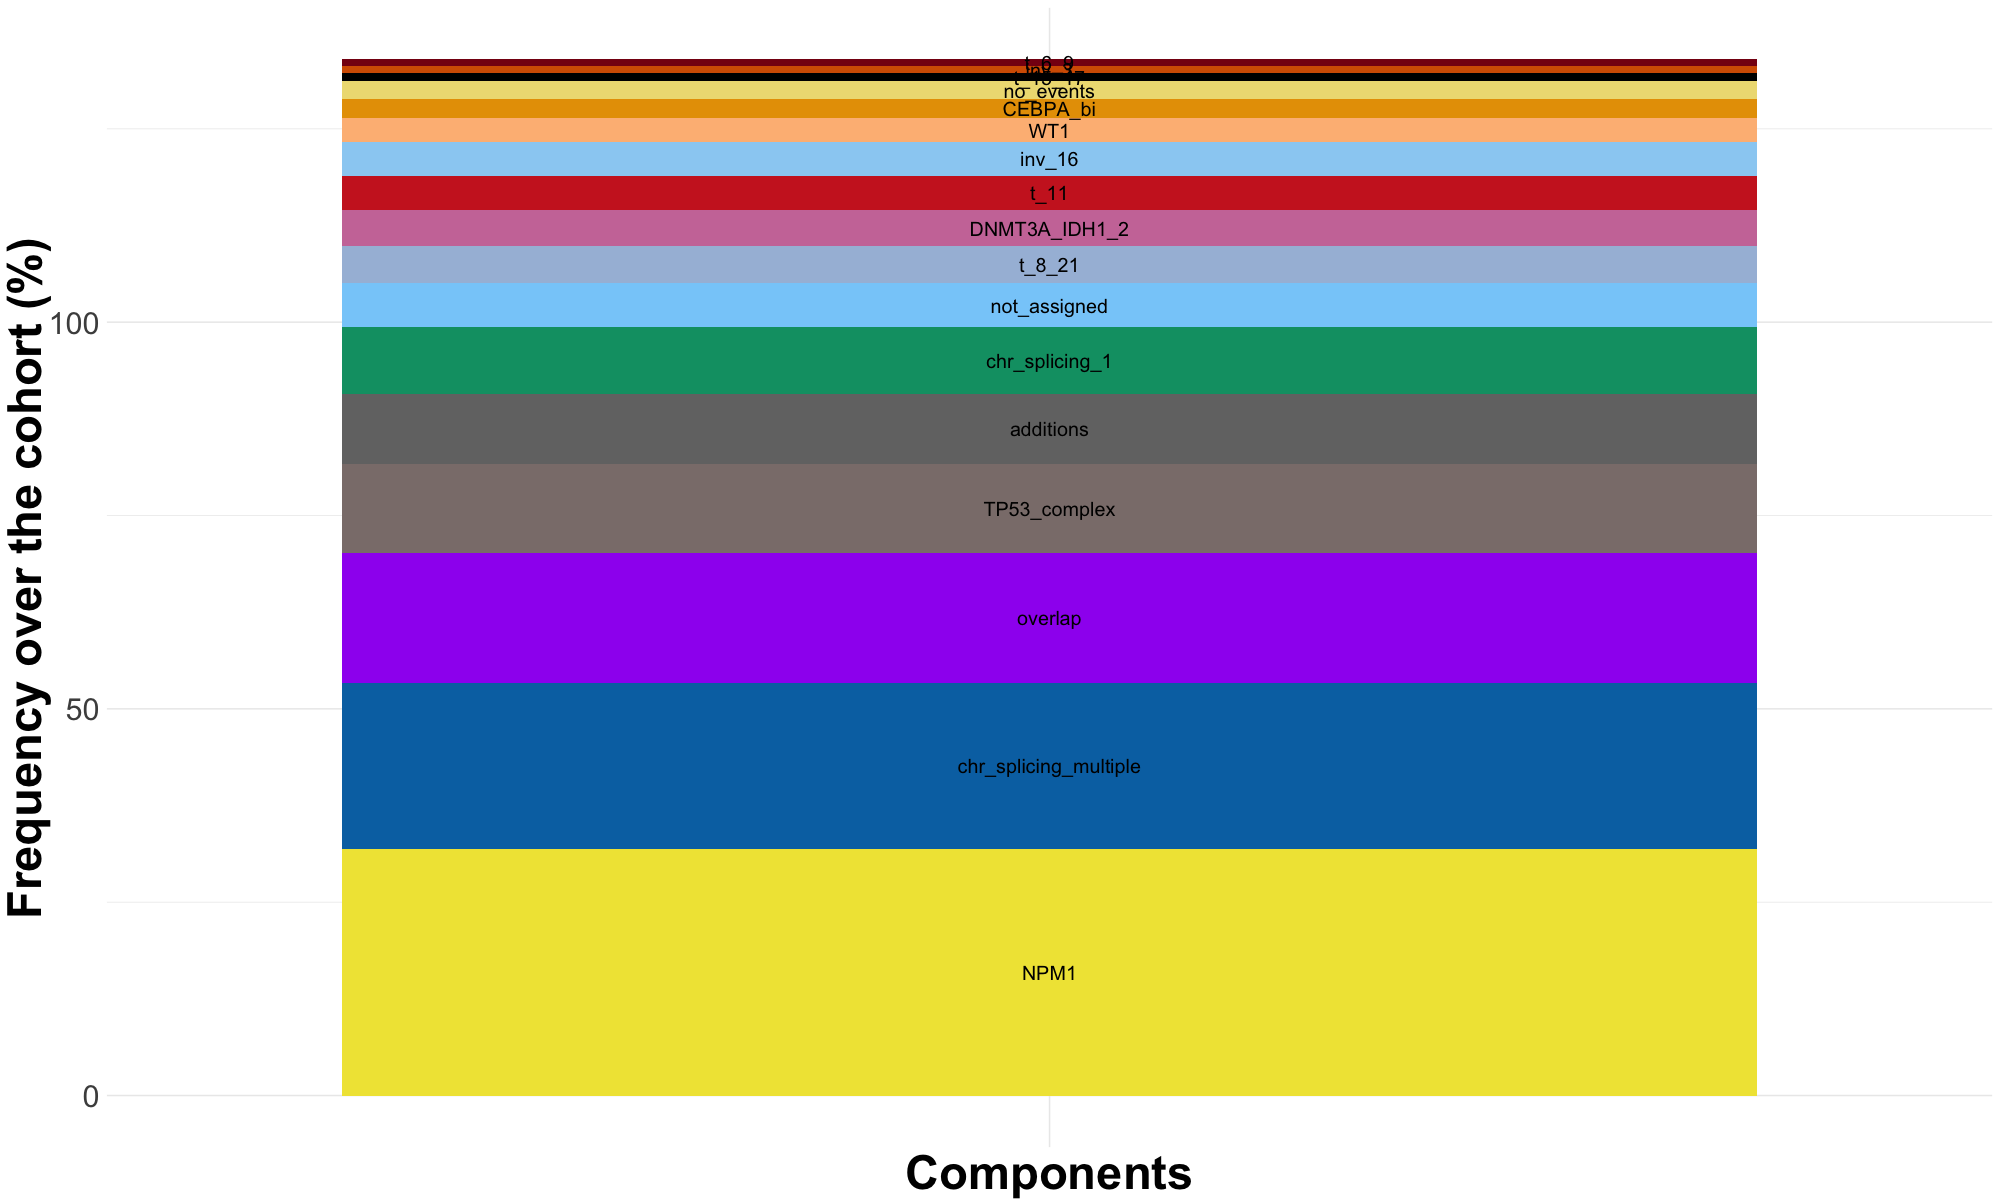

In [194]:
source('tools.R')
comp_stacked_frequency(df_final,cols_comp)
cols_comp <- colnames(df_final[,c(170:186)])
df_tmp <- df_final[,cols_comp]
r <- data.frame(freq = 100*colSums(df_tmp)/nrow(df_final))
r$names <- rownames(r)
r$names <- str_replace(r$names,"full_component_","")
r$test <- "try"
p <- ggplot(r,aes(test,freq,fill=reorder(names,freq),label=names))+
        geom_bar(stat="identity")+#coord_flip()+
theme(plot.title = element_text(hjust = 0.5,size=25),axis.text.x=element_blank(),axis.text=element_text(size=22),axis.title=element_text(size=34,face="bold"),
legend.position="none")+xlab("Components") + ylab("Frequency over the cohort (%)")+scale_fill_manual(values=color_values)+
        geom_text(size = 5, position = position_stack(vjust = 0.5))
p

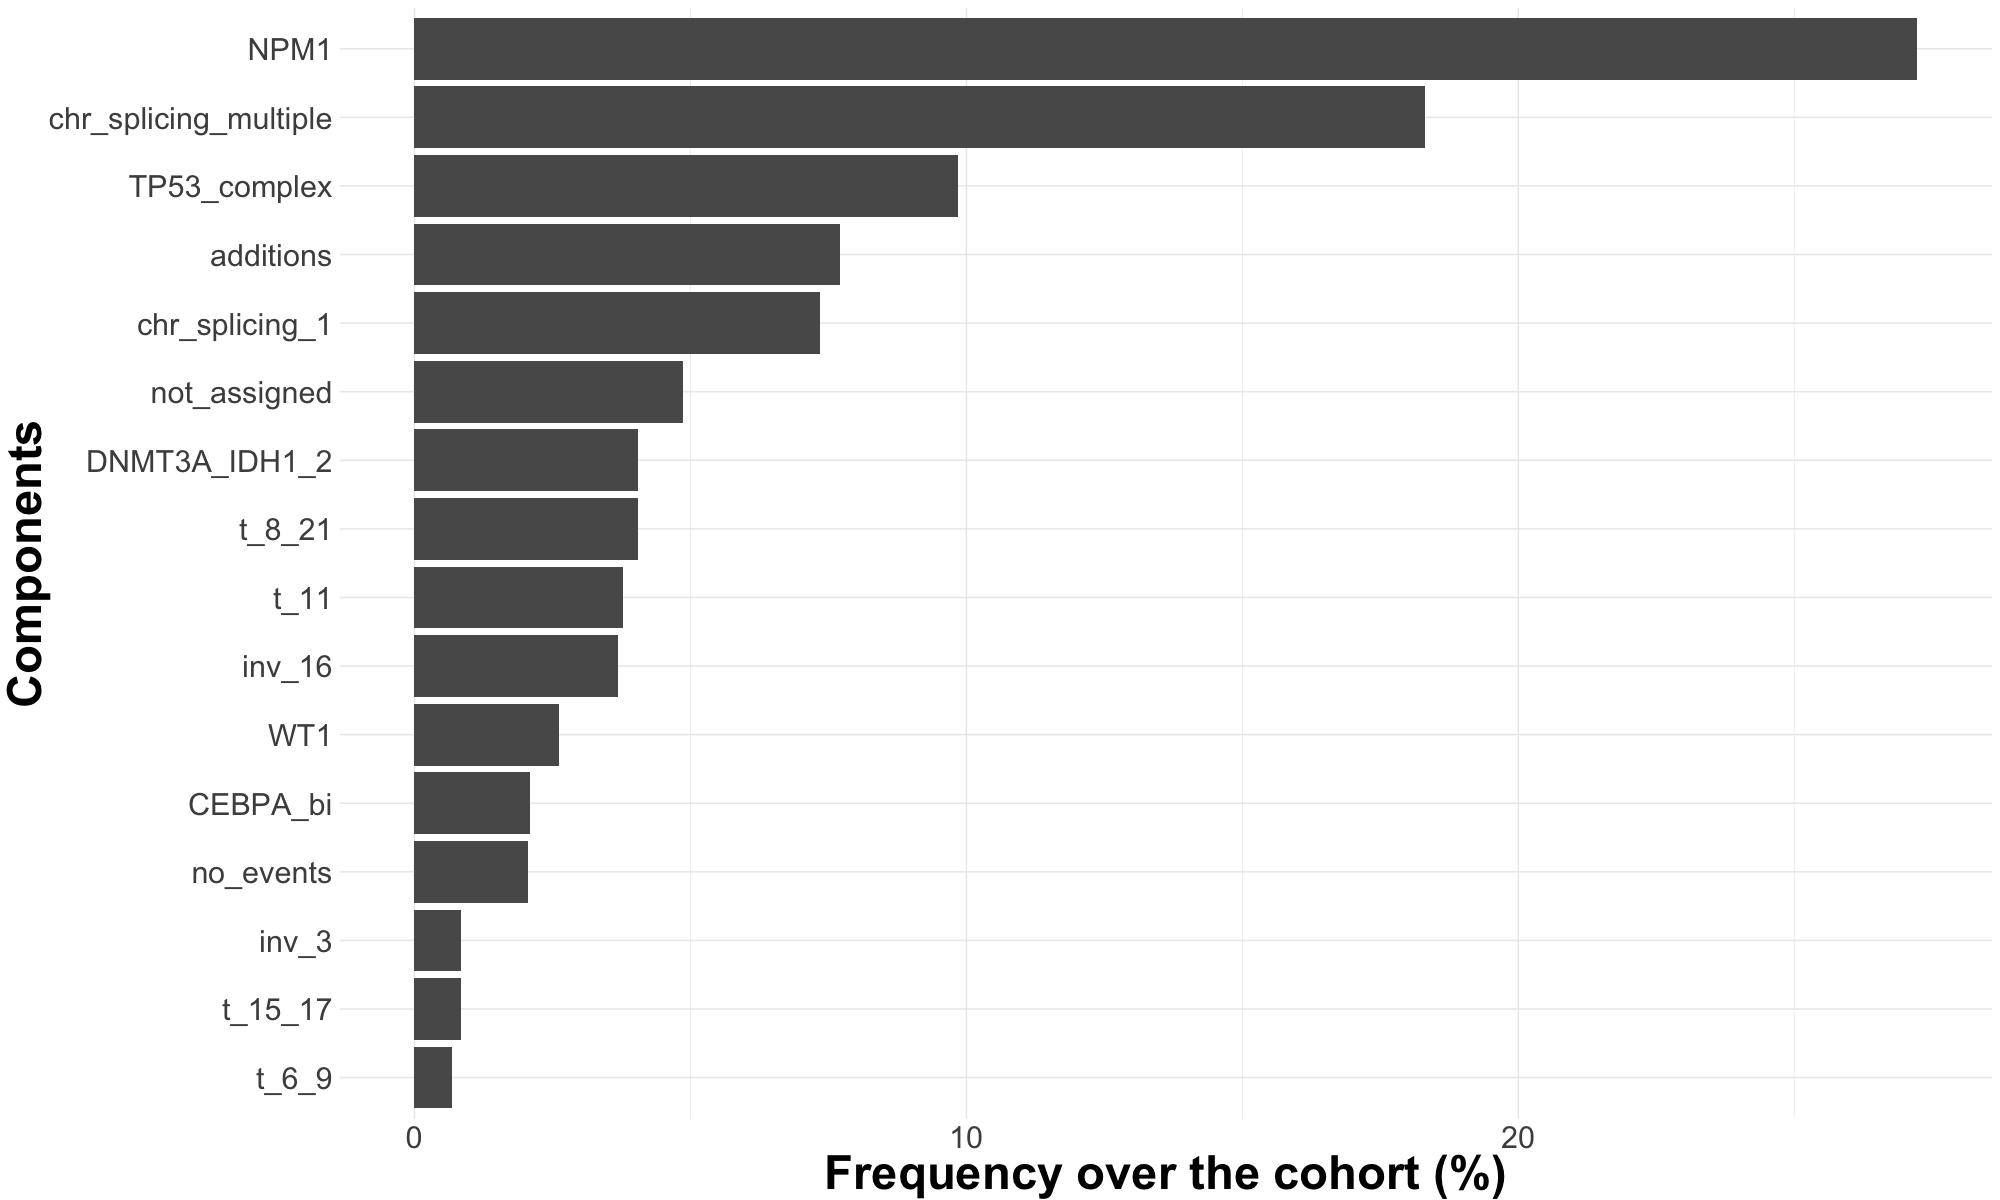

In [77]:
source("tools.R")
comp_frequency(df_final,comp)
# png(paste("comp_frequency.png"),width=750,height=500)
comp_frequency <- melted_cormat
comp_frequency <- comp_frequency[comp_frequency$Var1==comp_frequency$Var2,]
comp_frequency$value_frequency <- 100*comp_frequency$value/dim(df_final)[1]
comp_frequency$value_frequency <- 100*comp_frequency$value_frequency/sum(comp_frequency$value_frequency)
ggplot(comp_frequency,aes(x=reorder(Var1,value_frequency),y=value_frequency))+geom_bar(stat="identity")+coord_flip()+
theme(plot.title = element_text(hjust = 0.5,size=25),axis.text=element_text(size=22),axis.title=element_text(size=34,face="bold"),
legend.position="none")+xlab("Components") + ylab("Frequency over the cohort (%)")
# dev.off()

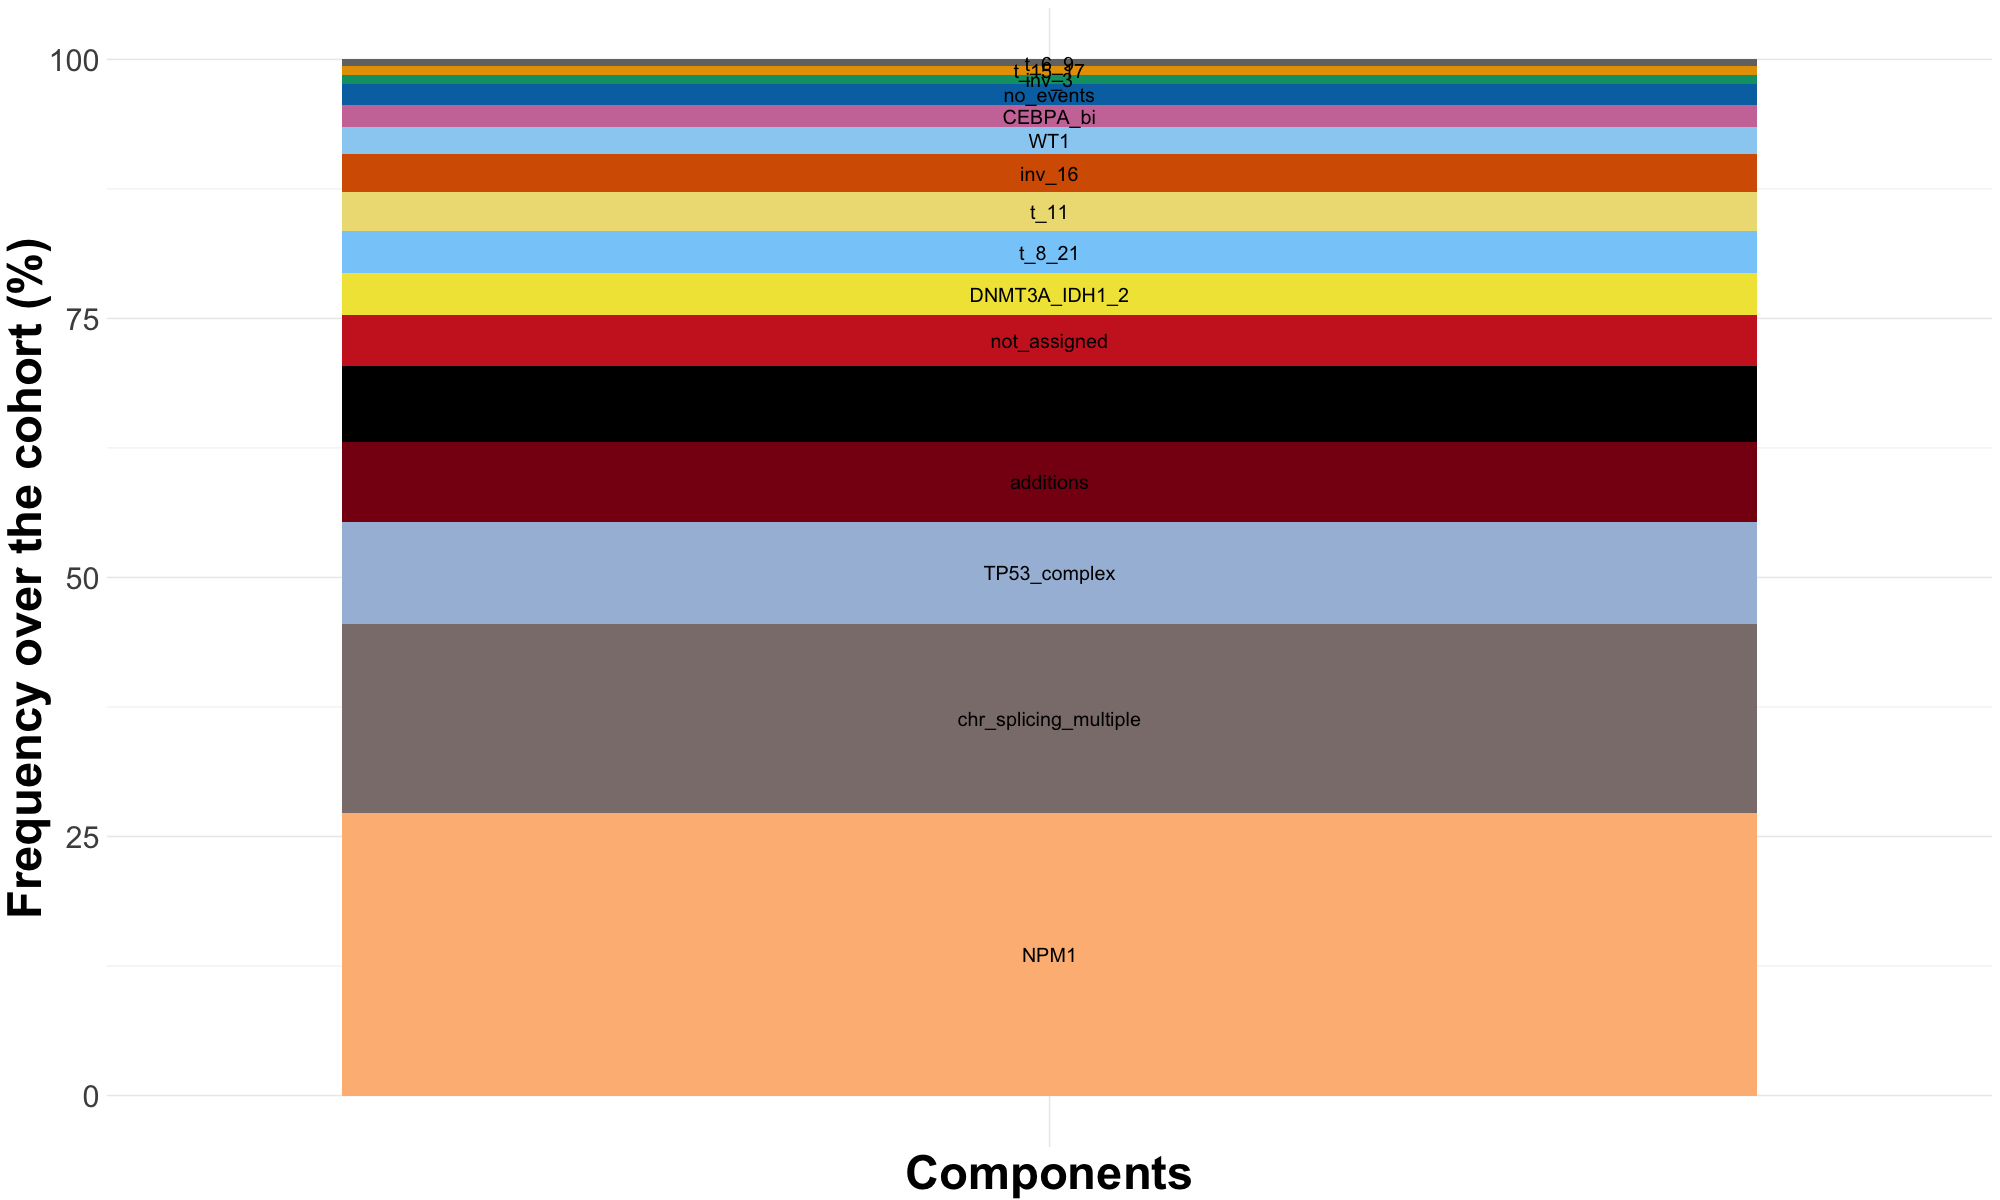

In [153]:
# png(paste("comp_frequency_stacked.png"),width=750,height=500)
cols_component <- colnames(df_final %>% dplyr:: select(starts_with("full_component_")))
df_tmp <- setNames(data.frame(matrix(ncol = length(col_list), nrow = length(col_list))), gsub("full_component_","",col_list))
rownames(df_tmp) <- gsub("full_component_","",col_list)
for (col in cols_component){
    for (col_bis in cols_component){
        df_tmp[gsub("full_component_","",col),gsub("full_component_","",col_bis)] <- ifelse(is.null(dim(df_final[df_final[,col]==1 & df_final[,col_bis]==1,])[1]),0,dim(df_final[df_final[,col]==1 & df_final[,col_bis]==1,])[1])
        }}

set_notebook_plot_size(20,12)
get_lower_tri<-function(cormat){
cormat[upper.tri(cormat)] <- NA
return(cormat)
}
# Get upper triangle of the correlation matrix
get_upper_tri <- function(cormat){
cormat[lower.tri(cormat)]<- NA
return(cormat)
}
upper_tri <- get_upper_tri(as.matrix(df_tmp))
melted_cormat <- melt(upper_tri, na.rm = TRUE)
melted_cormat <- cbind(melted_cormat, value_bis=0)
for (col in unique(melted_cormat$Var1)){
    melted_cormat[melted_cormat$Var1==col,]$value_bis <- 100*melted_cormat[melted_cormat$Var1==col,]$value / melted_cormat[melted_cormat$Var1==col & melted_cormat$Var2==col,]$value
    }
comp_frequency <- melted_cormat
comp_frequency <- comp_frequency[comp_frequency$Var1==comp_frequency$Var2,]
comp_frequency$value_frequency <- 100*comp_frequency$value/dim(df_final)[1]
comp_frequency$test <- "try"
comp_frequency$value_frequency <- 100*comp_frequency$value_frequency/sum(comp_frequency$value_frequency)
ggplot(comp_frequency,aes(x=test,y=value_frequency,fill=reorder(Var1,value_frequency),label=Var1))+geom_bar(stat="identity")+#coord_flip()+
theme(plot.title = element_text(hjust = 0.5,size=25),axis.text.x=element_blank(),axis.text=element_text(size=22),axis.title=element_text(size=34,face="bold"),
legend.position="none")+xlab("Components") + ylab("Frequency over the cohort (%)")+scale_fill_manual(values=c("grey45", "#e79f00", "#009E73","#0072B2",  "#CC79A7",
        "#9ad0f3", "#D55E00", 
        "lightgoldenrod","lightskyblue","#F0E442",
        "firebrick3","#000000","#870C14","#a6bddb","mistyrose4","#fdbb84","gray","deeppink","darkblue","darkred","darkgreen","purple","forestgreen"),limits=levels(tmp$fill_pal))+
        geom_text(size = 5, position = position_stack(vjust = 0.5))
# dev.off()

# COMPONENT FREQUENCY ACROSS AGE GROUPS

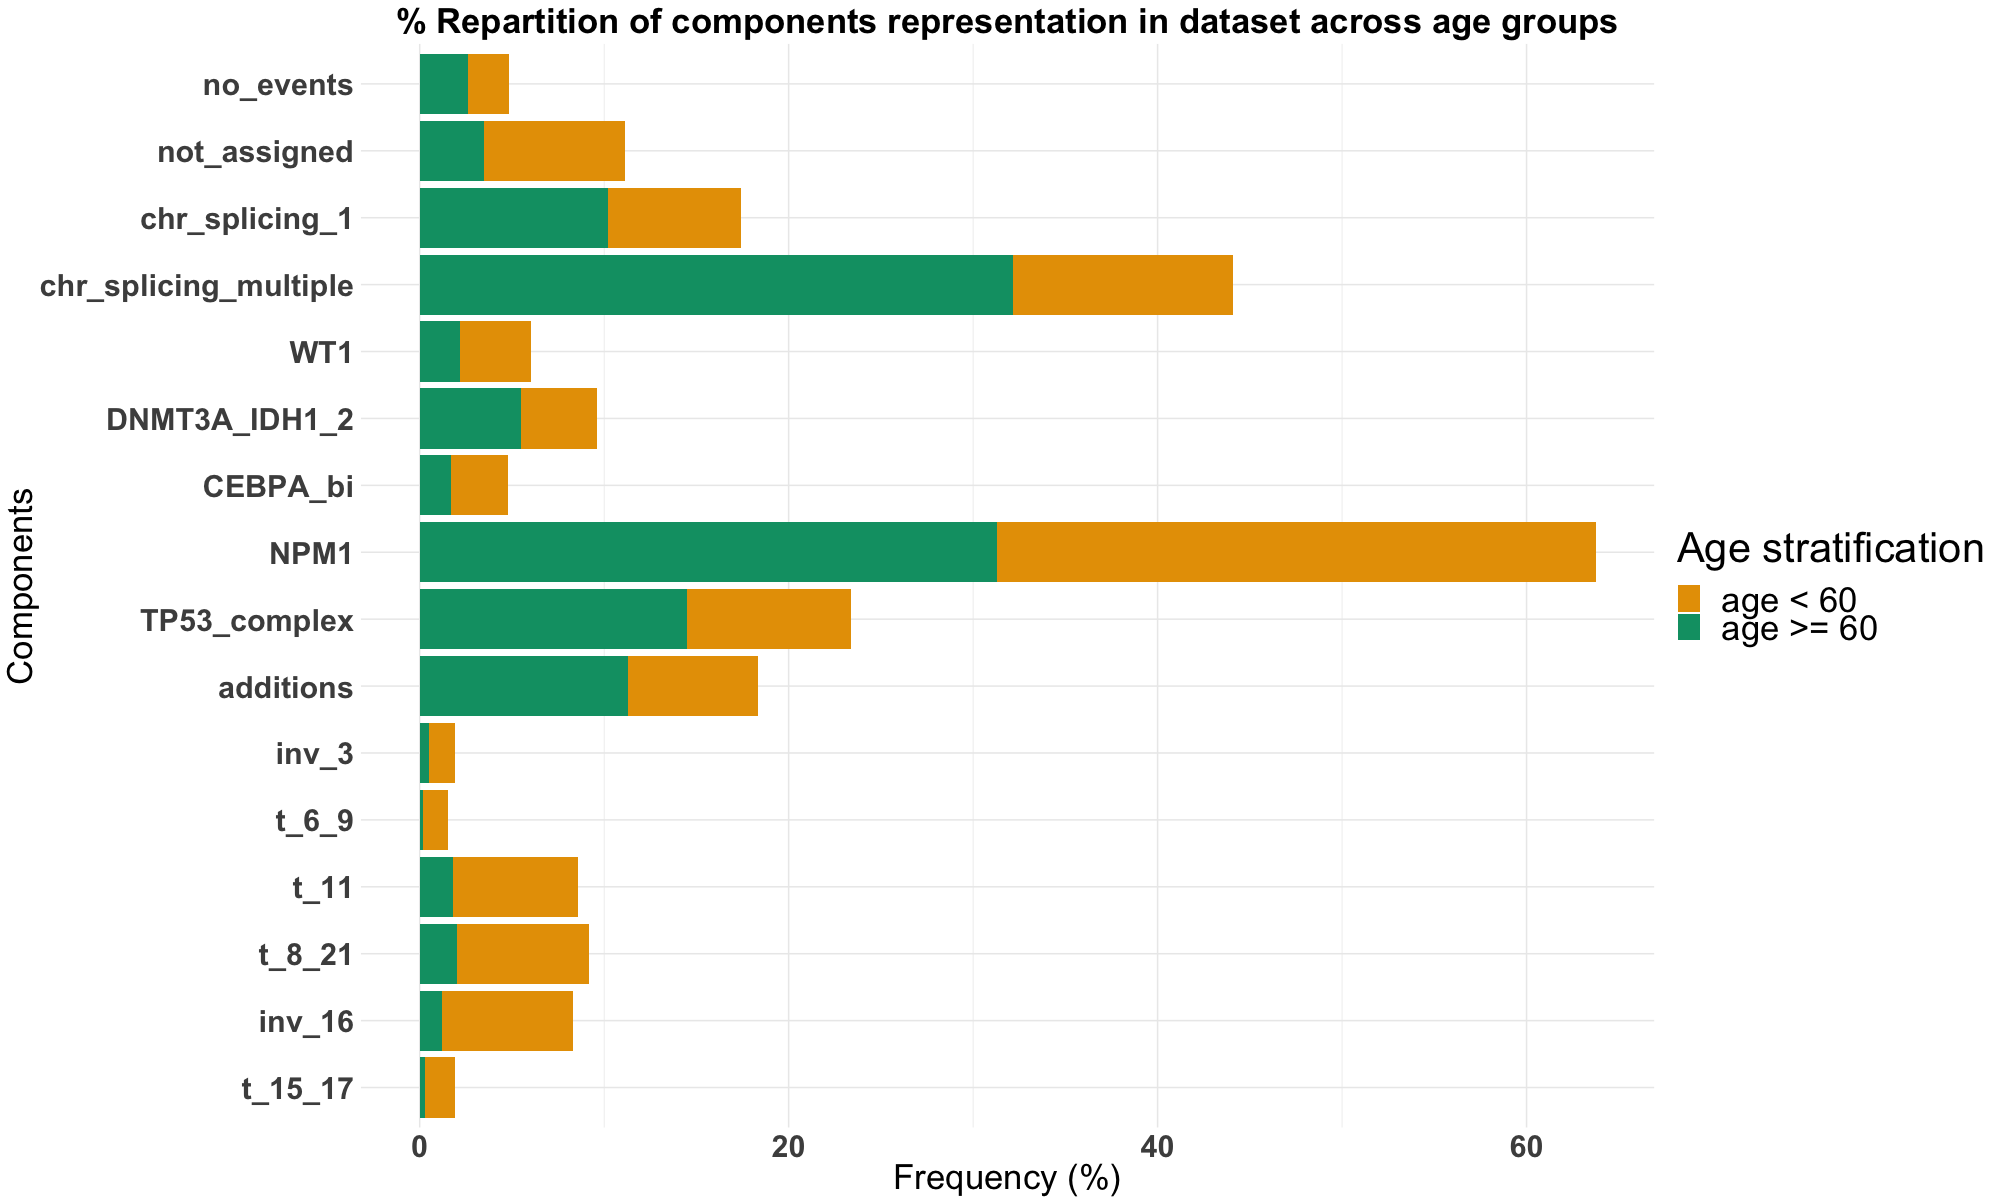

In [106]:
# png(paste("comp_frequency_age_groups.png"),width=5000,height=4500,res=250)
source('tools.R')
comp_frequency_by_age(df_final,comp)
data_plot <- NULL
for (strata_age in c("age < 60","age >= 60")){
    cols_component <- colnames(df_final %>% dplyr:: select(starts_with("full_component_")))
    df_tmp <- setNames(data.frame(matrix(ncol = length(col_list), nrow = length(col_list))), gsub("full_component_","",col_list))
    rownames(df_tmp) <- gsub("full_component_","",col_list)
    if (strata_age=="age < 60"){
        tmp <- df_final[df_final$age<60,]
    }else{
        tmp <- df_final[df_final$age>=60,]
    }
    
    for (col in cols_component){
        for (col_bis in cols_component){
            df_tmp[gsub("full_component_","",col),gsub("full_component_","",col_bis)] <- ifelse(is.null(dim(tmp[tmp[,col]==1 & tmp[,col_bis]==1,])[1]),0,dim(tmp[tmp[,col]==1 & tmp[,col_bis]==1,])[1])
            }}

    set_notebook_plot_size(20,12)
    get_lower_tri<-function(cormat){
    cormat[upper.tri(cormat)] <- NA
    return(cormat)
    }
    # Get upper triangle of the correlation matrix
    get_upper_tri <- function(cormat){
    cormat[lower.tri(cormat)]<- NA
    return(cormat)
    }
    upper_tri <- get_upper_tri(as.matrix(df_tmp))
    melted_cormat <- melt(upper_tri, na.rm = TRUE)
    melted_cormat <- cbind(melted_cormat, value_bis=0)
    for (col in unique(melted_cormat$Var1)){
        melted_cormat[melted_cormat$Var1==col,]$value_bis <- 100*melted_cormat[melted_cormat$Var1==col,]$value / melted_cormat[melted_cormat$Var1==col & melted_cormat$Var2==col,]$value
        }
    comp_frequency <- melted_cormat

    comp_frequency <- comp_frequency[comp_frequency$Var1==comp_frequency$Var2,]
    comp_frequency$value_frequency <- 100*comp_frequency$value/dim(tmp)[1]
    comp_frequency$Var2 <- NULL
    comp_frequency$value <- NULL
    comp_frequency$value_bis <- NULL
    comp_frequency$comparison <- strata_age
    data_plot <- rbind(data_plot,comp_frequency)
    }
ggplot(data_plot,aes(x = Var1,y = value_frequency,fill=comparison)) + 
geom_bar(aes(fill = comparison),stat = "identity") +scale_fill_manual(values=c("#e79f00", "#009E73"))+
scale_y_continuous(breaks = function(x) unique(floor(pretty(seq(0, (max(x) + 1) * 1.1)))))+
labs(fill='Age stratification') +ggtitle("% Repartition of components representation in dataset across age groups")+
theme(axis.text.x=element_text(size=22,face="bold"),axis.title.x = element_text(size=25),axis.text.y=element_text(size=22,face="bold"),axis.title.y = element_text(size=25),legend.text = element_text(size=25),legend.title = element_text(size=30),
      plot.title = element_text(size=25,face="bold",hjust=0.5))+coord_flip()+
                   ylab("Frequency (%)")+xlab("Components")
# dev.off()

# SPREAD SURVIVAL CORRELATES

In [ ]:
# png("spread_surv.png",width=4000,height=2500,res=200)
cols_component <- colnames(df_final %>% dplyr:: select(starts_with("full_component_")))
colors <- c("black","gray1","grey45", "#e79f00", "#009E73","#0072B2",  "#CC79A7",
        "#9ad0f3", "#D55E00", 
        "lightgoldenrod","lightskyblue","#F0E442",
        "firebrick3","#000000","#870C14","#a6bddb","mistyrose4","#fdbb84","gray2","deeppink","darkblue","darkred","darkgreen","purple","forestgreen")
tmp <- NULL
for (comp in cols_component){
    tmp1 <- df_w_correlates[df_w_correlates[,comp]==1,]
    tmp1$comparison <- comp
    tmp <- rbind(tmp,tmp1)
    }

tmp1 <- df_w_correlates
tmp1$comparison <- ifelse(tmp1$eln_2017==1,"adverse",
                          ifelse(tmp1$eln_2017==2,"intermediate","favorable"))
                          
tmp <- rbind(tmp,tmp1)
surv_object <- Surv(time = tmp$os, event = tmp$os_status)
fit <- survfit(surv_object ~ comparison, data = tmp)
p <- ggsurvplot(fit,  pval = TRUE,main = "Survival curve",risk.table=T,submain = "K-M Spread Estimates",palette=colors,linetype=c(1,1,rep(3,16),1),legend="none",xlab="Time (years)",
                  ggtheme = theme_survminer(
                 font.main = c(16, "bold", "black"),
                 font.submain = c(15, "bold.italic", "black"),
                 font.caption = c(14, "plain", "black"),
                 font.x = c(14, "bold.italic", "black"),
                 font.y = c(14, "bold.italic", "black"),
                 font.tickslab = c(12, "plain", "black")))

set_notebook_plot_size(20,12)
p$plot + ggplot2::annotate("text", 
                                x = c(4.7,5.7,7.7,9,8,11,11.5,12,7.2,7.4,9,7.7), y = c(0.05,0,0.08,0,0.1,0.13,0.15,0.47,0.52,0.66,0.69,0.8),
                                label = c("inv_3","t_6_9","TP53_complex","additions","chr_splicing_multiple","Adverse ELN","Intermediate ELN",
                                          "Favorable ELN","CEBPA_bi","inv_16","t_8_21","t_15_17"), size = 5)
# dev.off()
# png("spread_surv_table.png",width=2000,height=2500,res=200)
set_notebook_plot_size(20,6)
p$table
# dev.off()

# CLINICAL CORRELATES

In [ ]:
source('tools.R')
comp_clinical_correlates(df_w_correlates,cols_component=colnames(df_final %>% dplyr:: select(starts_with("full_component_"))),binary_correlates = c("gender","ahd","perf_status","secondary"),continuous_correlates=c("age","wbc","hb","plt","bm_blasts"))
cols_component <- colnames(df_final %>% dplyr:: select(starts_with("full_component_")))
binary_correlates <- c("gender","ahd","perf_status","secondary")

continuous_correlates <- c("age","wbc","hb","plt","bm_blasts")
set_notebook_plot_size(30,2)

v=c("0" = "grey45", "1" = "#e79f00", "2" = "#009E73", "3" ="#0072B2", "4"="#CC79A7")
tmp <- NULL
for (comp in cols_component){
    tmp1 <- df_w_correlates[df_w_correlates[,comp]==1,]
    tmp1$comparison <- str_remove(comp,"full_component_")
    tmp <- rbind(tmp,tmp1)
    }
tmp$fill_pal <- factor(tmp$comparison)
for (col in binary_correlates){
#     png(paste(col,"_clinical.png",sep=""),width=4500,height=1500,res=200)
    p <- ggplot(tmp, aes(reorder(factor(comparison),-tmp[,col]), fill = factor(tmp[,col]))) + 
    geom_bar(position = "fill") +
    scale_y_continuous(labels = scales::percent)+
    xlab("Full Components")+scale_fill_manual(values = v)+theme(plot.title = element_text(hjust = 0.5,size=25),axis.text=element_text(size=10,face="bold"),axis.title=element_text(size=14,face="bold"))+
    labs(fill=col)
    plot(p)
#     dev.off()
}
set_notebook_plot_size(30,5)
for (col in continuous_correlates){
#     png(paste(col,"_clinical.png",sep=""),width=4500,height=2500,res=200)
    p <- ggplot(tmp,aes(x=reorder(comparison,-tmp[,col],FUN=median),y=tmp[,col],fill=fill_pal)) +
    geom_boxplot() + 
    theme1+
    ylab(col)+xlab("Full Components")+theme(plot.title = element_text(hjust = 0.5,size=25),axis.text=element_text(size=10,face="bold"),axis.title=element_text(size=14,face="bold"))+
    scale_y_continuous(limits = quantile(tmp[,col], c(0.01, 0.99),na.rm = T))+
    scale_fill_manual(values=c("grey45", "#e79f00", "#009E73","#0072B2",  "#CC79A7",
        "#9ad0f3", "#D55E00", 
        "lightgoldenrod","lightskyblue","#F0E442",
        "firebrick3","#000000","#870C14","#a6bddb","mistyrose4","#fdbb84","gray","deeppink","darkblue","darkred","darkgreen","purple","forestgreen"),limits=levels(tmp$fill_pal))+theme(legend.position = "none")
    # set ymin to 0 (Elli's request)
    
    suppressWarnings(plot(p))
#     dev.off()
    
}


In [390]:
table(df_final$NPM1,df_final$PTPN11)

   
       0    1
  0 1376   71
  1  580   98

# RISK DENSITY

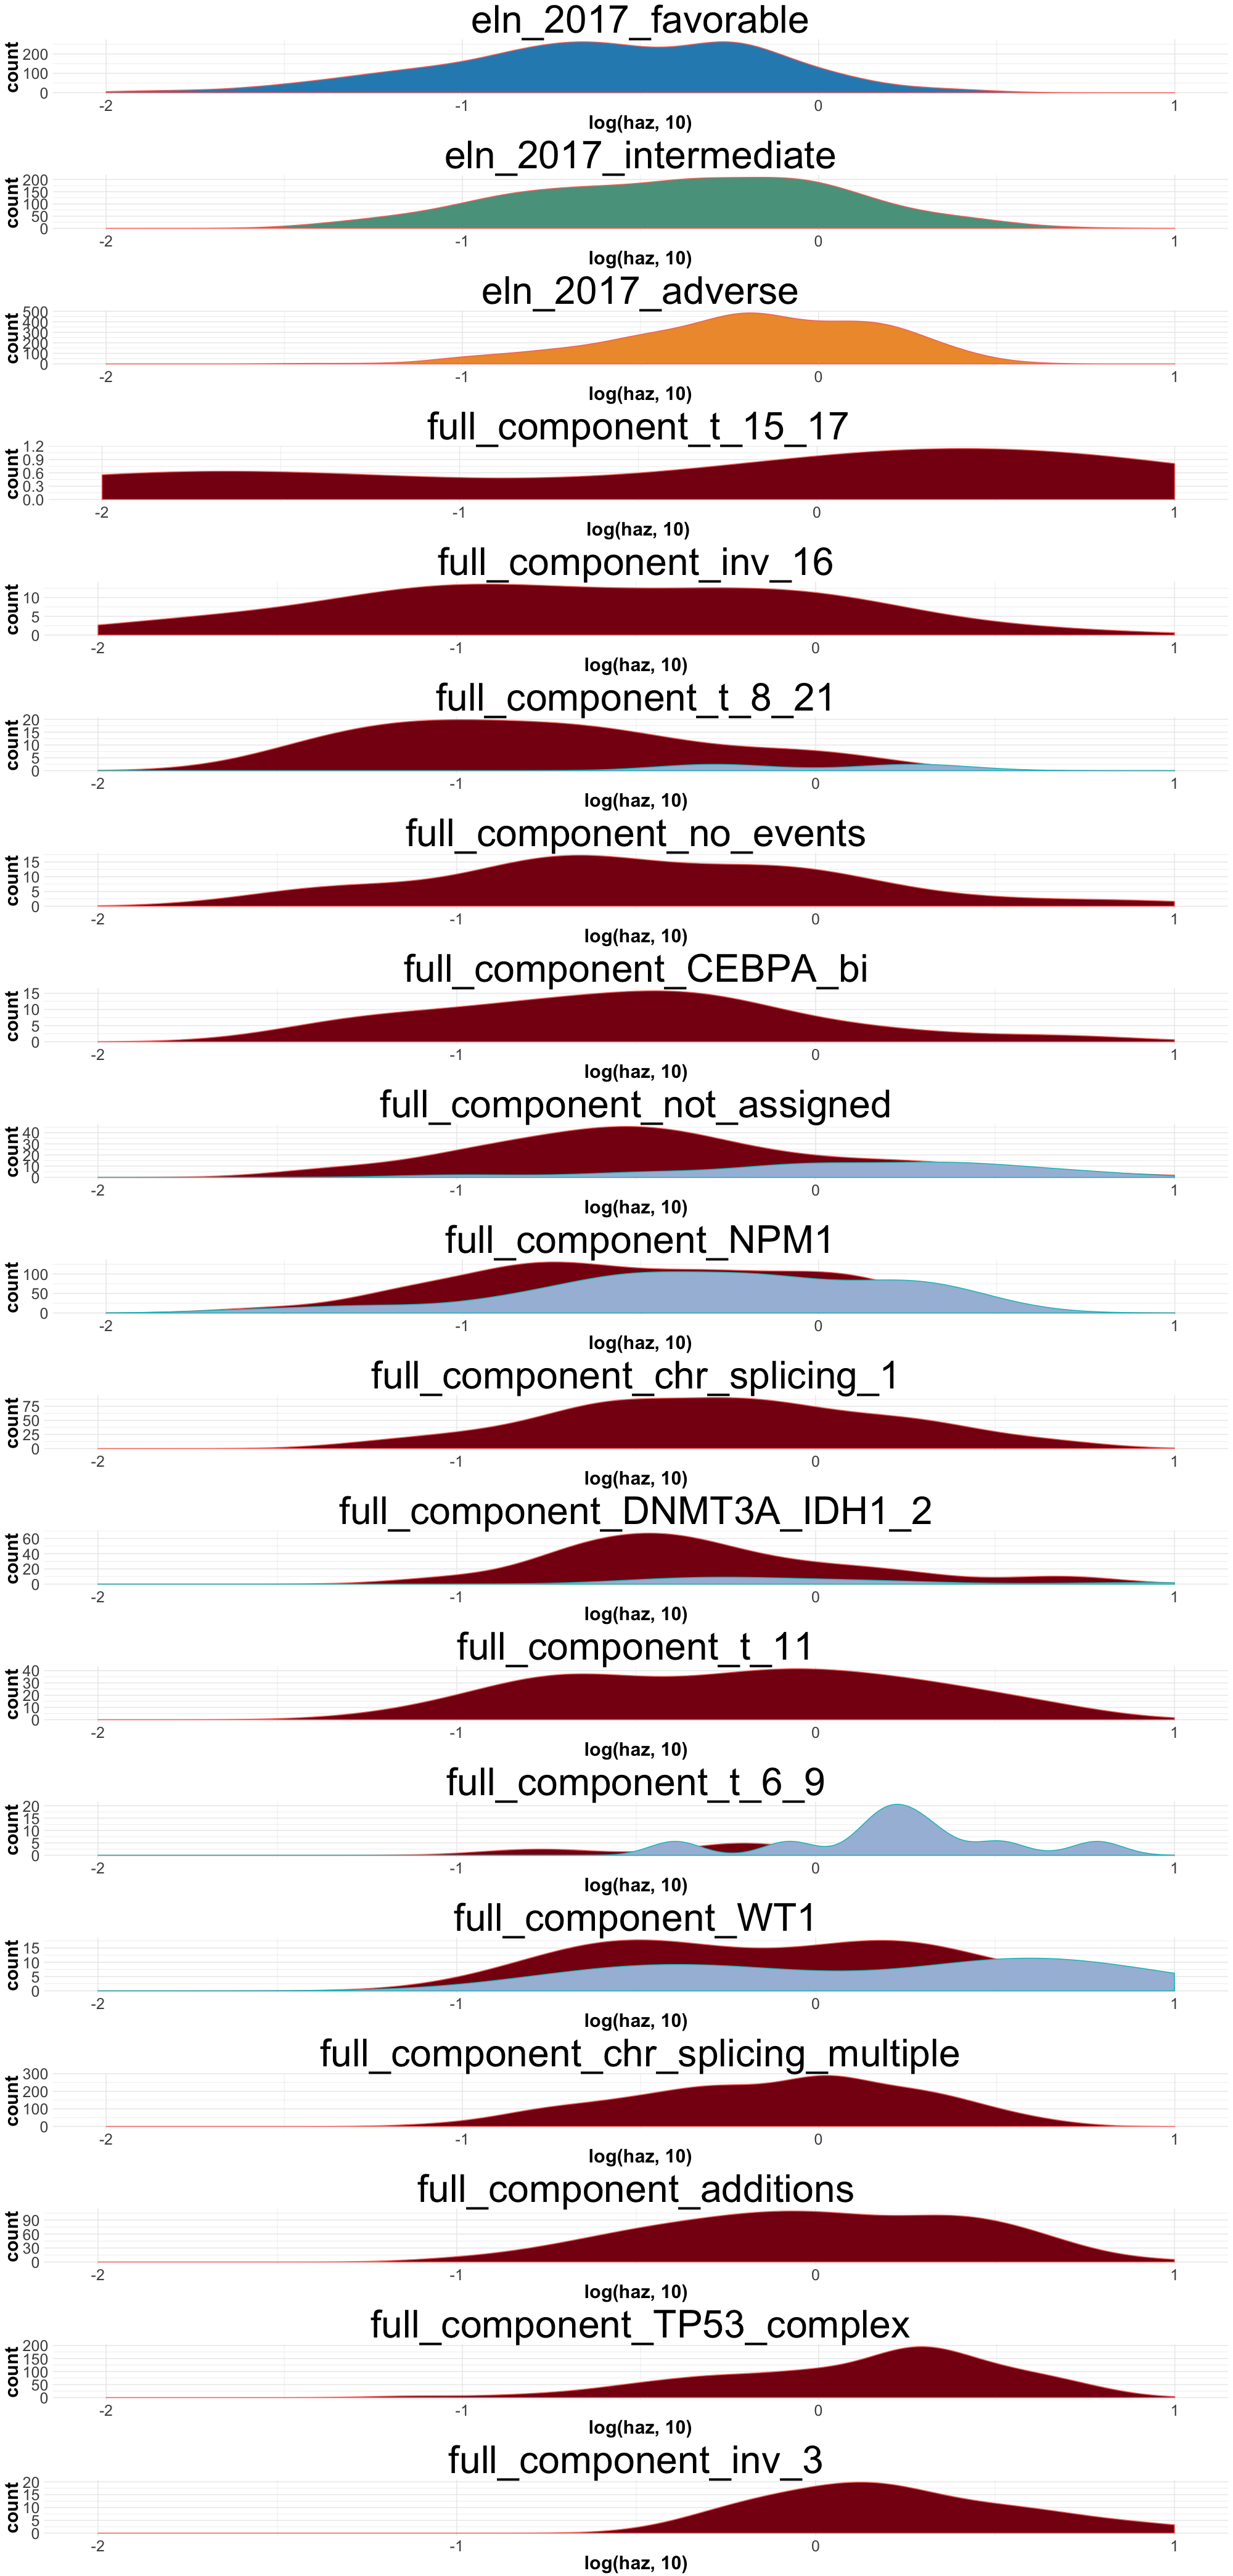

In [252]:
source('tools.R')
shift_density(df_final,cols_component)
# png("tmp.png",width=4000,height=10500,res=200)
tmp_final <- read.table("../clustering/clustering_Final_1/df_final_full_component.tsv")
df <- data.frame(mean_survival = double() )
for (co in colnames(tmp_final[,c(170:185)])){
    df[co,] <- mean(tmp_final[tmp_final[,co]==1,]$os)
    df[co,"name"] <- co
}
components_ordered <- df[order(df$mean_survival,decreasing=T),]$name
rows <- c('eln_2017_favorable','eln_2017_intermediate','eln_2017_adverse',components_ordered)
set_notebook_plot_size(20,41.8)
p <- list()
# pdf(file="graphs/density_plots.pdf",width=15,height=3)
for (co in rows){
    if (is.element(co,c("full_component_t_8_21","full_component_t_6_9","full_component_NPM1","full_component_CEBPA_bi","full_component_DNMT3A_IDH1_2","full_component_WT1","full_component_not_assigned"))){    
        tmp <- tmp_final[tmp_final[,co]==1 &  tmp_final$ITD==0,]
        fit <- kphaz.fit(tmp$os,tmp$os_status,q=1,method="nelson")
        df <- fit%>%
        as.data.frame()
        df[,"category"] <- co
        tmp <- tmp_final[tmp_final[,co]==1 &  tmp_final$ITD==1,]
        fit <- kphaz.fit(tmp$os,tmp$os_status,q=1,method="nelson")
        df1 <- fit%>%
        as.data.frame()
        df1[,"category"] <- paste(co,"ITD",sep="_")        
        df <- rbind(df,df1)

     }else{
        tmp <- tmp_final[tmp_final[,co]==1 ,]
        fit <- kphaz.fit(tmp$os,tmp$os_status,q=1,method="nelson")
        df <- fit%>%
        as.data.frame()
        df[,"category"] <- co
        }   
    p[[co]] <- ggplot(df, aes(x=log(haz,10),color=category,fill=category)) + 
  geom_density(aes(y=..count..),alpha=1)+guides(fill=FALSE)+guides(fill=F,color=F)+ggtitle(co)+xlim(c(-2,1)) +theme(plot.title = element_text(hjust = 0.5,size=45),axis.text=element_text(size=18),
        axis.title=element_text(size=22,face="bold"))
    if(co=="eln_2017_favorable"){
        p[[co]]<- p[[co]]+ scale_fill_manual(values=c("#2b8cbe"))
    }
    if(co=="eln_2017_intermediate"){
        p[[co]]<- p[[co]]+ scale_fill_manual(values=c("#59A08B"))
    }
    if(co=="eln_2017_adverse"){
        p[[co]]<- p[[co]]+ scale_fill_manual(values=c("#EE9937"))
    }
    if(is.element(co,components_ordered)){
        p[[co]] <- p[[co]]+ scale_fill_manual(values=c("#870C14","#a6bddb","#a6bddb","pink","#fdbb84"))
        
        }

    }
do.call(grid.arrange,c(p,nrow=length(rows)))
# dev.off()

# SURV PLOTS BY COMPONENT

In [349]:
plot_surv <-function(fit,submain="",vals=val,legend="top",risk.tab=F,y=""){
    
    # Create the vector to use for leg.labs
    vec <- NULL
    for (i in 1:length(fit$strata)){
    vec <- cbind(vec,paste(names(fit$strata[i]),fit$strata[[i]],sep=" , N="))
    }
    
    ggsurvplot(fit,  pval = TRUE,main = "Survival curve",risk.table=risk.tab,submain = submain,palette=vals,legend=legend,risk.table.col = "strata",pval.size=8,pval.coord=c(0,0.05),risk.table.fontsize=10,xlab="Time (years)",legend.labs=vec,ylab=y,
               linetype=1,size=4,
                  ggtheme = theme_survminer(
                 font.main = c(30, "plain", "black"),
                 font.submain = c(30, "plain", "black"),
                 font.legend=28,
                 font.caption = c(30, "plain", "black"),
                 font.x = c(24, "bold.italic", "black"),
                 font.y = c(24, "bold.italic", "black"),
                 font.tickslab = c(26, "plain", "black")))

}


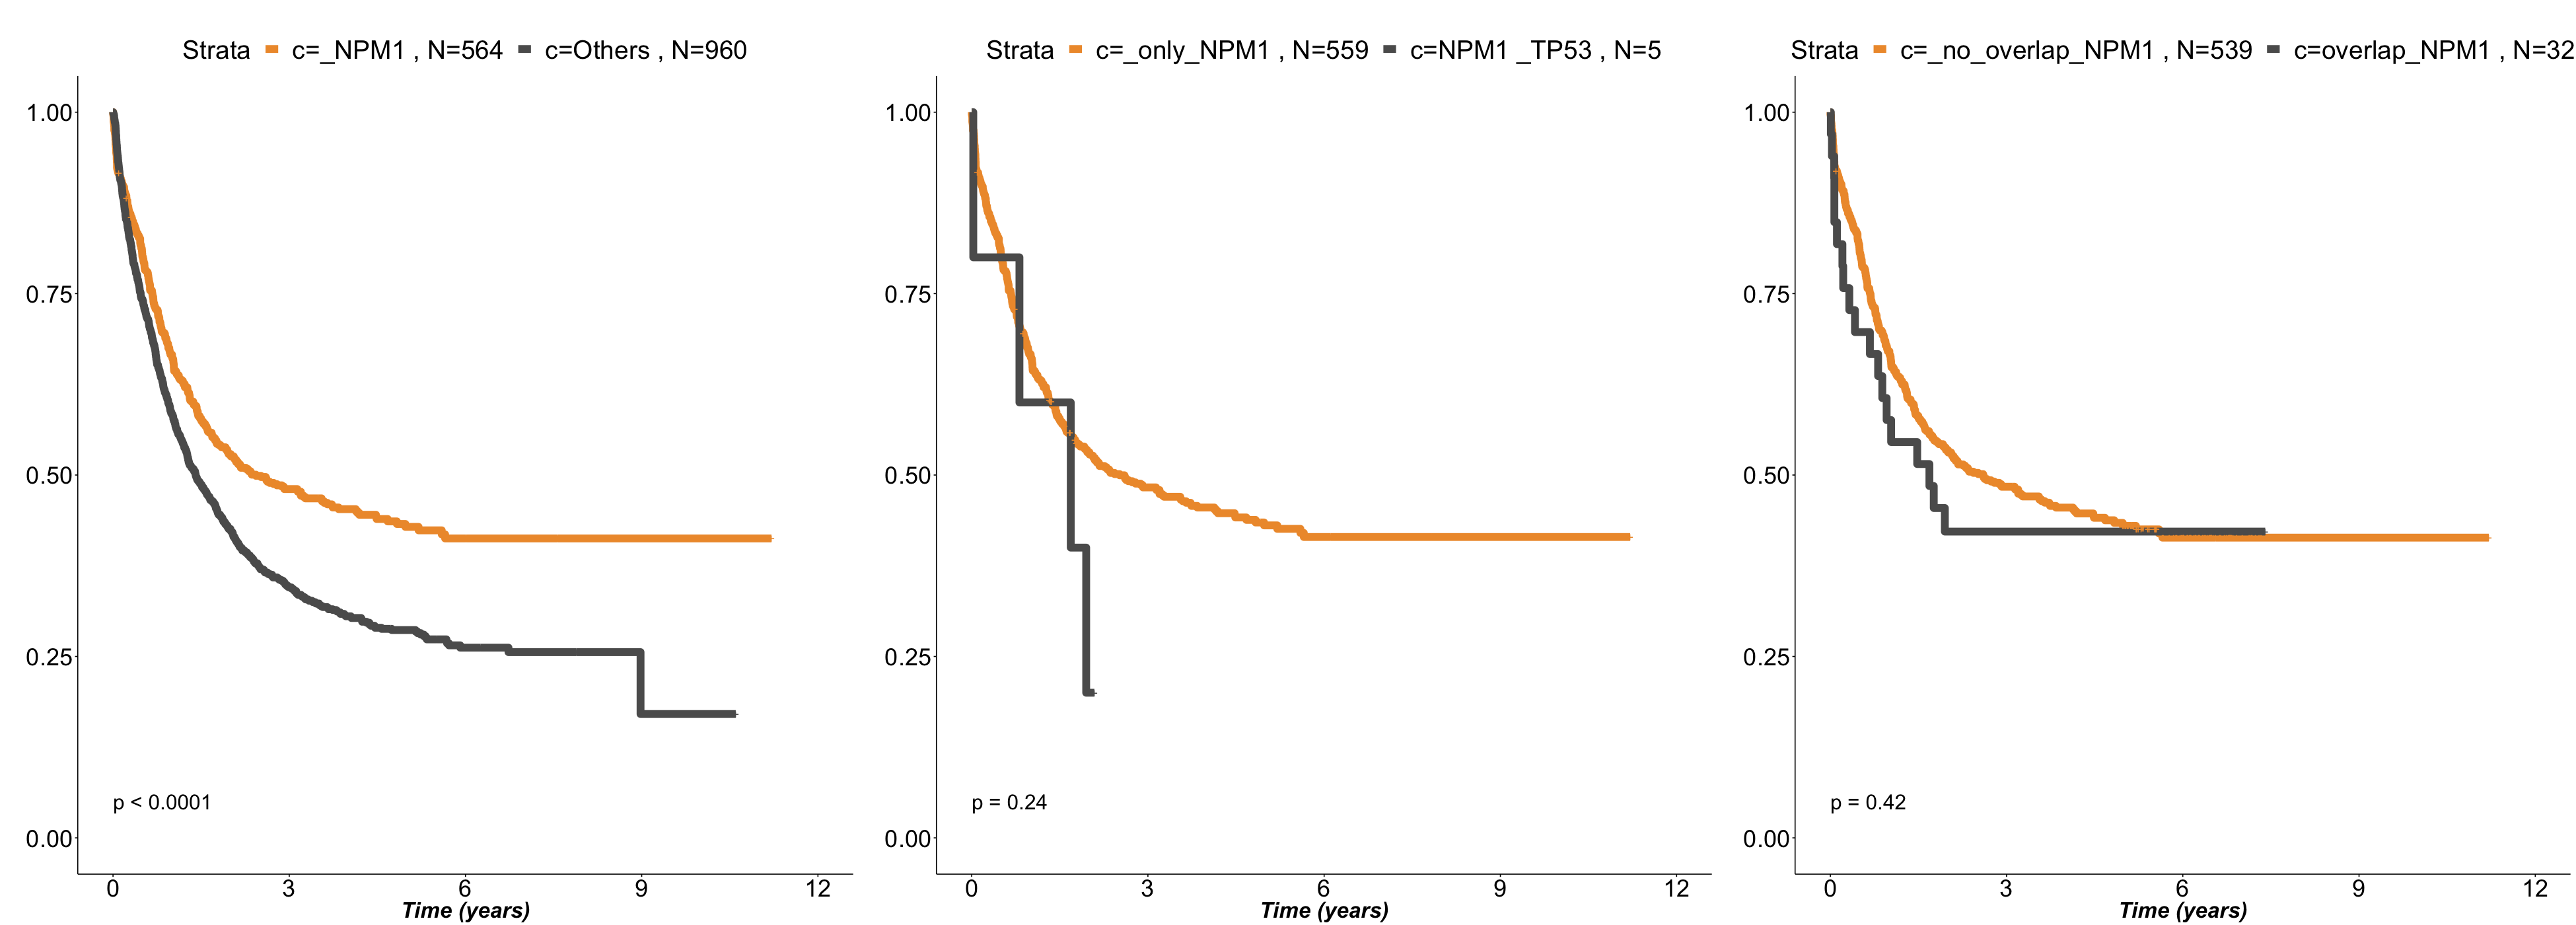

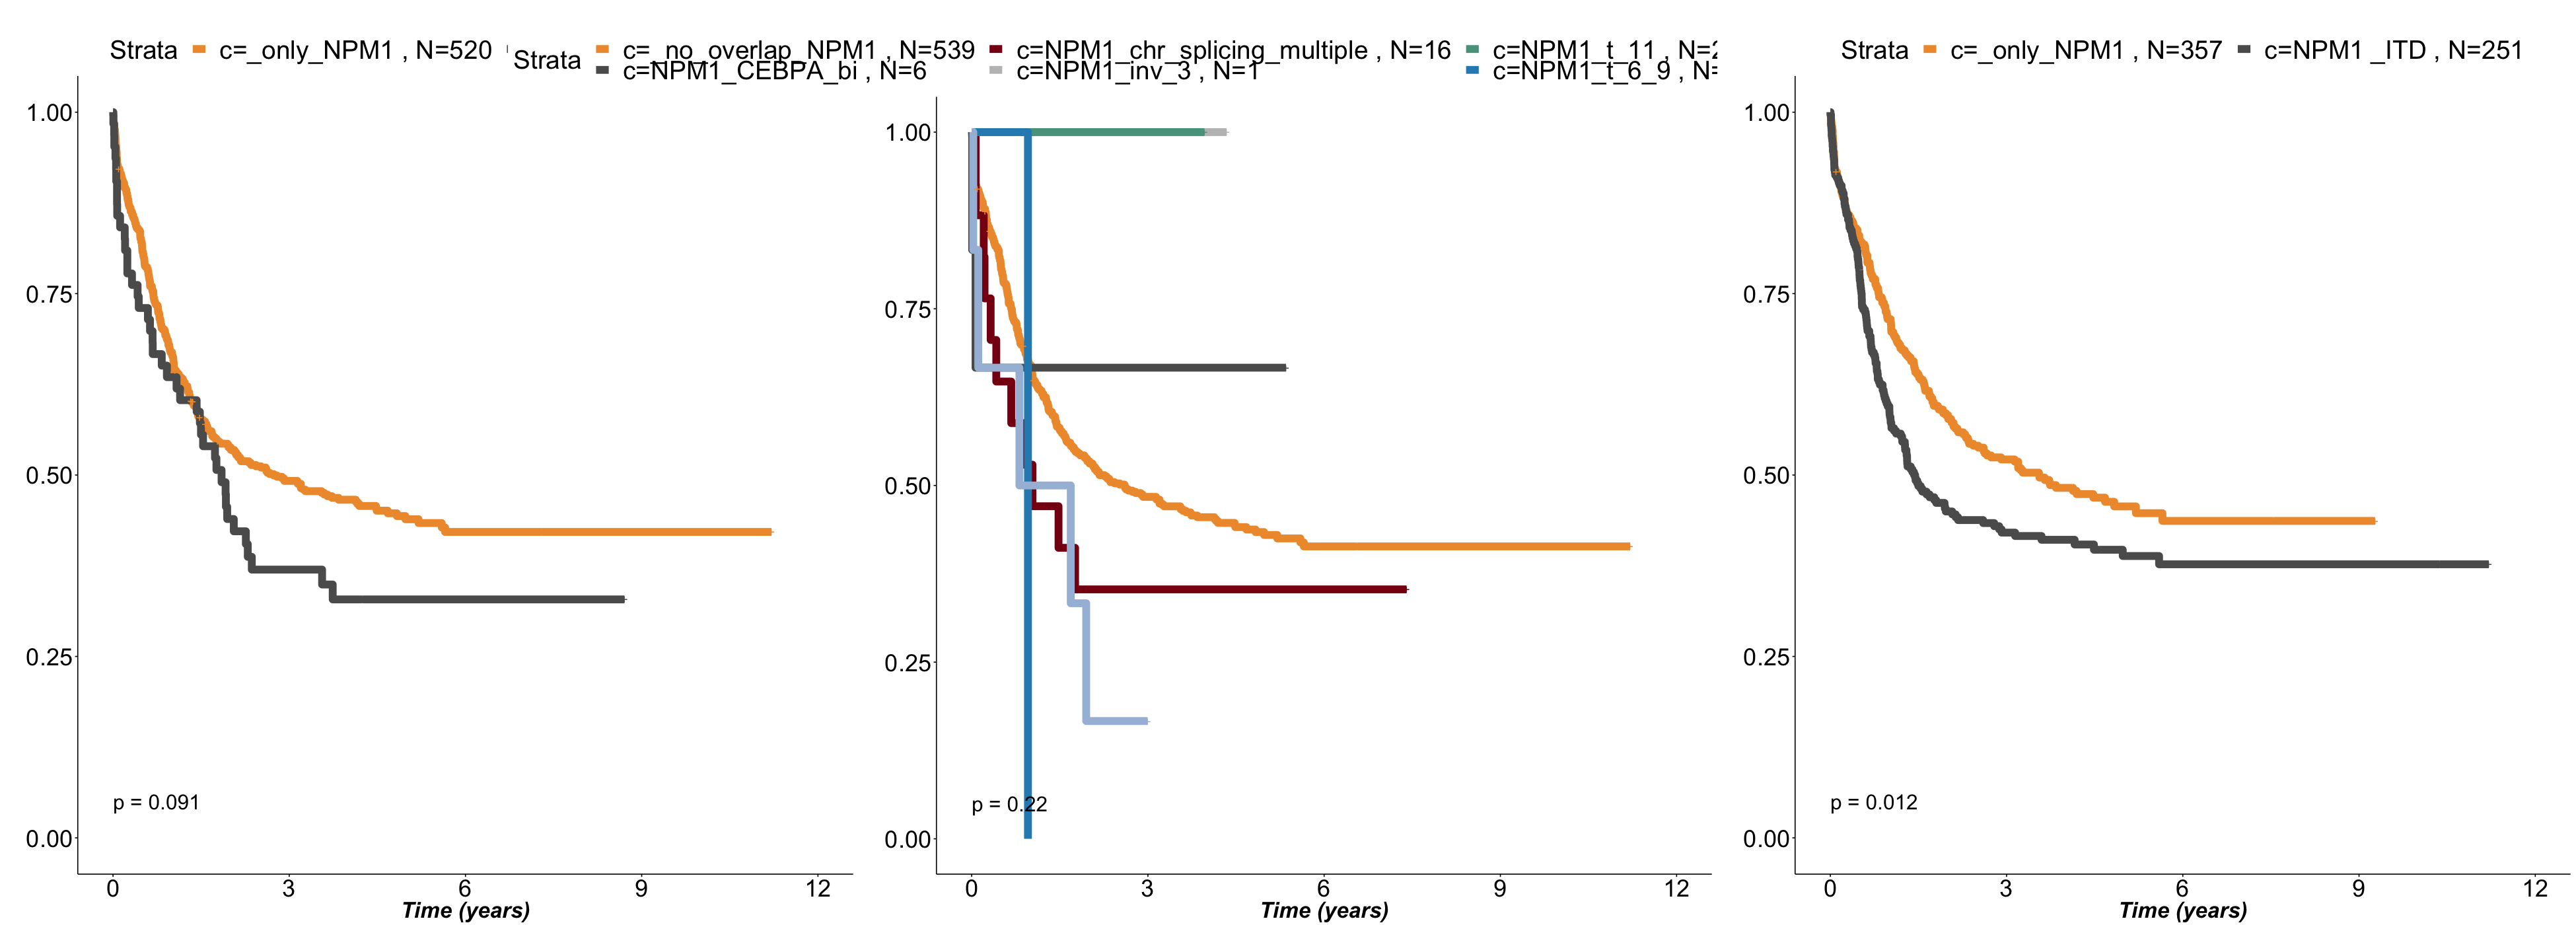

In [351]:
source('tools.R')
cols_component <- colnames(df_final %>% dplyr:: select(starts_with("full_component_")))
cols_overlap <- colnames(df_final %>% dplyr:: select(starts_with("overlap_")))
set_notebook_plot_size(39,14)
for (col in c("full_component_NPM1")){
#     png(paste(col,"_surv.png",sep=""),width=6000,height=2000,res=200)
    survlist <- list()
    i <-1
    tmp <- df_w_correlates
    tmp$c <- ifelse(tmp[,col]==1,gsub("full_component_","_",col),"Others")
    surv_object <- Surv(time = tmp$os, event = tmp$os_status)
    fit_all <- survfit(surv_object ~ c, data = tmp)
    survlist[[i]] <- plot_surv_curves(fit_all,legend="top")
    i <- i+1
    
    
    tmp <- df_w_correlates[df_w_correlates[,col]==1,]   
    tmp$c <- ifelse(tmp$TP53==1,paste(gsub("full_component_","",col),"_TP53"),gsub("full_component_","_only_",col))   
    surv_object <- Surv(time = tmp$os, event = tmp$os_status)
    fit_stratify <- survfit(surv_object ~ c, data = tmp)
    survlist[[i]] <- plot_surv_curves(fit_stratify,legend="top")
    i <- i+1
    
    
    tmp <- df_w_correlates[df_w_correlates[,col]==1,]
    tmp$c <- ifelse(rowSums(tmp[,cols_component])>1,gsub("full_component_","overlap_",col),gsub("full_component_","_no_overlap_",col))
    surv_object <- Surv(time = tmp$os, event = tmp$os_status)
    fit_overlap <- survfit(surv_object ~ c, data = tmp)
    survlist[[i]] <- plot_surv_curves(fit_overlap,legend="top")
    i <- i+1
    
    
    tmp <- df_w_correlates[df_w_correlates[,col]==1,]   
    tmp$c <- ifelse(tmp$SRSF2==1,paste(gsub("full_component_","",col),"_SRSF2"),gsub("full_component_","_only_",col))   
    surv_object <- Surv(time = tmp$os, event = tmp$os_status)
    fit_stratify <- survfit(surv_object ~ c, data = tmp)
    survlist[[i]] <- plot_surv_curves(fit_stratify,legend="top")
    i <- i+1
    
    
    tmp <- df_w_correlates[df_w_correlates[,col]==1,]    
    cols_to_stratify <- setdiff(names(which(colSums(tmp[,cols_component])>0)),col)
    tmp$c <- gsub("full_component_","_no_overlap_",col)
    for (col_str in cols_to_stratify){
        tmp[tmp[,col_str]==1,]$c <- gsub("full_component",gsub("full_component_","",col),col_str)
    }
    surv_object <- Surv(time = tmp$os, event = tmp$os_status)
    fit_stratify <- survfit(surv_object ~ c, data = tmp)
    survlist[[i]] <- plot_surv_curves(fit_stratify,legend="top")
    i <- i+1    
    
    
    tmp <- df_w_correlates[df_w_correlates[,col]==1,]   
    tmp$c <- ifelse(tmp$ITD==1,paste(gsub("full_component_","",col),"_ITD"),gsub("full_component_","_only_",col))   
    surv_object <- Surv(time = tmp$os, event = tmp$os_status)
    fit_stratify <- survfit(surv_object ~ c, data = tmp)
    survlist[[i]] <- plot_surv_curves(fit_stratify,legend="top")
    i <- i+1
    
    arrange_ggsurvplots(survlist,ncol=3,nrow=1)
#     dev.off()
    }


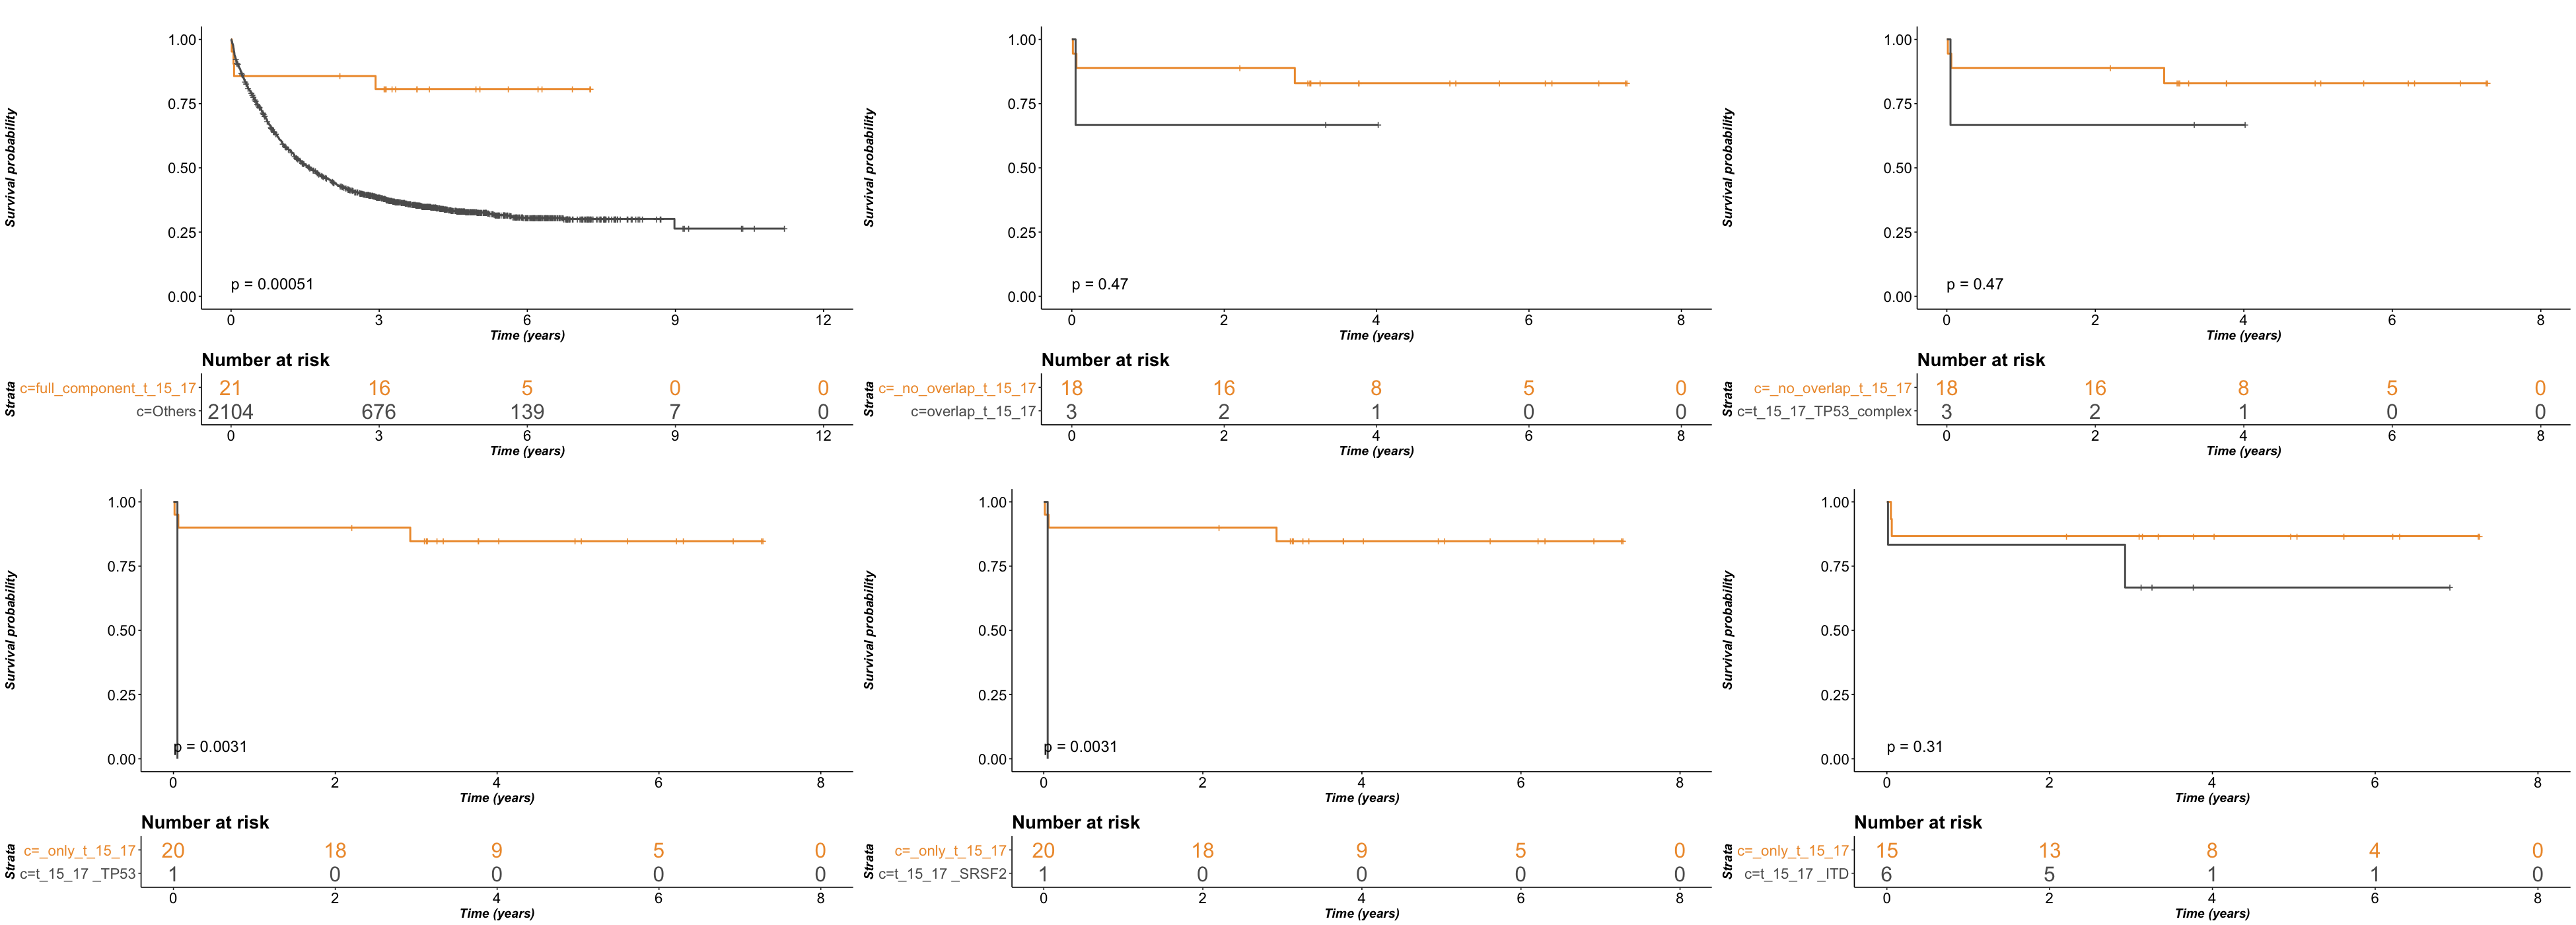

In [211]:
cols_component <- colnames(df_final %>% dplyr:: select(starts_with("full_component_")))
cols_overlap <- colnames(df_final %>% dplyr:: select(starts_with("overlap_")))
set_notebook_plot_size(39,14)
for (col in cols_component[1]){
#     png(paste(col,"_surv.png",sep=""),width=3000,height=2000,res=110)
    survlist <- list()
    i <-1
    tmp <- df_w_correlates
    tmp$c <- ifelse(tmp[,col]==1,col,"Others")
    surv_object <- Surv(time = tmp$os, event = tmp$os_status)
    fit_all <- survfit(surv_object ~ c, data = tmp)
    survlist[[i]] <- plot_surv(fit_all,legend="none")
    i <- i+1
    
    
    tmp <- df_w_correlates[df_w_correlates[,col]==1,]   
    tmp$c <- ifelse(tmp$TP53==1,paste(gsub("full_component_","",col),"_TP53"),gsub("full_component_","_only_",col))   
    surv_object <- Surv(time = tmp$os, event = tmp$os_status)
    fit_stratify <- survfit(surv_object ~ c, data = tmp)
    survlist[[i]] <- plot_surv(fit_stratify,legend="none")
    i <- i+1
    
    
    tmp <- df_w_correlates[df_w_correlates[,col]==1,]
    tmp$c <- ifelse(rowSums(tmp[,cols_component])>1,gsub("full_component_","overlap_",col),gsub("full_component_","_no_overlap_",col))
    surv_object <- Surv(time = tmp$os, event = tmp$os_status)
    fit_overlap <- survfit(surv_object ~ c, data = tmp)
    survlist[[i]] <- plot_surv(fit_overlap,legend="none")
    i <- i+1
    
    
    tmp <- df_w_correlates[df_w_correlates[,col]==1,]   
    tmp$c <- ifelse(tmp$SRSF2==1,paste(gsub("full_component_","",col),"_SRSF2"),gsub("full_component_","_only_",col))   
    surv_object <- Surv(time = tmp$os, event = tmp$os_status)
    fit_stratify <- survfit(surv_object ~ c, data = tmp)
    survlist[[i]] <- plot_surv(fit_stratify,legend="none")
    i <- i+1
    
    
    tmp <- df_w_correlates[df_w_correlates[,col]==1,]    
    cols_to_stratify <- setdiff(names(which(colSums(tmp[,cols_component])>0)),col)
    tmp$c <- gsub("full_component_","_no_overlap_",col)
    for (col_str in cols_to_stratify){
        tmp[tmp[,col_str]==1,]$c <- gsub("full_component",gsub("full_component_","",col),col_str)
    }
    surv_object <- Surv(time = tmp$os, event = tmp$os_status)
    fit_stratify <- survfit(surv_object ~ c, data = tmp)
    survlist[[i]] <- plot_surv(fit_stratify,legend="none")
    i <- i+1    
    
    
    tmp <- df_w_correlates[df_w_correlates[,col]==1,]   
    tmp$c <- ifelse(tmp$ITD==1,paste(gsub("full_component_","",col),"_ITD"),gsub("full_component_","_only_",col))   
    surv_object <- Surv(time = tmp$os, event = tmp$os_status)
    fit_stratify <- survfit(surv_object ~ c, data = tmp)
    survlist[[i]] <- plot_surv(fit_stratify,legend="none")
    i <- i+1
    
    arrange_ggsurvplots(survlist,ncol=3,nrow=2)
#     dev.off()
    }


# DENSITY VOLCANO PLOTS BY COMPONENT

In [ ]:
tmp_final <- read.table("../clustering/clustering_Final_1/df_final_full_component.tsv")
df <- data.frame(mean_survival = double() )
for (co in colnames(tmp_final[,c(170:185)])){
    df[co,] <- mean(tmp_final[tmp_final[,co]==1,]$os)
    df[co,"name"] <- co
}
 
components_ordered <- df[order(df$mean_survival,decreasing=T),]$name

set_notebook_plot_size(35,6)
# for (co in c('eln_2017_favorable','eln_2017_intermediate','eln_2017_adverse',components_ordered)){
for (co in c("eln_2017_favorable")){
    ## Prepare colors
    
    if(co=="eln_2017_favorable"){
         pal = c("#5C5C5C","#009E73","#0072B2")
         cols <- c("#009E73","#0072B2") %>% set_names(c(co, paste(co,"ITD",sep="_")))   
    }

    if(co=="eln_2017_intermediate"){
        pal = c("#5C5C5C","#a6bddb","#0072B2")
        cols <- c("#a6bddb","#0072B2") %>% set_names(c(co, paste(co,"ITD",sep="_")))
    }
        
    if(co=="eln_2017_adverse"){
        pal = c("#5C5C5C","#870C14","#0072B2")
        cols <- c("#870C14","#0072B2") %>% set_names(c(co, paste(co,"ITD",sep="_")))
    }
    if(is.element(co,components_ordered)){
        pal = c("#5C5C5C","#EE9937","#0072B2")
        cols <- c("#EE9937","#0072B2") %>% set_names(c(co, paste(co,"ITD",sep="_")))
    }
       
    ## Handle ITD cases
       
    if (is.element(co , c("full_component_t_8_21","full_component_t_6_9","full_component_NPM1","full_component_CEBPA_bi","full_component_DNMT3A_IDH1_2","full_component_WT1","full_component_not_assigned"))){
        
        # Surv plot
        
        tmp <- tmp_final
        tmp$comparison <- ifelse(tmp[,co]==1 & tmp$ITD==1 ,paste(co,"ITD",sep="_"),
                                 ifelse(tmp[,co]==1 & tmp$ITD==0 ,co,"_Others"))
        surv_object <- Surv(time = tmp$os, event = tmp$os_status)
        fit_surv <- survfit(surv_object ~ comparison, data = tmp)

        # Risk density
        
        tmp_density <- tmp_final[tmp_final[,co]==1 &  tmp_final$ITD==0,]
        fit_density <- kphaz.fit(tmp_density$os,tmp_density$os_status,q=1,method="nelson")
        df_density <- fit_density%>%
        as.data.frame()
        df_density[,"category"] <- co
        tmp_density <- tmp_final[tmp_final[,co]==1 &  tmp_final$ITD==1,]
        fit_density <- kphaz.fit(tmp_density$os,tmp_density$os_status,q=1,method="nelson")
        df1 <- fit_density%>%
        as.data.frame()
        df1[,"category"] <- paste(co,"ITD",sep="_")        
        df_density <- rbind(df_density,df1)
        
        # Risk overtime
        
        tmp_overtime <- tmp_final[tmp_final[,co]==1 ,]
        fit <- kphaz.fit(tmp_overtime$os,tmp_overtime$os_status,q=1,method="nelson")
        df_overtime <- fit %>% as.data.frame() 
        df_overtime[,"category"] <- co
        tmp_overtime <- tmp_final[tmp_final[,co]==1 & tmp_final$ITD==1,]
        fit <- kphaz.fit(tmp_overtime$os,tmp_overtime$os_status,q=1,method="nelson")
        df1 <- fit%>%
        as.data.frame()
        df1[,"category"] <- paste(co,"ITD",sep="_")
        df_overtime <- rbind(df_overtime,df1)
        
       
    } else {   #( for cases with no ITD separation)
                
            tmp <- tmp_final
            tmp$comparison <- ifelse(tmp[,co]==1,co,"_Others")
            surv_object <- Surv(time = tmp$os, event = tmp$os_status)
            fit_surv <- survfit(surv_object ~ comparison, data = tmp)

            tmp_density <- tmp_final[tmp_final[,co]==1 ,]
            fit_density <- kphaz.fit(tmp_density$os,tmp_density$os_status,q=1,method="nelson")
            df_density <- fit_density%>%
            as.data.frame()
            df_density[,"category"] <- co
        
            tmp_overtime <- tmp_final[tmp_final[,co]==1 ,]
            fit <- kphaz.fit(tmp_overtime$os,tmp_overtime$os_status,q=1,method="nelson")
            df_overtime <- fit %>% as.data.frame() 
            df_overtime[,"category"] <- co 
        
            } 
         
        
      p <- plot_surv_curves(fit_surv,vals=pal)
#     p <- ggsurvplot(fit_surv,  pval = TRUE,main = "Survival curve",risk.table=T,submain = "Kaplan-Meier estimates",palette = pal,legend="none",
#               ggtheme = theme_survminer(
#              font.main = c(16, "bold", "darkblue"),
#              font.submain = c(15, "bold.italic", "purple"),
#              font.caption = c(14, "plain", "orange"),
#              font.x = c(14, "bold.italic", "red"),
#              font.y = c(14, "bold.italic", "darkred"),
#              font.tickslab = c(12, "plain", "darkgreen")))

    q <- ggplot(df_density, aes(x=log(haz,10),color=category,fill=category)) + 
    geom_density(aes(y=..count..),alpha=1)+guides(fill=FALSE)+guides(fill=F,color=F)+ggtitle(co)+xlim(c(-2,1)) +theme(plot.title = element_text(hjust = 0.5,size=25),axis.text=element_text(size=12),
        axis.title=element_text(size=14,face="bold")) + scale_fill_manual(values=pal[2:3])


    r <- ggplot(df_overtime,aes(x = log(time), y = log(haz), colour=category)) + geom_point() +
    geom_smooth(method="auto") + scale_colour_manual(values=cols) + 
    xlab("log(Time)") + ylab("log(h(t))")+ theme(legend.position = "none") +theme(plot.title = element_text(hjust = 0.5,size=25),axis.text=element_text(size=12),
        axis.title=element_text(size=14,face="bold"))
    
    
    ## Volcano Plot Univariate
    
    df <- data.frame(hazard = double(),pvalue = double(),Frequency = double() )
    data <- tmp_final[tmp_final[,co]==1,]

    for (col in c(gen,cyto)){
        surv_object <- Surv(time = data$os, event = data$os_status)
        fit <- coxph(as.formula(paste("Surv(os, os_status) ~ ",
                           col)), data = data)

        df[col,1:3] <- c(summary(fit)$coef[2],summary(fit)$sctest[["pvalue"]],100*sum(data[,col])/dim(data)[1])                 
         }
    df[,"adjusted_pvalue"] <- p.adjust(df$pvalue)
    df[,"-log10(adjusted_pvalue)"] <- -log(p.adjust(df$pvalue),10)
    df[,"log10(hazard)"] <- log(df$hazard,10)
    df["names"] <- rownames(df)
    df$Model <- ifelse(df$names %in% gen,"gen",
                      ifelse(df$names %in% cyto,"cyto",
                            ifelse(df$names %in% clin, "clin",
                                  ifelse(df$names %in% demo, "demo",
                                        ifelse(df$names %in% eln, "eln","comp")))))
    df$Frequency <- ifelse(df$names %in% clin, 5,
                                  ifelse(df$names %in% demo, 5, df$Frequency))
    
    colors_analysis <- c(gen="#BFBFBF",cyto="#2b8cbe")
    df <- df[order(df$adjusted_pvalue),]
    s <- ggplot(df, aes(log10(hazard), -log10(adjusted_pvalue))) + #volcanoplot with log2Foldchange versus pvalue
        geom_point(aes(size=Frequency,col=Model)) + geom_text_repel(data=df[(df["adjusted_pvalue"]<0.1) | (df["log10(hazard)"]< -5),], aes(label=names,fontface=2))+scale_size_continuous(range = c(3,12)) + 
         scale_color_manual(values=colors_analysis,limits=names(colors_analysis))+  ## respect color in feature importance
        theme(plot.title = element_text(hjust = 0.5,size=25),axis.text=element_text(size=12),axis.title=element_text(size=14,face="bold"))  + theme(legend.position="top")

    
    ## Multivariate Plot
    if (dim(tmp_final[tmp_final[,co]==1,])>100){    # we can not run lasso on a model without any events (variance 0)
        data <- tmp_final[tmp_final[,co]==1,]
        df_multi <- NULL
        i <- 1
        for (i in c(1:100)){
            res1 <- cv.glmnet(data.matrix(data[,c(gen,cyto)]), Surv(data$os,data$os_status), family="cox",alpha=1,nfolds=10)
            df_multi <- cbind(df_multi,as.matrix(coef(res1,s="lambda.min")))
            i <- i+1
            }

        l <- data.frame(coef = rowSums(df_multi)/100)
        l$names <- rownames(l)
        l$Model <- ifelse(l$names %in% gen,"gen",
                      ifelse(l$names %in% cyto,"cyto",
                            ifelse(l$names %in% clin, "clin",
                                  ifelse(l$names %in% demo, "demo",
                                        ifelse(l$names %in% eln, "eln","comp")))))
        t <- ggplot(l[l$coef!=0,],aes(x=names,y=coef,fill=Model))+geom_bar(stat="identity")+coord_flip()+
        theme(plot.title = element_text(hjust = 0.5,size=25),axis.text=element_text(size=12),axis.title=element_text(size=14,face="bold"))+
        scale_fill_manual(values=colors_analysis,limits=names(colors_analysis))
        }

    
#     png(paste(co,"_risk.png",sep=""),width=3000,height=2000,res=110)
    # Hanfle p value issues
    if (dim(tmp_final[tmp_final[,co]==1,])[1]<100 & min(df$adjusted_pvalue)>0.1){     
        cat(co,'a',dim(tmp_final[tmp_final[,co]==1,])[1],min(df$adjusted_pvalue))
        grid.arrange(arrangeGrob(p$plot,q,r,nrow=1))
    } else if (dim(tmp_final[tmp_final[,co]==1,])[1]>100 & min(df$adjusted_pvalue)>0.1){
        cat(co,'b',dim(tmp_final[tmp_final[,co]==1,])[1],min(df$adjusted_pvalue))
        grid.arrange(arrangeGrob(p$plot,q,r,t,nrow=1))
    } else if (dim(tmp_final[tmp_final[,co]==1,])[1]<100 & min(df$adjusted_pvalue)<0.1){
        cat(co,'c',dim(tmp_final[tmp_final[,co]==1,])[1],min(df$adjusted_pvalue))
        grid.arrange(arrangeGrob(p$plot,q,r,s, nrow=1))
    } else {
        cat(co,'d',dim(tmp_final[tmp_final[,co]==1,]),min(df$adjusted_pvalue))
         grid.arrange(arrangeGrob(p$plot,q,r,s,t,nrow=1))
    }
#     dev.off()
}




# GENE-GENE INTERACTION

In [ ]:
source('tools.R')
gene_gene_interactions(genomicData=df_final[,c(genes,cytos)])
genomicData <- df_final[,c(genes,cytos)]
genomicData <- (sapply(unique(sub("(_ITD)|(_TKD)|(_other)|(_mono)|(_bi)|(_p172)|(_p140)","",colnames(genomicData) )), function(x) rowSums(genomicData[grep(paste(x,"($|_.+)",sep=""), colnames(genomicData))])) > 0)+0
genomicData <- genomicData[,colSums(genomicData, na.rm=TRUE)>=8]
genomicGroups <- factor(grepl("^[a-z]", colnames(genomicData)) + grepl("t_*[0-9M]", colnames(genomicData) ), labels=c("Genetics","CNA","Fusions"))
dim(genomicData)

set_notebook_plot_size(20,20)
png("gene_gene_interaction.png",width=3000,height=3000,res=250)
logPInt <- sapply(1:ncol(genomicData), function(i) sapply(1:ncol(genomicData), function(j) {
    f<- try(fisher.test(genomicData[,i], genomicData[,j]), silent=TRUE)
    if(class(f)=="try-error"){
        0
    } else{
        ifelse(f$estimate>1, -log10(f$p.val),log10(f$p.val))}}
                                                         ))
    
odds <- sapply(1:ncol(genomicData), function(i) sapply(1:ncol(genomicData), function(j) {f<- try(fisher.test(table(genomicData[,i], genomicData[,j])), silent=TRUE); if(class(f)=="try-error") f=NA else f$estimate} ))
pairs <- sapply(1:ncol(genomicData), function(i) colMeans(genomicData * genomicData[,i], na.rm=TRUE))
diag(logPInt) <- 0
diag(odds) <- 1
colnames(odds) <- rownames(odds) <- colnames(logPInt) <- rownames(logPInt) <- colnames(genomicData) 
odds[odds<1e-3] = 1e-4
odds[odds>1e3] = 1e4
odds[10^-abs(logPInt) > 0.05] = 1
logOdds=log10(odds)
diag(logPInt) <- NA
par(bty="n", mgp = c(2,.5,0), mar=c(4,4,4,4)+.1, las=2, tcl=-.33) 
ix = TRUE#colnames(interactions) %in% colnames(all_genotypes)
d <- dist(t(genomicData[,ix]) + 10*as.numeric(genomicGroups))
h = hclust(d, method="average")
o = order(genomicGroups,-colSums(genomicData, na.rm=TRUE))#order(cmdscale(d, k=1))#h$order #c(h$order,(length(h$o rder) +1):ncol(interactions))
M <- matrix( NA, ncol=ncol(odds), nrow=nrow(odds))
M[lower.tri(M)] <- cut(logOdds[o,o][lower.tri(M)], breaks = c(-4:0-.Machine$double.eps,0:4), include.lowest=TRUE) 
M[upper.tri(M, diag=TRUE)] <- as.numeric(cut(pairs[o,o][upper.tri(M, diag=TRUE)]*nrow(genomicData), breaks=c(-1,0 ,5,10,20,50,100,200,600))) + 9
image(x=1:ncol(logPInt), y=1:nrow(logPInt), M, col=c(brewer.pal(9,"BrBG"), c("white",brewer.pal(7,"Reds"))), breaks=0:max(M,na.rm=TRUE), xaxt="n", yaxt="n", xlab="",ylab="", xlim=c(0, ncol(logPInt)+3), ylim=c(0, ncol(logPInt)+3))
l <- colnames(logPInt)[o]
mtext(side=1, at=1:ncol(logPInt), l, cex=.66, font=ifelse(grepl("^[A-Z]",l),3,1))
mtext(side=2, at=1:ncol(logPInt), l, cex=.66, font=ifelse(grepl("^[A-Z]",l),3,1))
abline(h=0:ncol(logPInt)+.5, col="white", lwd=.5)
abline(v=0:ncol(logPInt)+.5, col="white", lwd=.5)
P <- 10^-abs(logPInt[o,o])
P[upper.tri(P)] <- NA
w = arrayInd(which(p.adjust(P, method="BH") < .1), rep(nrow(logPInt),2))
points(w, pch=".", col="black")
w = arrayInd(which(p.adjust(P) < .05), rep(nrow(logPInt),2))
points(w, pch="*", col="black")
image(y = 1:9 +18, x=rep(ncol(logPInt),2)+c(2,3), z=matrix(c(1:8), nrow=1), col=c("white",brewer.pal(7,"Reds")),
add=TRUE)
axis(side = 4, at = seq(1,7) + 19, cex.axis=.66, tcl=-.15, label=c(1,5,10,20,50,100,200), las=1, lwd=.5)
mtext(side=4, at=28, "Frequency", las=2, line=-1,cex=.66)
image(y = 1:8 +5, x=rep(ncol(logPInt),2)+c(2,3), z=matrix(c(1:8), nrow=1), col=brewer.pal(8,"BrBG"), add=TRUE)
axis(side = 4, at = seq(1,7) + 5.5, cex.axis=.66, tcl=-.15, label=10^seq(-3,3), las=1, lwd=.5)
mtext(side=4, at=14, "Odds ratio", las=2, line=-1,cex=.66)
mtext(side=4, at=4, "Significance", las=2, line=-1,cex=.66)
points(x=rep(ncol(logPInt),2)+2.5, y=1:2, pch=c("*","."))
image(x=rep(ncol(logPInt),2)+c(2,3), y=(2:3) +0.5, z=matrix(1), col=brewer.pal(3,"BrBG"), add=TRUE)
mtext(side=4, at=3:1, c("P > 0.05", "FDR < 0.1", "FWER < 0.05"), cex=.66, line=0.2)
dev.off()

# LASSO FOR CLINICAL CORRELATES MULTIREGRESSION

In [ ]:
source('tools.R')
multivariate_regression(df_final,target="age",features=c(gen,cyto),fam="gaussian")
# binomial for binary and categorical , gaussian for continuous
# for (correlate in c("age","gender","eln_2017_favorable","eln_2017_intermediate","eln_2017_adverse","wbc","hb","plt","bm_blasts")){
library(doMC)
registerDoMC(cores=50)
for (correlate in c("gender")){
#     png(paste(correlate,"_lasso.png",sep=""),width=4500,height=2500,res=200)
    data <- tmp_final
    fam <- ifelse(correlate %in% c("gender","eln_2017_favorable","eln_2017_intermediate","eln_2017_adverse"),"binomial","gaussian")
    df_multi <- NULL
    i <- 1
    for (i in c(1:100)){
        res1 <- cv.glmnet(data.matrix(data[,c(gen,cyto)]), data[,correlate], family=fam,alpha=1,nfolds=10,parallel = T)
        df_multi <- cbind(df_multi,as.matrix(coef(res1,s="lambda.min")))
        i <- i+1
        }
    l <- data.frame(coef = rowSums(df_multi)/100)
    l$names <- rownames(l)
    l <- l[-1,]
    l$abs_coef <- abs(l$coef)
    l$Model <- ifelse(l$names %in% gen,"gen",
                  ifelse(l$names %in% cyto,"cyto",
                        ifelse(l$names %in% clin, "clin",
                              ifelse(l$names %in% demo, "demo",
                                    ifelse(l$names %in% eln, "eln","comp")))))
    l <- l %>% top_n(10,abs_coef)
    t <- ggplot(l[l$coef!=0,],aes(x=reorder(names,abs_coef),y=coef,fill=Model))+geom_bar(stat="identity")+coord_flip()+
    theme(plot.title = element_text(hjust = 0.5,size=25),axis.text=element_text(size=22),axis.title=element_text(size=34,face="bold"),
         legend.position="none")+
    scale_fill_manual(values=colors_analysis)+ylab(paste(paste("Lasso Regression Coefficients for ",correlate,sep="")," (averaged over 100 repetitions)",sep="")) + xlab("Top 10 Features")
    plot(t)
#     dev.off()
}

# LASSO FOR CLINICAL CORRELATES UNIVARIATE

# I) BOTH (THE ONE TO KEEP)

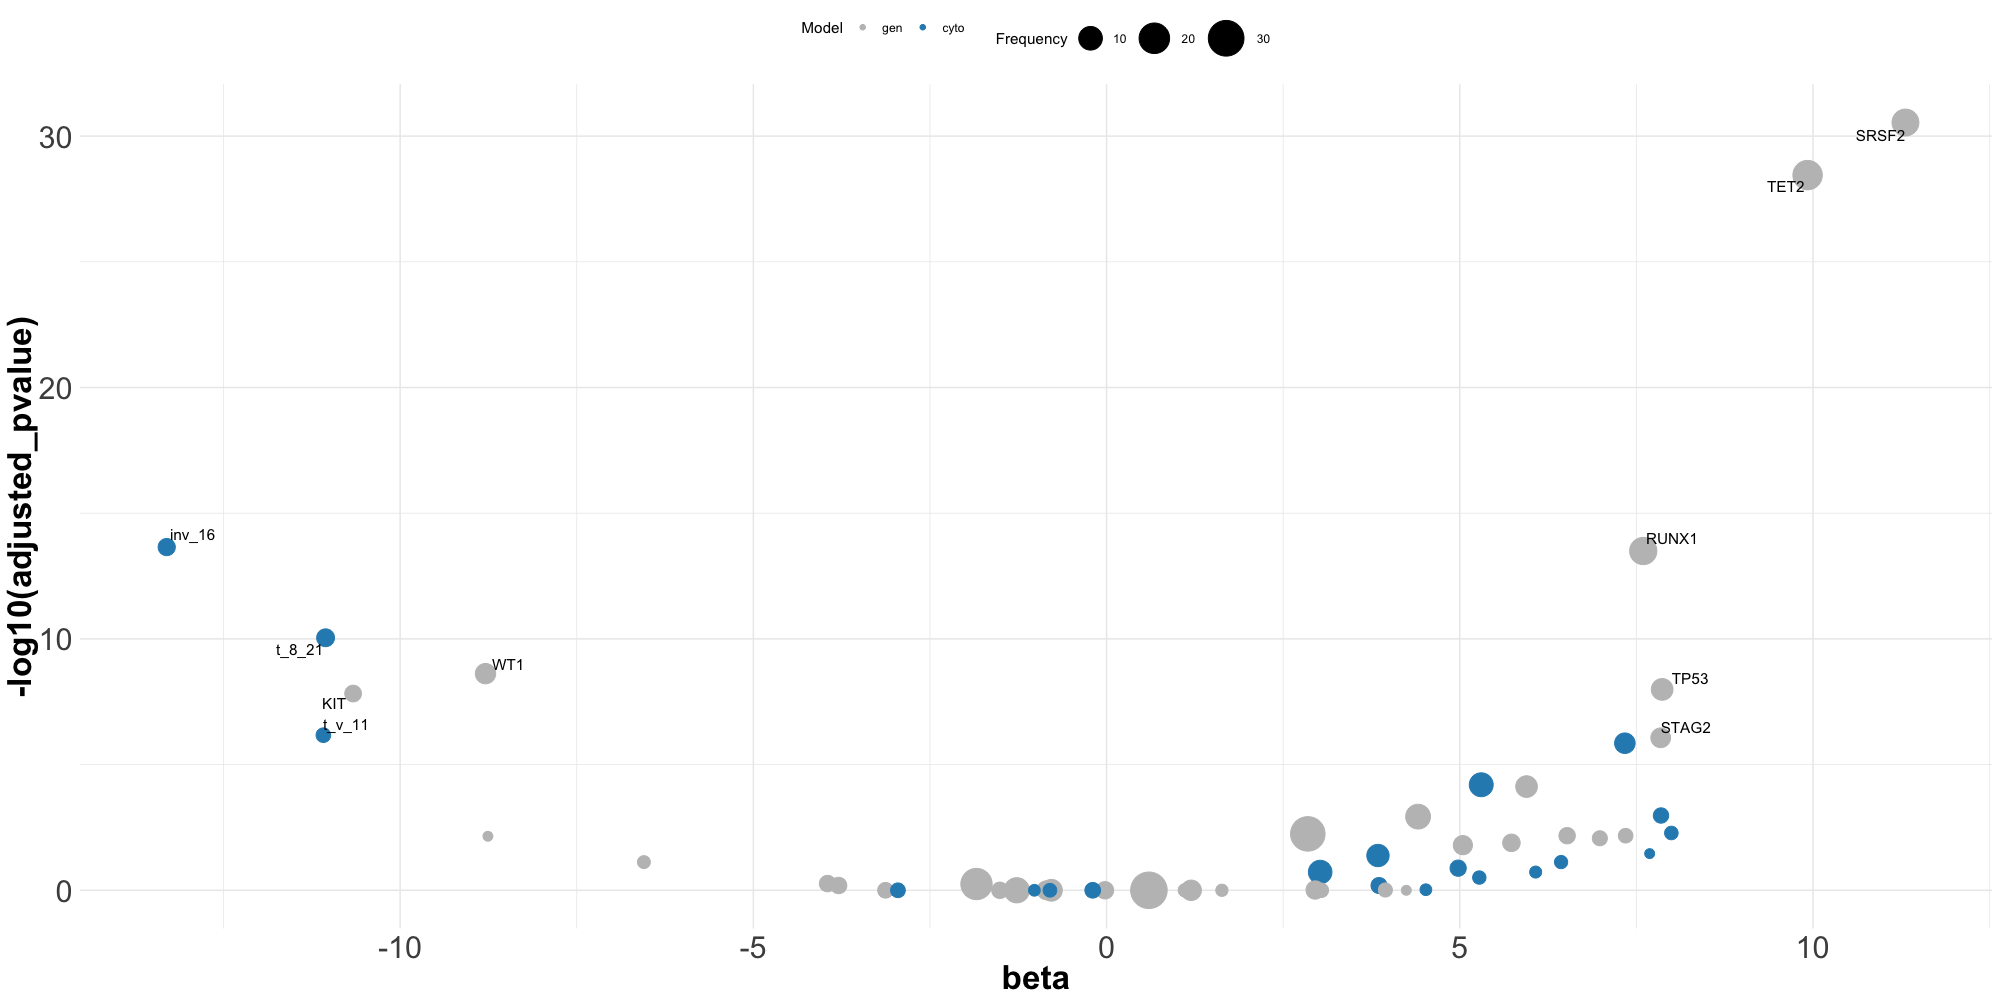

In [7]:
source('tools.R')
univariate_volcano(df_final,target="age",features=c(gen,cyto),type="continuous")

# II) CONTINUOUS

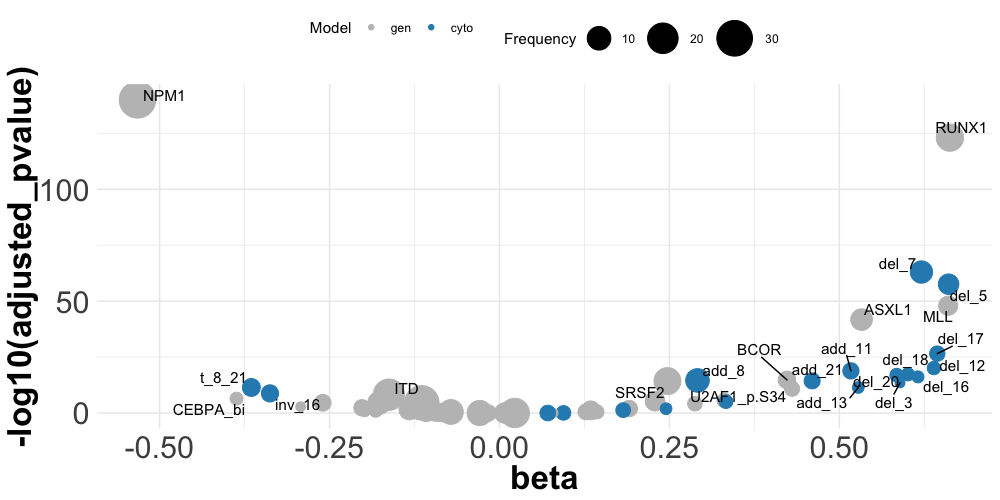

In [380]:
df <- data.frame(beta = double(),pvalue = double(),Frequency = double() )
set_notebook_plot_size(10,5)
for (correlate in c("eln_2017_adverse")){
#     png(paste(correlate,"_univariate.png",sep=""),width=4500,height=2500,res=300)
    data <- tmp_final
    for (col in c(gen,cyto)){
        simple.fit = lm(as.formula(paste(paste(correlate," ~ ",sep= ""),col,sep="")), data=tmp_final)
        df[col,1:3] <- c(coef(simple.fit)[[col]],glance(simple.fit)[["p.value"]],100*sum(data[,col])/dim(data)[1])
        }
}
df[,"adjusted_pvalue"] <- p.adjust(df$pvalue)
df[,"-log10(adjusted_pvalue)"] <- -log(p.adjust(df$pvalue),10)
df["names"] <- rownames(df)
df$Model <- ifelse(df$names %in% gen,"gen",
                  ifelse(df$names %in% cyto,"cyto",
                        ifelse(df$names %in% clin, "clin",
                              ifelse(df$names %in% demo, "demo",
                                    ifelse(df$names %in% eln, "eln","comp")))))
df$Frequency <- ifelse(df$names %in% clin, 5,
                              ifelse(df$names %in% demo, 5, df$Frequency))

colors_analysis <- c(gen="#BFBFBF",cyto="#2b8cbe")
df <- df[order(df$adjusted_pvalue),]
s <- ggplot(df, aes(beta, -log10(adjusted_pvalue))) + #volcanoplot with log2Foldchange versus pvalue
        geom_point(aes(size=Frequency,col=Model)) + geom_text_repel(data=df[(df["adjusted_pvalue"]<0.000001) ,], aes(label=names,fontface=8))+scale_size_continuous(range = c(3,12)) + 
         scale_color_manual(values=colors_analysis,limits=names(colors_analysis))+  ## respect color in feature importance
        theme(plot.title = element_text(hjust = 0.5,size=25),axis.text=element_text(size=22),axis.title=element_text(size=24,face="bold"))  + theme(legend.position="top") + scale_x_continuous(limits = quantile(df$beta, c(0, 0.97),na.rm = T))
s

# dev.off()

# III) BINARY

In [34]:
df <- data.frame(beta = double(),pvalue = double(),Frequency = double())
for (correlate in c("gender")){
    png(paste(correlate,"_univariate.png",sep=""),width=4500,height=2500,res=300)
    data <- tmp_final

    for (col in c(gen,cyto)){
        fit <- logistf(formula = as.formula(paste(paste(correlate," ~ ",sep= ""),col,sep="")), data = data)
        df[col,1:3] <- c(fit$coef[[2]],fit$prob[[2]],100*sum(data[,col])/dim(data)[1])                 
         }
}
df[,"adjusted_pvalue"] <- p.adjust(df$pvalue)
df[,"-log10(adjusted_pvalue)"] <- -log(p.adjust(df$pvalue),10)
df["names"] <- rownames(df)
# df <- df[df$names!="minusy",]
df$Model <- ifelse(df$names %in% gen,"gen",
                  ifelse(df$names %in% cyto,"cyto",
                        ifelse(df$names %in% clin, "clin",
                              ifelse(df$names %in% demo, "demo",
                                    ifelse(df$names %in% eln, "eln","comp")))))
df$Frequency <- ifelse(df$names %in% clin, 5,
                              ifelse(df$names %in% demo, 5, df$Frequency))

colors_analysis <- c(gen="#BFBFBF",cyto="#2b8cbe")
df <- df[order(df$adjusted_pvalue),]
s <- ggplot(df, aes(beta, -log10(adjusted_pvalue))) + #volcanoplot with log2Foldchange versus pvalue
        geom_point(aes(size=Frequency,col=Model)) + geom_text_repel(data=df[(df["pvalue"]<0.01) ,], aes(label=names,fontface=8))+scale_size_continuous(range = c(3,12)) + 
         scale_color_manual(values=colors_analysis,limits=names(colors_analysis))+  ## respect color in feature importance
        theme(plot.title = element_text(hjust = 0.5,size=25),axis.text=element_text(size=22),axis.title=element_text(size=24,face="bold"))  + theme(legend.position="top") #+
# scale_x_continuous(limits = quantile(df$beta, c(0,0.15),na.rm = T))
s
dev.off()

pdf 
  2

# HEATMAP ORDERED VS NOT ORDERED

In [28]:
data <- df_final[1:10,]
cols_to_plot=c(genes,cytos)
cols_to_keep <- c(cols_to_plot,"final_component_numeric")
splicing <-  c("ZRSR2", "U2AF1_p.S34","U2AF1_p.Q157", "SRSF2", "SF3B1", "SF1", "NF1", "CUX1")
chromatin <- c("ASXL1", "STAG2", "BCOR", "MLL", "EZH2", "PHF6")
transcriptor <- c("RUNX1","SETBP1") 
factors <- c(splicing,chromatin,transcriptor)
features_cols <- colnames(data[,5:158])
tmp_all <-data[,cols_to_keep]
tmp_all

ASXL1 ASXL2 ASXL3 ATRX BAGE3 BCOR BRAF CBFB CBL CDKN2A CEBPA_bi
PD14868a 0     0     0     0    0     0    0    0    0   0      0       
PD14869c 0     0     0     0    0     0    0    0    0   0      0       
PD14871a 0     0     0     0    0     0    0    0    0   0      0       
PD14872a 0     0     0     0    0     1    0    0    0   0      0       
PD14873a 1     0     0     0    0     0    0    0    0   0      0       
PD14874a 0     0     0     0    0     0    0    0    0   0      0       
PD14875a 0     0     0     0    0     0    0    0    0   0      0       
PD14876c 0     0     0     0    0     0    0    0    0   0      0       
PD14877c 0     0     0     0    0     0    0    0    0   0      1       
PD14879a 0     0     0     0    0     0    0    0    0   0      0       
         CEBPA_mono CNTN5 CREBBP CSF1R CSF3R CTCF CUL2 CUX1 DNMT3A EED ETV6
PD14868a 1          0     0      0     0     0    0    0    1      0   0   
PD14869c 1          0     0      0     0     0    0    0    0      0   0   
PD14871a 0          0     0      0     0     0    0    0    1      0   0   
PD14872a 0          0     0      0     0     0    0    0    1      0   0   
PD14873a 0          0     0      0     0     0    0    0    0      0   0   
PD14874a 0          0     0      0     0     0    0    0    0      0   0   
PD14875a 0          0     0      0     0     0    0    0    0      0   0   
PD14876c 0          0     0      0     0     0    0    0    0      0   0   
PD14877c 0          0     0      0     0     0    0    0    1      0   0   
PD14879a 0          0     0      0     0     0    0    0    0      0   0   
         EZH2 FBXW7 ITD FLT3_TKD FLT3_other GATA1 GATA2 GNAS GNB1 IDH1
PD14868a 0    0     1   0        0          0     0     0    0    0   
PD14869c 0    0     0   0        0          0     0     0    0    0   
PD14871a 0    0     1   1        0          0     0     0    0    0   
PD14872a 0    0     0   0        0          0     0     0    0    0   
PD14873a 0    0     0   0        0          0     0     0    0    0   
PD14874a 1    0     0   0        0          0     0     0    0    0   
PD14875a 0    0     0   0        0          0     0     0    0    0   
PD14876c 0    0     0   0        0          0     0     0    0    0   
PD14877c 0    0     1   0        0          0     0     0    0    0   
PD14879a 0    0     0   0        0          0     0     0    0    1   
         IDH2_p.R140 IDH2_p.R172 JAK2 JAK3 KANSL1 KDM6A KIT KMT2C KMT2D KMT2E
PD14868a 0           0           0    0    0      0     0   0     0     0    
PD14869c 0           0           0    0    0      0     0   0     0     0    
PD14871a 0           0           0    0    0      0     0   0     0     0    
PD14872a 0           0           0    0    0      0     0   0     0     0    
PD14873a 0           0           0    0    0      0     0   0     0     0    
PD14874a 0           0           0    0    0      0     0   0     0     0    
PD14875a 0           0           0    0    0      0     0   0     0     1    
PD14876c 0           0           0    0    0      0     0   0     0     0    
PD14877c 0           0           0    0    0      0     0   0     0     0    
PD14879a 0           0           0    0    0      0     0   0     0     0    
         KRAS LUC7L2 MED12 MLL MPL MYC NF1 NFE2 NOTCH1 NPM1 NRAS_other
PD14868a 0    0      0     0   0   0   0   0    0      1    0         
PD14869c 0    0      0     0   0   0   0   0    0      0    0         
PD14871a 0    0      0     0   0   0   0   0    0      1    0         
PD14872a 0    0      0     0   0   0   0   0    0      0    0         
PD14873a 1    0      0     0   0   0   0   0    0      0    0         
PD14874a 0    0      0     0   0   0   0   0    0      0    0         
PD14875a 0    0      0     0   0   0   0   0    0      1    0         
PD14876c 0    0      0     0   0   0   1   0    0      0    0         
PD14877c 0    0      0     0   0   0   0   0    0      1    0         
PD14879a 0    0      

In [ ]:
source('tools.R')
heatmaps(df_final, type=c("not_ordered","ordered"),cols_to_plot=c(genes,cytos))
for (ord in c("not_ordered","ordered")){
#     cols_to_keep = c(5:158,169)
    cols_to_keep <- c(genes,cytos,"final_component_numeric")
    splicing <-  c("ZRSR2", "U2AF1_p.S34","U2AF1_p.Q157", "SRSF2", "SF3B1", "SF1", "NF1", "CUX1")
    chromatin <- c("ASXL1", "STAG2", "BCOR", "MLL", "EZH2", "PHF6")
    transcriptor <- c("RUNX1","SETBP1") 
    factors <- c(splicing,chromatin,transcriptor)
#     png(paste(ord,"_heatmap.png"),width=3000,height=3500,res=200)
    features_cols <- colnames(df_final[,5:158])
    tmp_all <-df_final[,cols_to_keep]
    if (ord=="ordered"){
        tmp_all <- df_final[,cols_to_keep][order(df_final[,cols_to_keep]$final_component_numeric),]
        }
    
    transp_df_all <-(as.data.frame(t(tmp_all)))
    transp_df_all$features <- rownames(transp_df_all)
    transp_df_all <- transp_df_all[! row.names(transp_df_all) == "final_component_numeric",]
    col_order <- c("t_15_17","inv_16","t_8_21","t_v_11","t_9_11","t_6_9","inv_3","add_8","add_13","add_21","add_22","add_11","TP53","complex","NPM1","CEBPA_bi","CEBPA_mono","DNMT3A","IDH1","IDH2_p.R140","IDH2_p.R172","WT1","ITD","TET2",factors,
                   "FLT3_TKD","FLT3_other",
                   "del_5","del_7","del_17","del_9","del_13","del_20","del_18","del_16","del_12","del_3","minusy")
    col_order <- c(col_order,setdiff(features_cols,col_order))
    col_order <- rev(col_order)
    transp_df_all <- transp_df_all[col_order,]
    melt.data_all<-melt(transp_df_all,id.vars ="features", variable_name=colnames(transp_df_all))
    melt.data_all$features <- factor(melt.data_all$features,levels=col_order)  # rev because otherwise the first are at the bottom
    gen <- colnames(df_final[,c(5:88)])

    cyto <- colnames(df_final[,c(89:158)])

    pal <- ifelse(is.element(melt.data_all$features,gen),"#2b8cbe","#BFBFBF") 
    options(repr.plot.res = 200)
    set_notebook_plot_size(12, 18)
    col_sep <- tabulate(df_final[,cols_to_keep]$final_component_numeric)   ## to separate by component

    cat("Order of Components :","\n")
    cat(paste(unique(df_final[order(df_final[,cols_to_keep]$final_component_numeric),]$final_component)," ,"))
    
    # plot the heatmap
    p <- ggplot(melt.data_all, aes(variable,features)) +  
    geom_raster(aes(fill = factor(value)), show.legend = FALSE) +
    scale_fill_manual(values = c("0" = "grey45", "1" = "#e79f00")) +
    theme(axis.text.y = element_text(colour = pal,size=10,face="bold"))+
    labs(x = 'patients')
    if(ord=="ordered"){
        plot(p+geom_vline(xintercept = cumsum(col_sep)[c(1,2,3,4,6,7,8,9,10)] + 0.5, col = "#009E73", linetype = 1, size = 1) +
    geom_vline(xintercept = cumsum(col_sep)[c(5,11,12,13,14)] + 0.5, col = "#CC79A7", linetype = 2, size = 1) +
    geom_vline(xintercept = cumsum(col_sep)[c(15,16)] + 0.5, col = "white", linetype = 3, size = 1) )
    }else{
        plot(p+theme(axis.text.y=element_blank()))
        }
#     dev.off()
    }
    # dev.off()

# ZOOM CHR SPLICING 1 VS MULTIPLE

In [ ]:
# splicing <-  c("ZRSR2", "U2AF1_p.S34","U2AF1_p.Q157", "SRSF2", "SF3B1", "SF1", "NF1", "CUX1")
# chromatin <- c("ASXL1", "STAG2", "BCOR", "MLL", "EZH2", "PHF6")
# transcriptor <- c("RUNX1","SETBP1") 
# factors <- c(splicing,chromatin,transcriptor)
# png("chr1_mult_repartition.png",width=1200,height=500,res=100)
# tmp_ana <- data.frame(rbind(t(100*colSums(df_w_correlates[df_w_correlates$final_component=="chr_splicing_1",factors])/dim(df_w_correlates[df_w_correlates$final_component=="chr_splicing_1",])[1]),
#                             t(100*colSums(df_w_correlates[df_w_correlates$final_component=="chr_splicing_multiple",factors])/dim(df_w_correlates[df_w_correlates$final_component=="chr_splicing_multiple",])[1])))
# tmp_ana$comp <- c("chr_splicing_1 (freq %)","chr_splicing_multiple (freq %)")
# set_notebook_plot_size(10,6)
# d <- melt(tmp_ana,id.vars = "comp")
# ggplot(d,aes(x = variable,y = value,fill=comp)) + 
# geom_bar(aes(fill = comp),stat = "identity") +scale_fill_manual(values=c('#009E73', '#0072B2'))+
# scale_y_continuous(breaks = function(x) unique(floor(pretty(seq(0, (max(x) + 1) * 1.1)))))+
# labs(fill='Gene Repartition') +ggtitle("Gene Repartition for Chromatin splicing components")+
# theme(axis.text.x=element_text(size=17),axis.title.x = element_text(size=25),axis.text.y=element_text(size=17),axis.title.y = element_text(size=25),legend.text = element_text(size=25),legend.title = element_text(size=30),
#       plot.title = element_text(size=25,face="bold",hjust=0.5))+coord_flip()+
#                    ylab("Frequency (%)")+xlab("Genes")+guides(fill=F)
# dev.off()  
# png("chr1_mult_surv.png",width=1000,height=500,res=100)
# tmp <- df_w_correlates[(df_w_correlates$full_component_chr_splicing_1==1) | (df_w_correlates$full_component_chr_splicing_multiple==1),]
# tmp$comparison <- ifelse(tmp$full_component_chr_splicing_1==1 , "chr_splicing_1,n=183","chr_splicing_multiple, n=456")
# surv_object <- Surv(time = tmp$os, event = tmp$os_status)
# fit <- survfit(surv_object ~ comparison, data = tmp)
# set_notebook_plot_size(10.5,8)
# plot_surv(fit,legend="top",vals=c('#009E73', '#0072B2'),leg.labs = c("chr_splicing_1","chr_splicing_multiple"),risk.tab=F)
# dev.off()
                   
tmp <- df_w_correlates[(df_w_correlates$full_component_chr_splicing_1==1) | (df_w_correlates$full_component_chr_splicing_multiple==1),]
tmp$comparison <- 0
survlist <- list()
set_notebook_plot_size(40,9)
for (fac in factors[c(2,4,7,8,9:15)]){    
    tmp$comparison <- ifelse(tmp[,fac]==1 & tmp$full_component_chr_splicing_1==1 ,paste(fac,"1",sep="_"),
                             ifelse(tmp[,fac]==1 & tmp$full_component_chr_splicing_multiple==1 ,paste(fac,"multiple",sep="_"),"_others"))
    surv_object <- Surv(time = tmp$os, event = tmp$os_status)
    fit <- survfit(surv_object ~ comparison, data = tmp)
    survlist[[fac]] <- plot_surv_curves(fit,legend="none",vals=c("grey45",'#009E73', '#0072B2'),risk=F,submain=fac)
}
# png("gene_by_gene_chr.png",width=5000,height=5000,res=250)
arrange_ggsurvplots(survlist,ncol=3,nrow=4)
# dev.off()

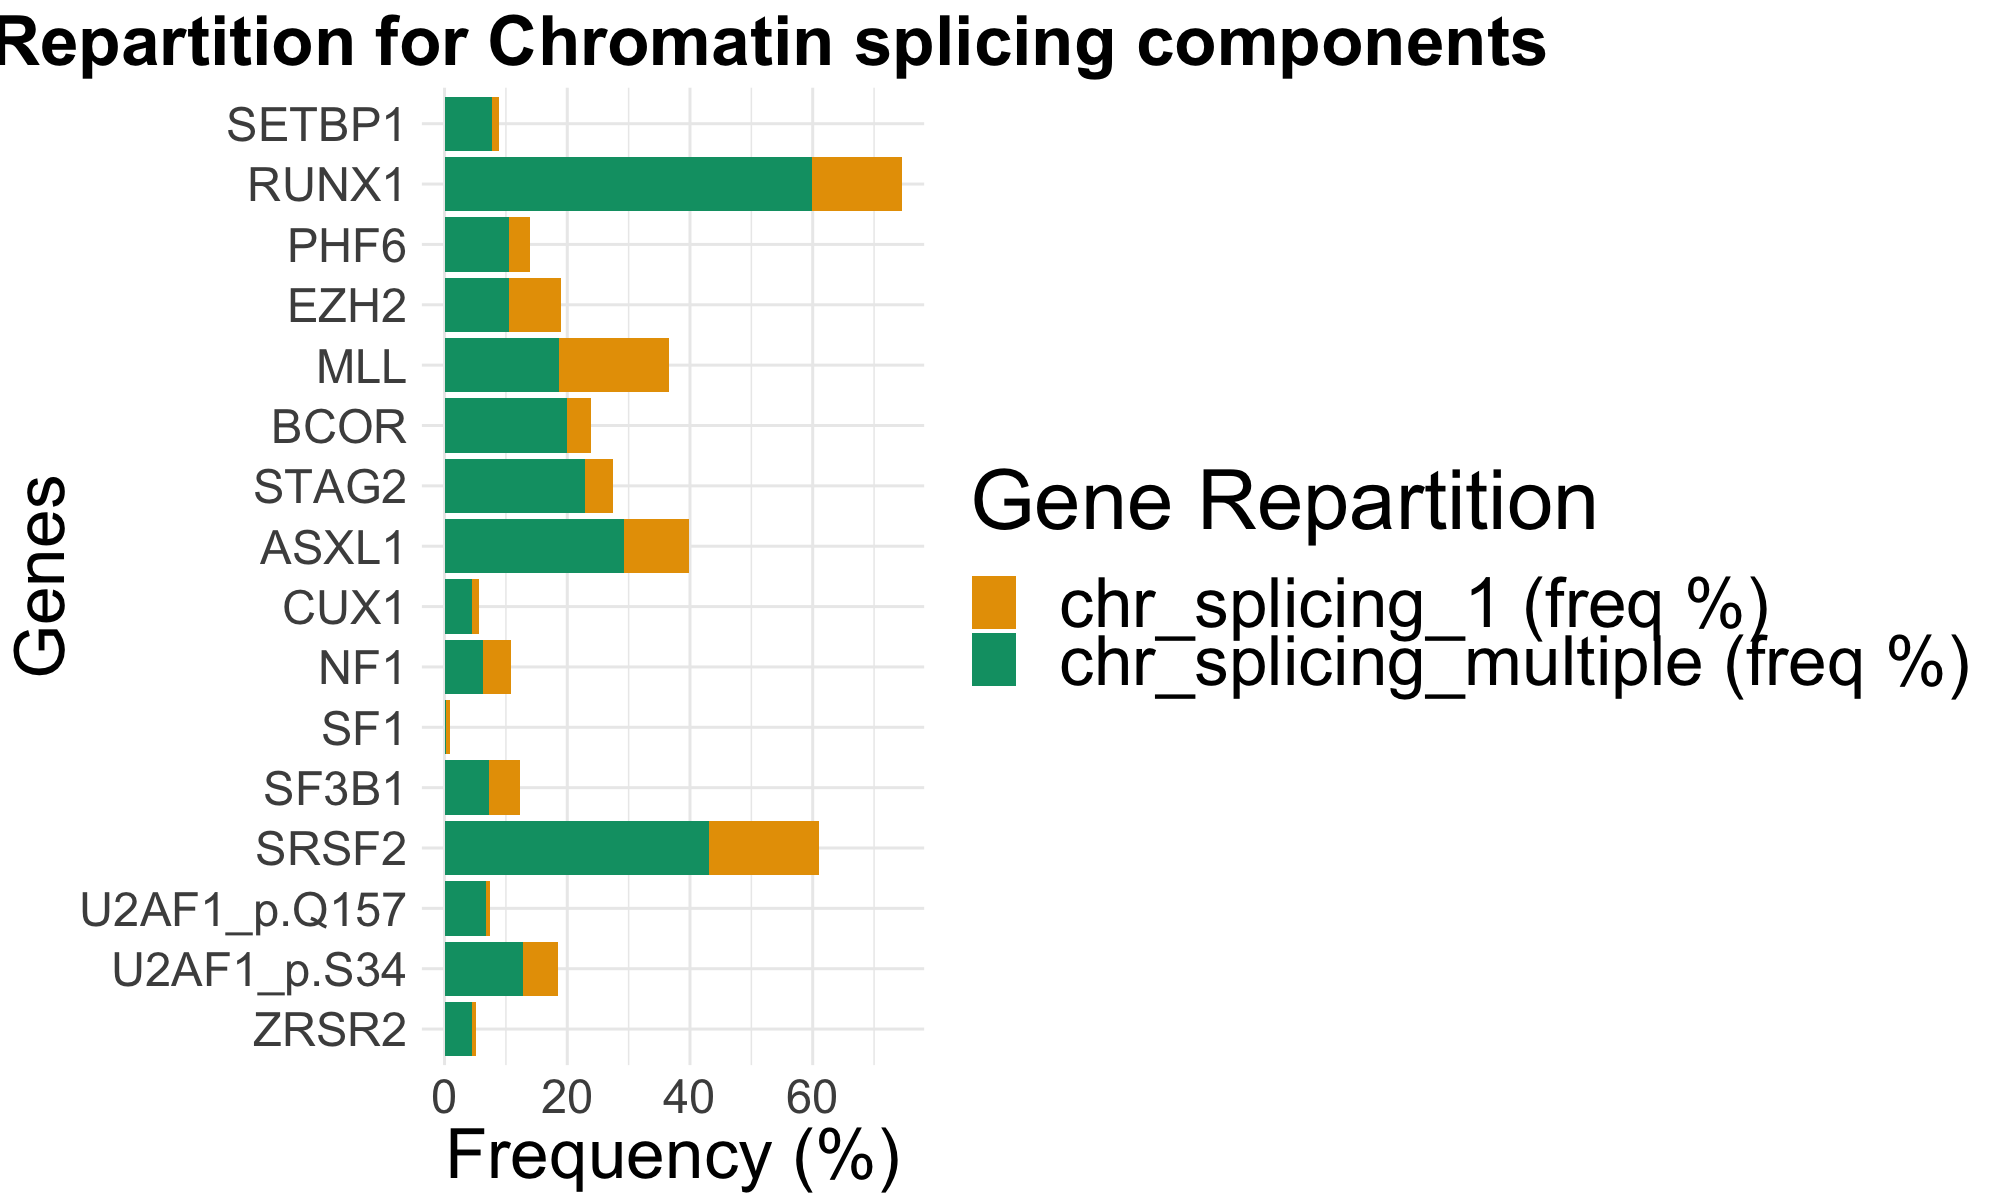

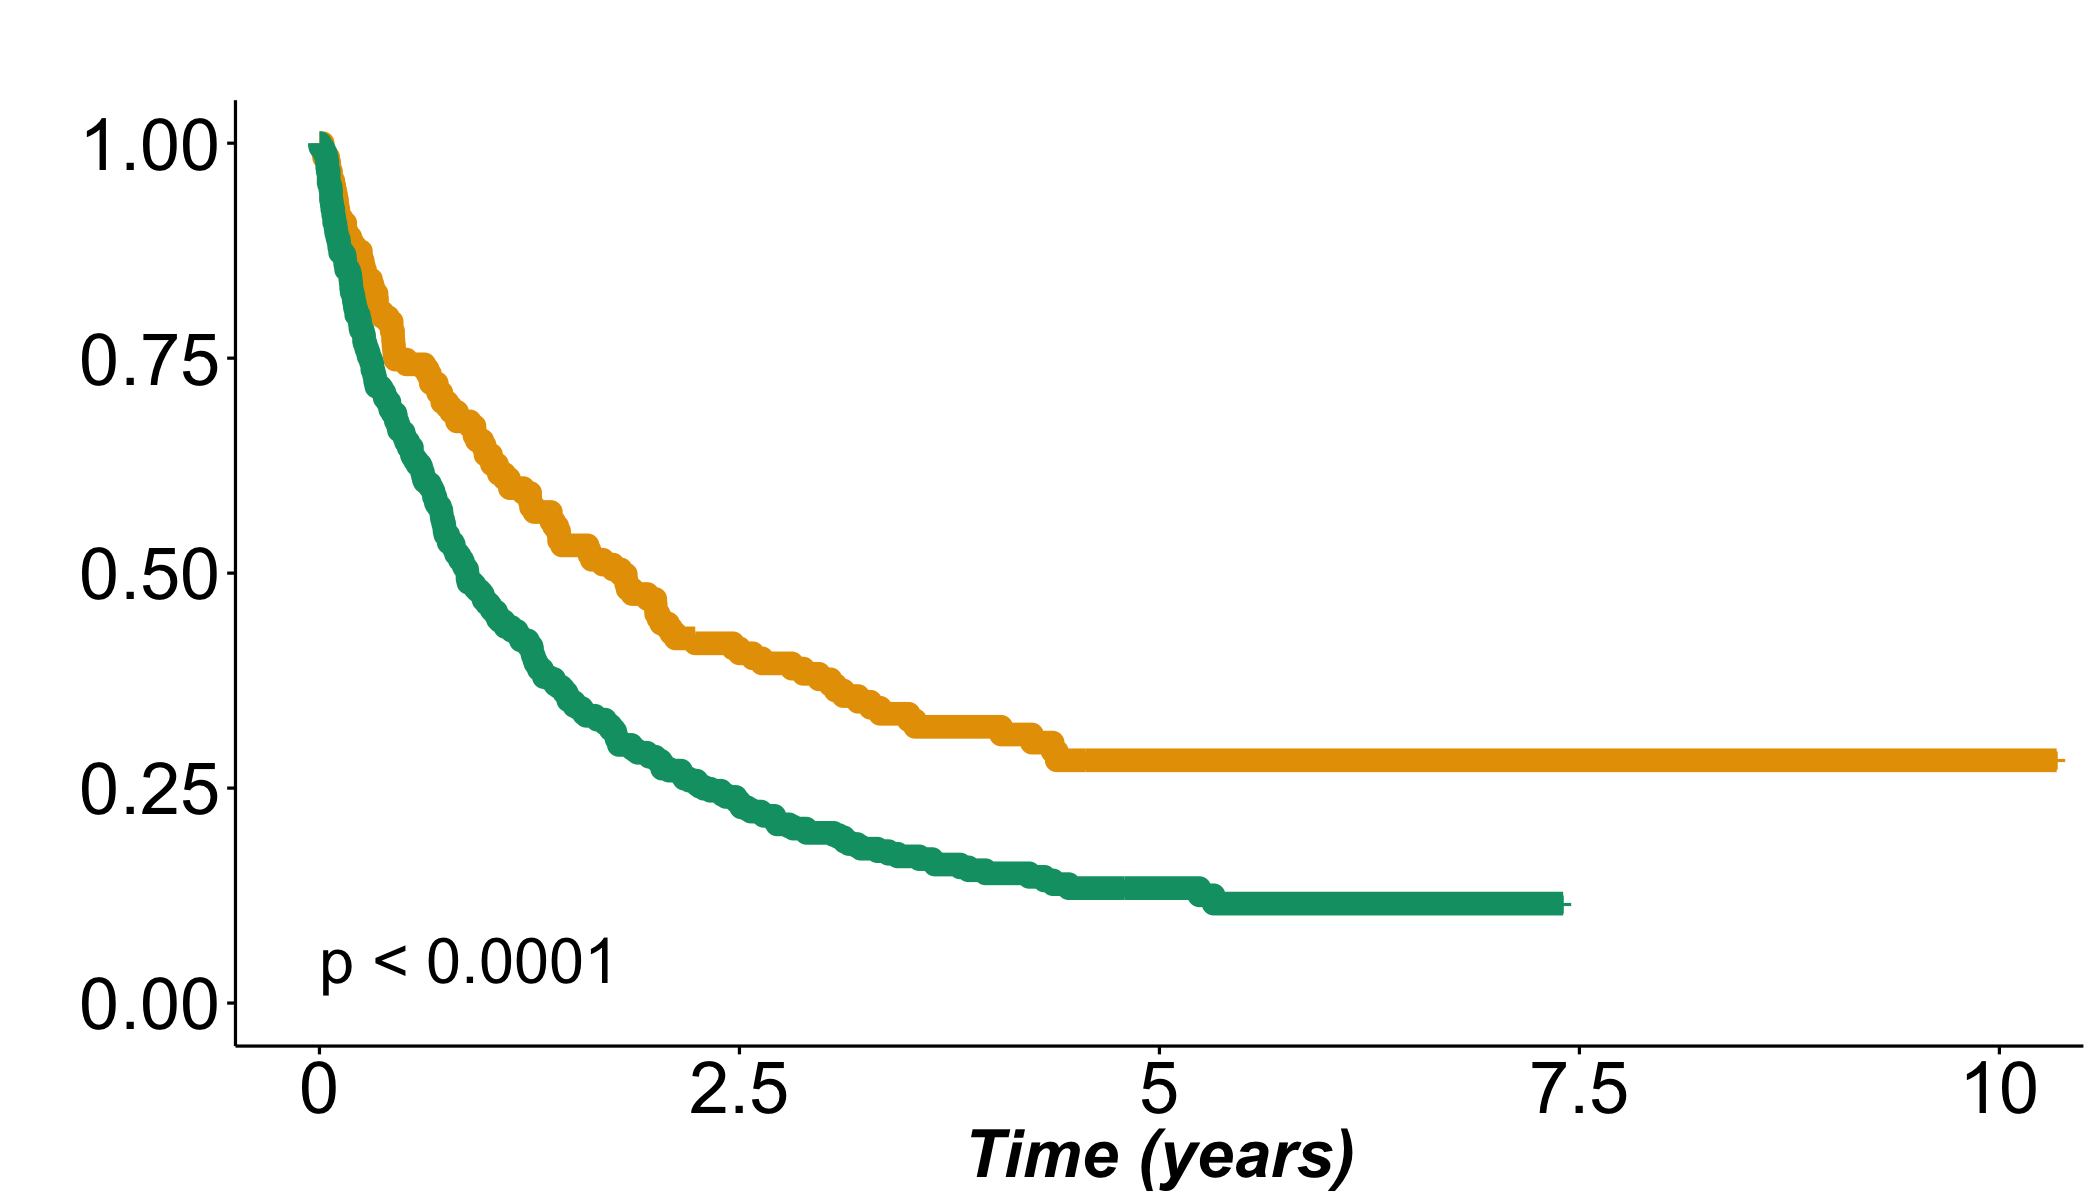

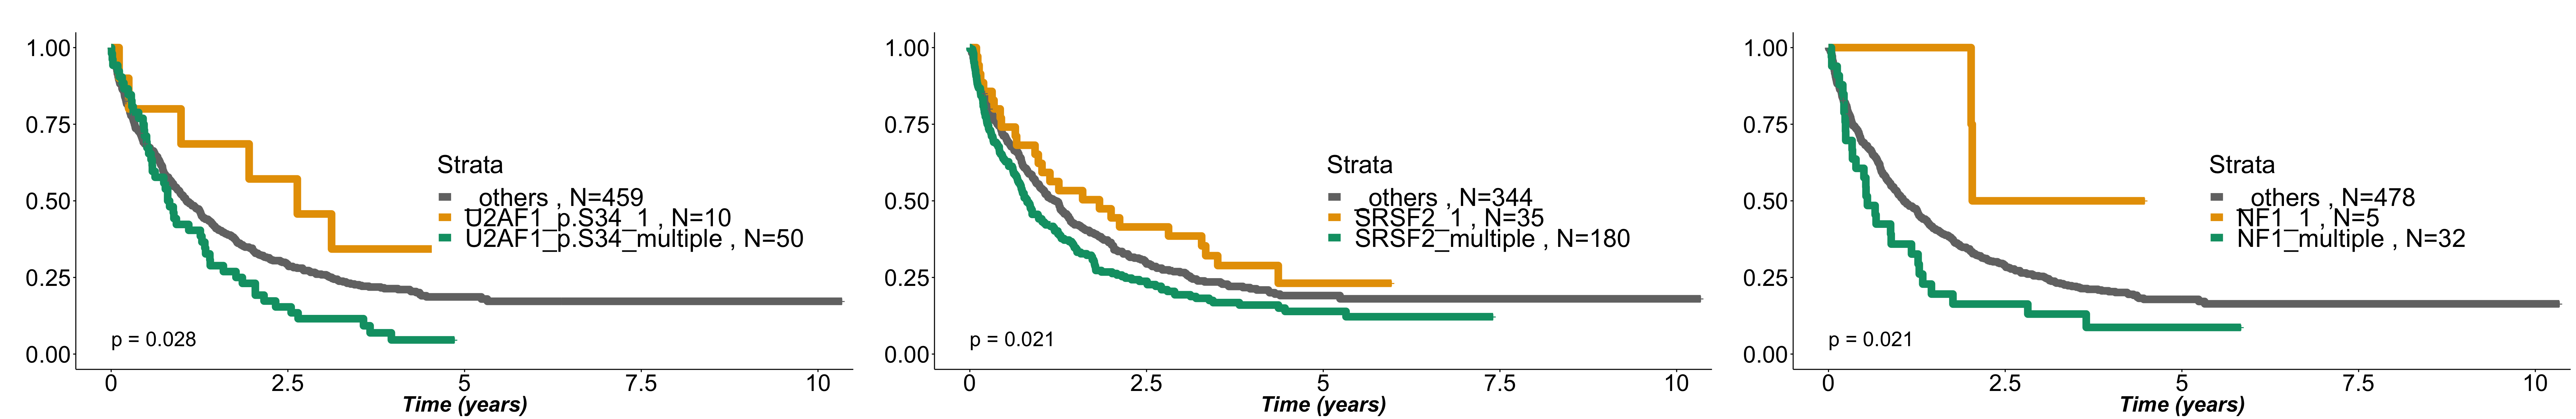

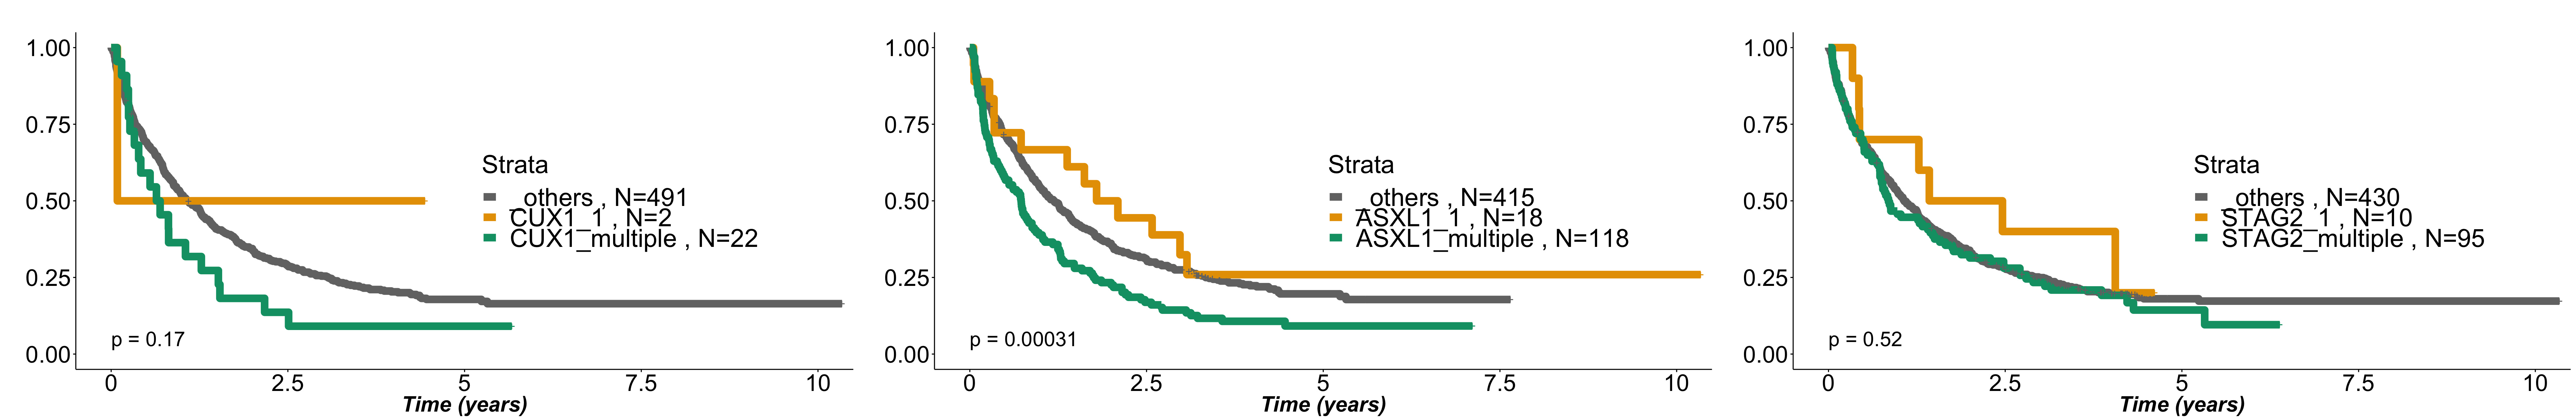

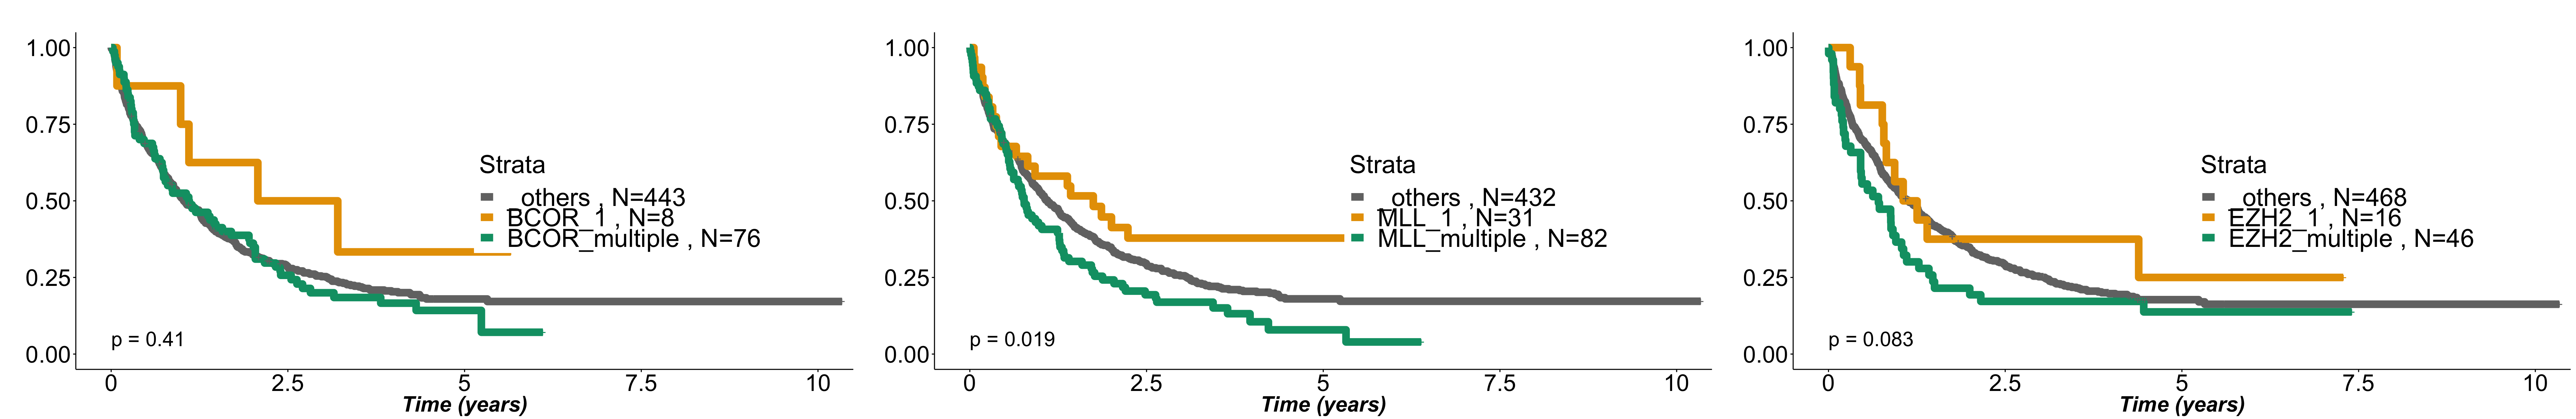

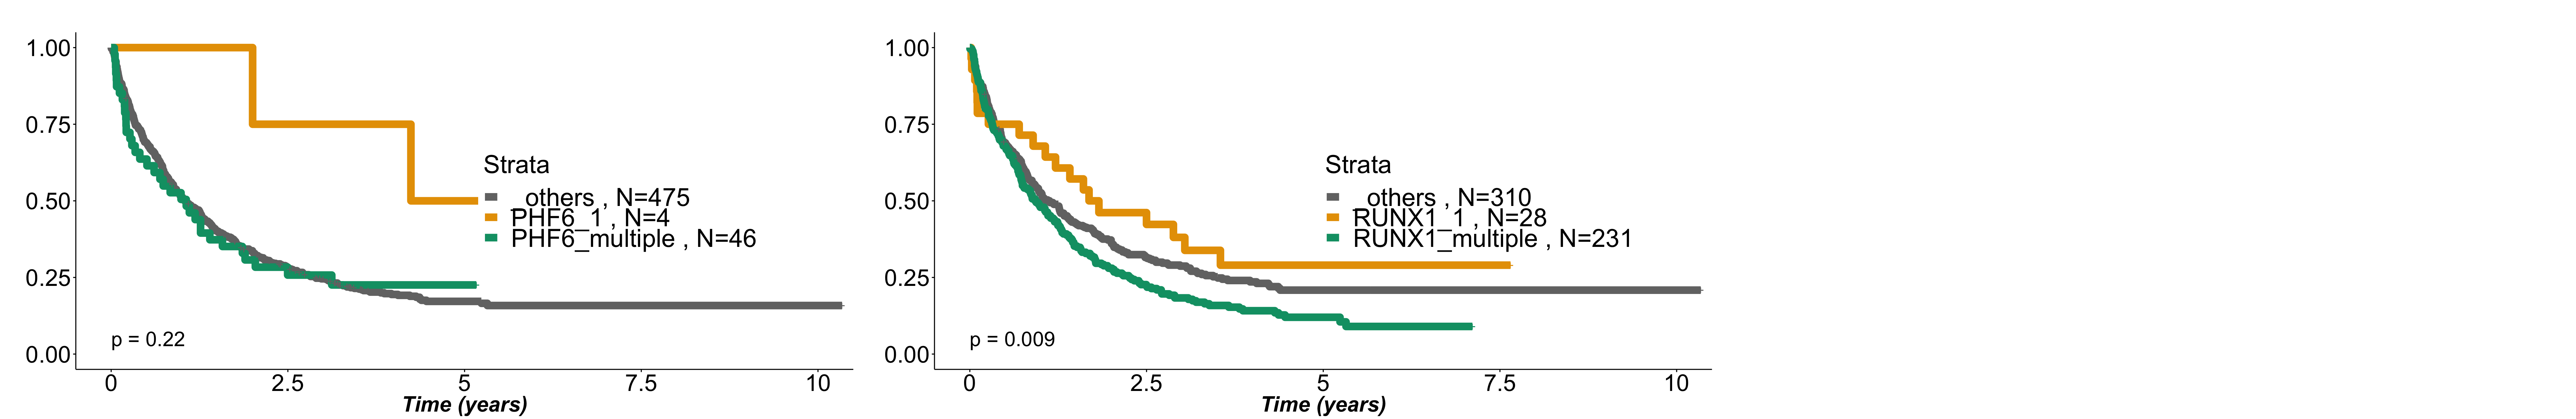

In [58]:
source("tools.R")
splicing <-  c("ZRSR2", "U2AF1_p.S34","U2AF1_p.Q157", "SRSF2", "SF3B1", "SF1", "NF1", "CUX1")
chromatin <- c("ASXL1", "STAG2", "BCOR", "MLL", "EZH2", "PHF6")
transcriptor <- c("RUNX1","SETBP1") 
factors <- c(splicing,chromatin,transcriptor)
# png("chr1_mult_repartition.png",width=2000,height=1000,res=100)
tmp_ana <- data.frame(rbind(t(100*colSums(df_w_correlates[df_w_correlates$final_component=="chr_splicing_1",factors])/dim(df_w_correlates[df_w_correlates$final_component=="chr_splicing_1",])[1]),
                            t(100*colSums(df_w_correlates[df_w_correlates$final_component=="chr_splicing_multiple",factors])/dim(df_w_correlates[df_w_correlates$final_component=="chr_splicing_multiple",])[1])))
tmp_ana$comp <- c("chr_splicing_1 (freq %)","chr_splicing_multiple (freq %)")
set_notebook_plot_size(10,6)
d <- melt(tmp_ana,id.vars = "comp")
ggplot(d,aes(x = variable,y = value,fill=comp)) + 
geom_bar(aes(fill = comp),stat = "identity") +scale_fill_manual(values=c("#e79f00", "#009E73"))+
scale_y_continuous(breaks = function(x) unique(floor(pretty(seq(0, (max(x) + 1) * 1.1)))))+
labs(fill='Gene Repartition') +ggtitle("Gene Repartition for Chromatin splicing components")+
theme(axis.text.x=element_text(size=17),axis.title.x = element_text(size=25),axis.text.y=element_text(size=17),axis.title.y = element_text(size=25),legend.text = element_text(size=25),legend.title = element_text(size=30),
      plot.title = element_text(size=25,face="bold",hjust=0.5))+coord_flip()+
                   ylab("Frequency (%)")+xlab("Genes")
# dev.off()
                   
# png("chr1_mult_surv.png",width=2000,height=1000,res=100)
tmp <- df_w_correlates[(df_w_correlates$full_component_chr_splicing_1==1) | (df_w_correlates$full_component_chr_splicing_multiple==1),]
tmp$comparison <- ifelse(tmp$full_component_chr_splicing_1==1 , "chr_splicing_1","chr_splicing_multiple")
surv_object <- Surv(time = tmp$os, event = tmp$os_status)
fit <- survfit(surv_object ~ comparison, data = tmp)
set_notebook_plot_size(10.5,6)
plot_surv_curves(fit,legend="none",vals=c("#e79f00", "#009E73"))#,title = "Stratification by number of factors")
# dev.off()
     
# png("chr1_mult_genes.png",width=4000,height=2500,res=200)                   
set_notebook_plot_size(40,6.5)
tmp <- df_w_correlates[(df_w_correlates$full_component_chr_splicing_1==1) | (df_w_correlates$full_component_chr_splicing_multiple==1),]
tmp$comparison <- 0
survlist <- list()
for (fac in factors[c(2,4,7,8,9:15)]){    
    tmp$comparison <- ifelse(tmp[,fac]==1 & tmp$full_component_chr_splicing_1==1 ,paste(fac,"1",sep="_"),
                             ifelse(tmp[,fac]==1 & tmp$full_component_chr_splicing_multiple==1 ,paste(fac,"multiple",sep="_"),"_others"))
    surv_object <- Surv(time = tmp$os, event = tmp$os_status)
    fit <- survfit(surv_object ~ comparison, data = tmp)
    survlist[[fac]] <- plot_surv_curves(fit,legend=c(0.7,0.5),vals=c("grey45", "#e79f00", "#009E73"))
}

arrange_ggsurvplots(survlist,ncol=3)
# dev.off()

# ZOOM TP53 COMPLEX

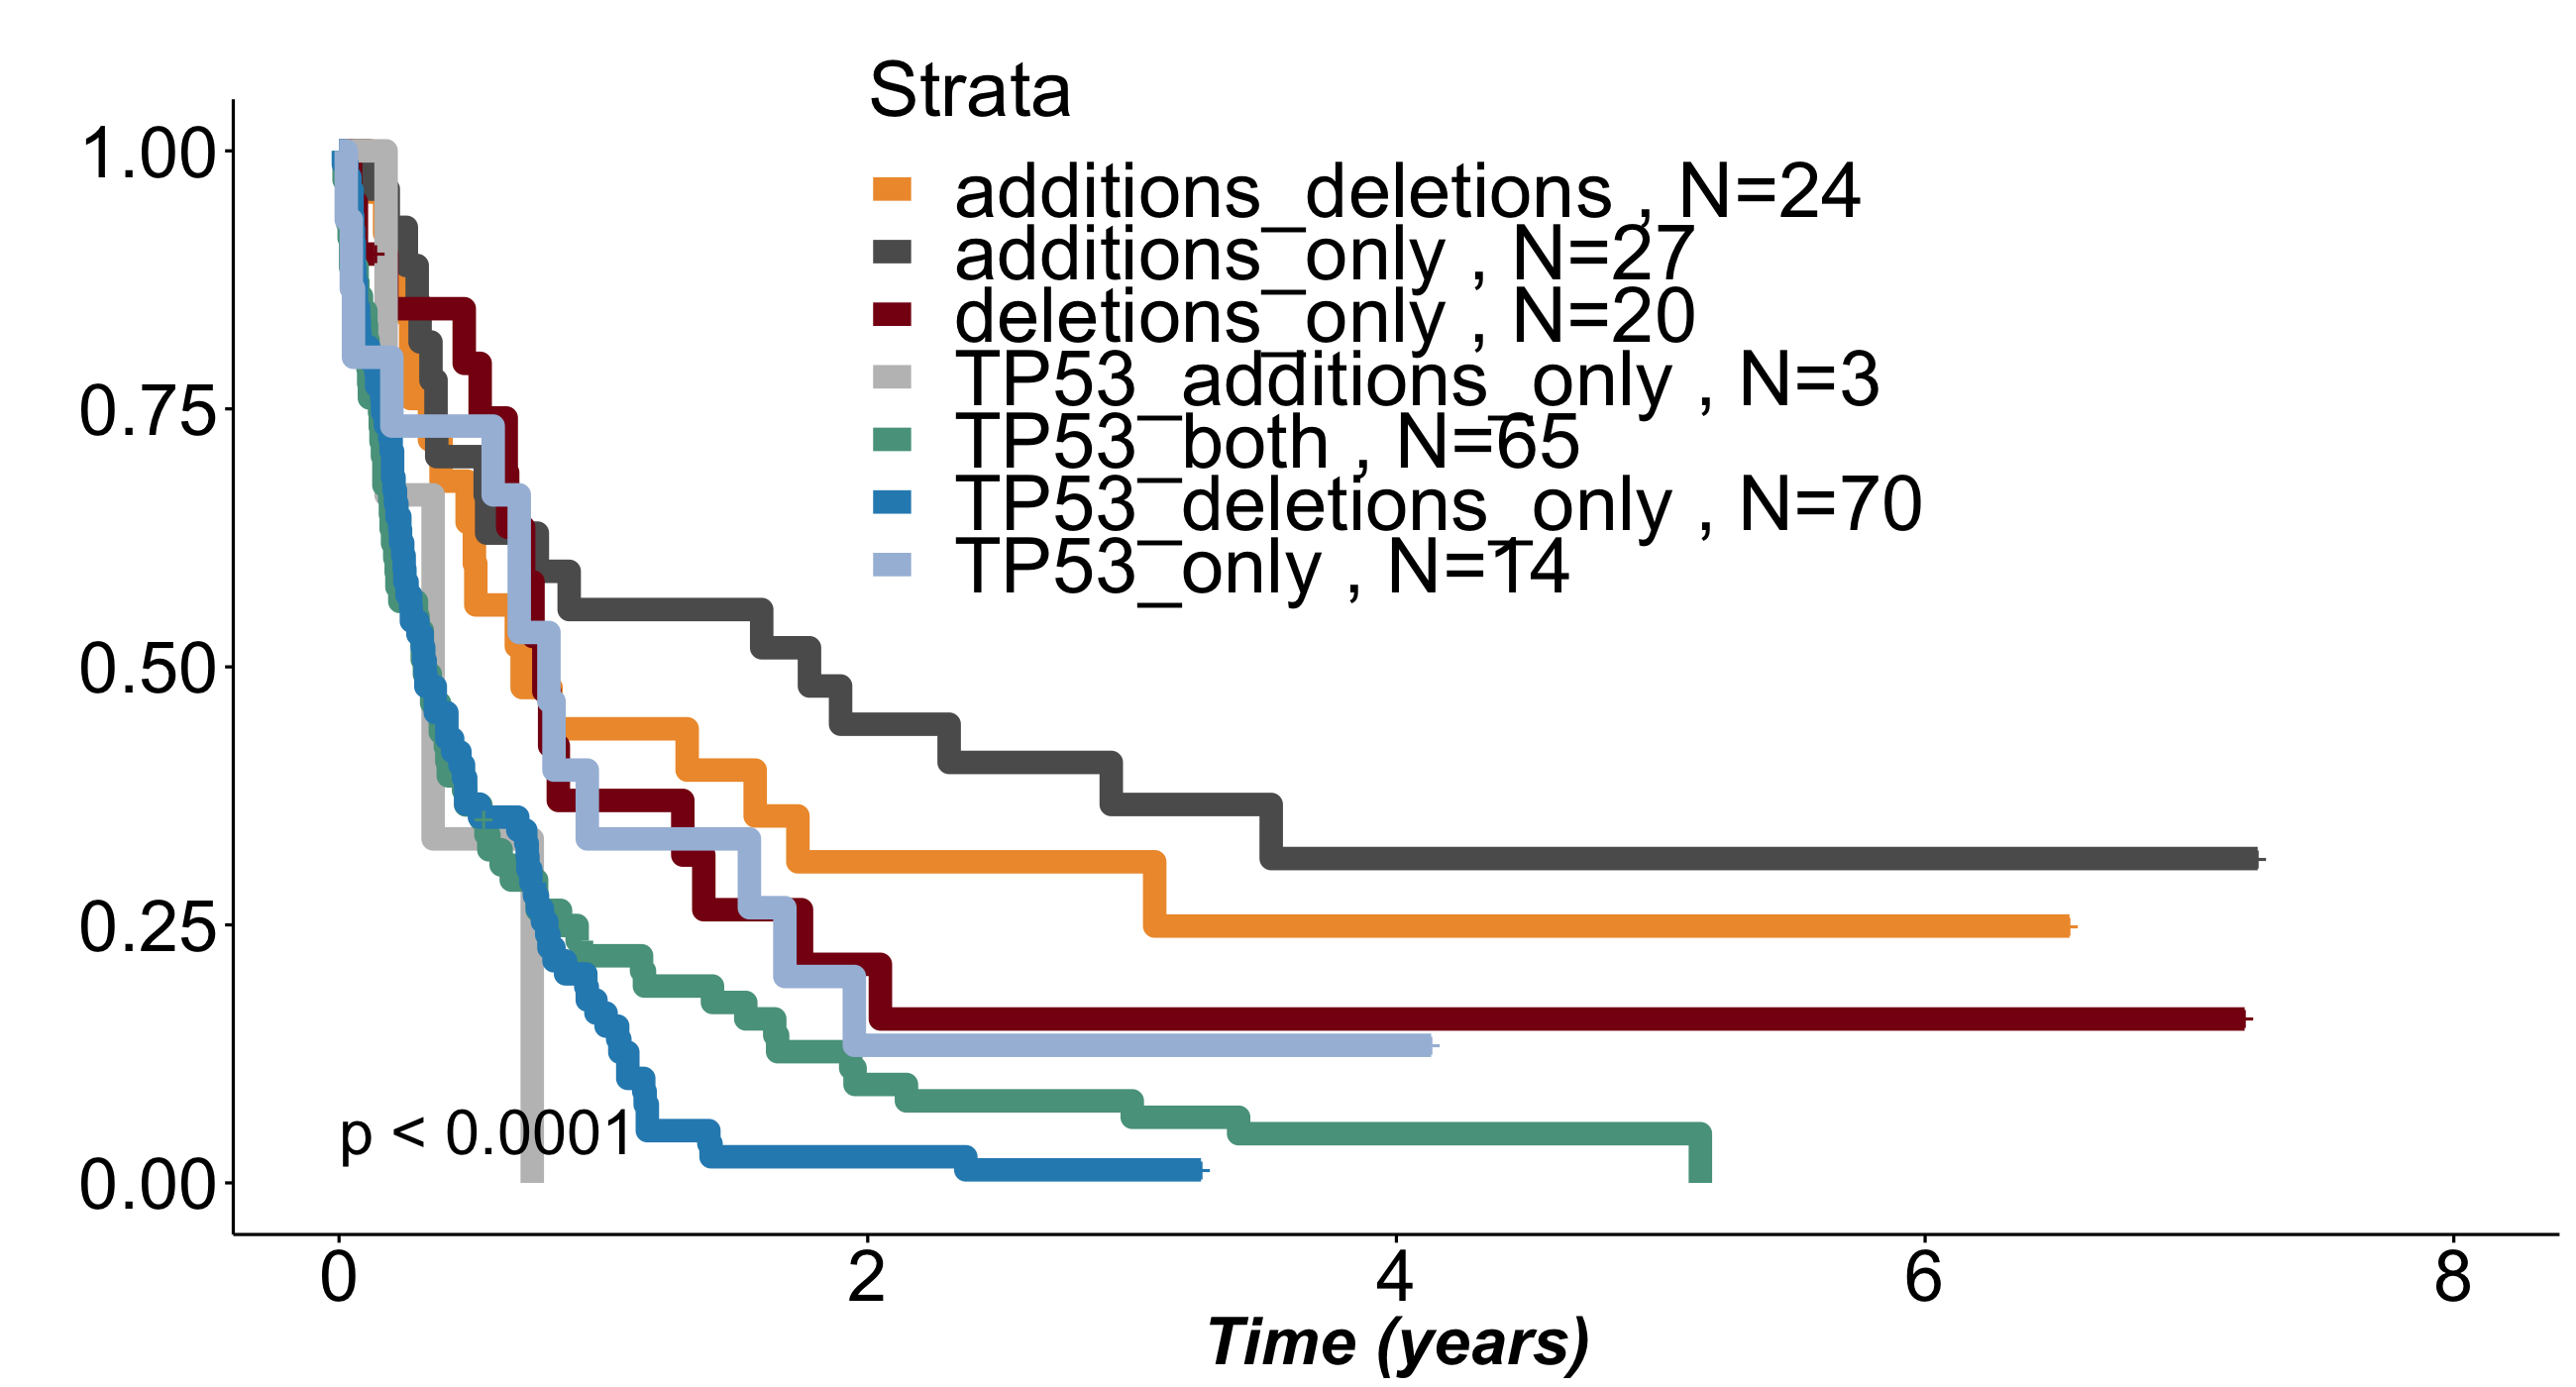

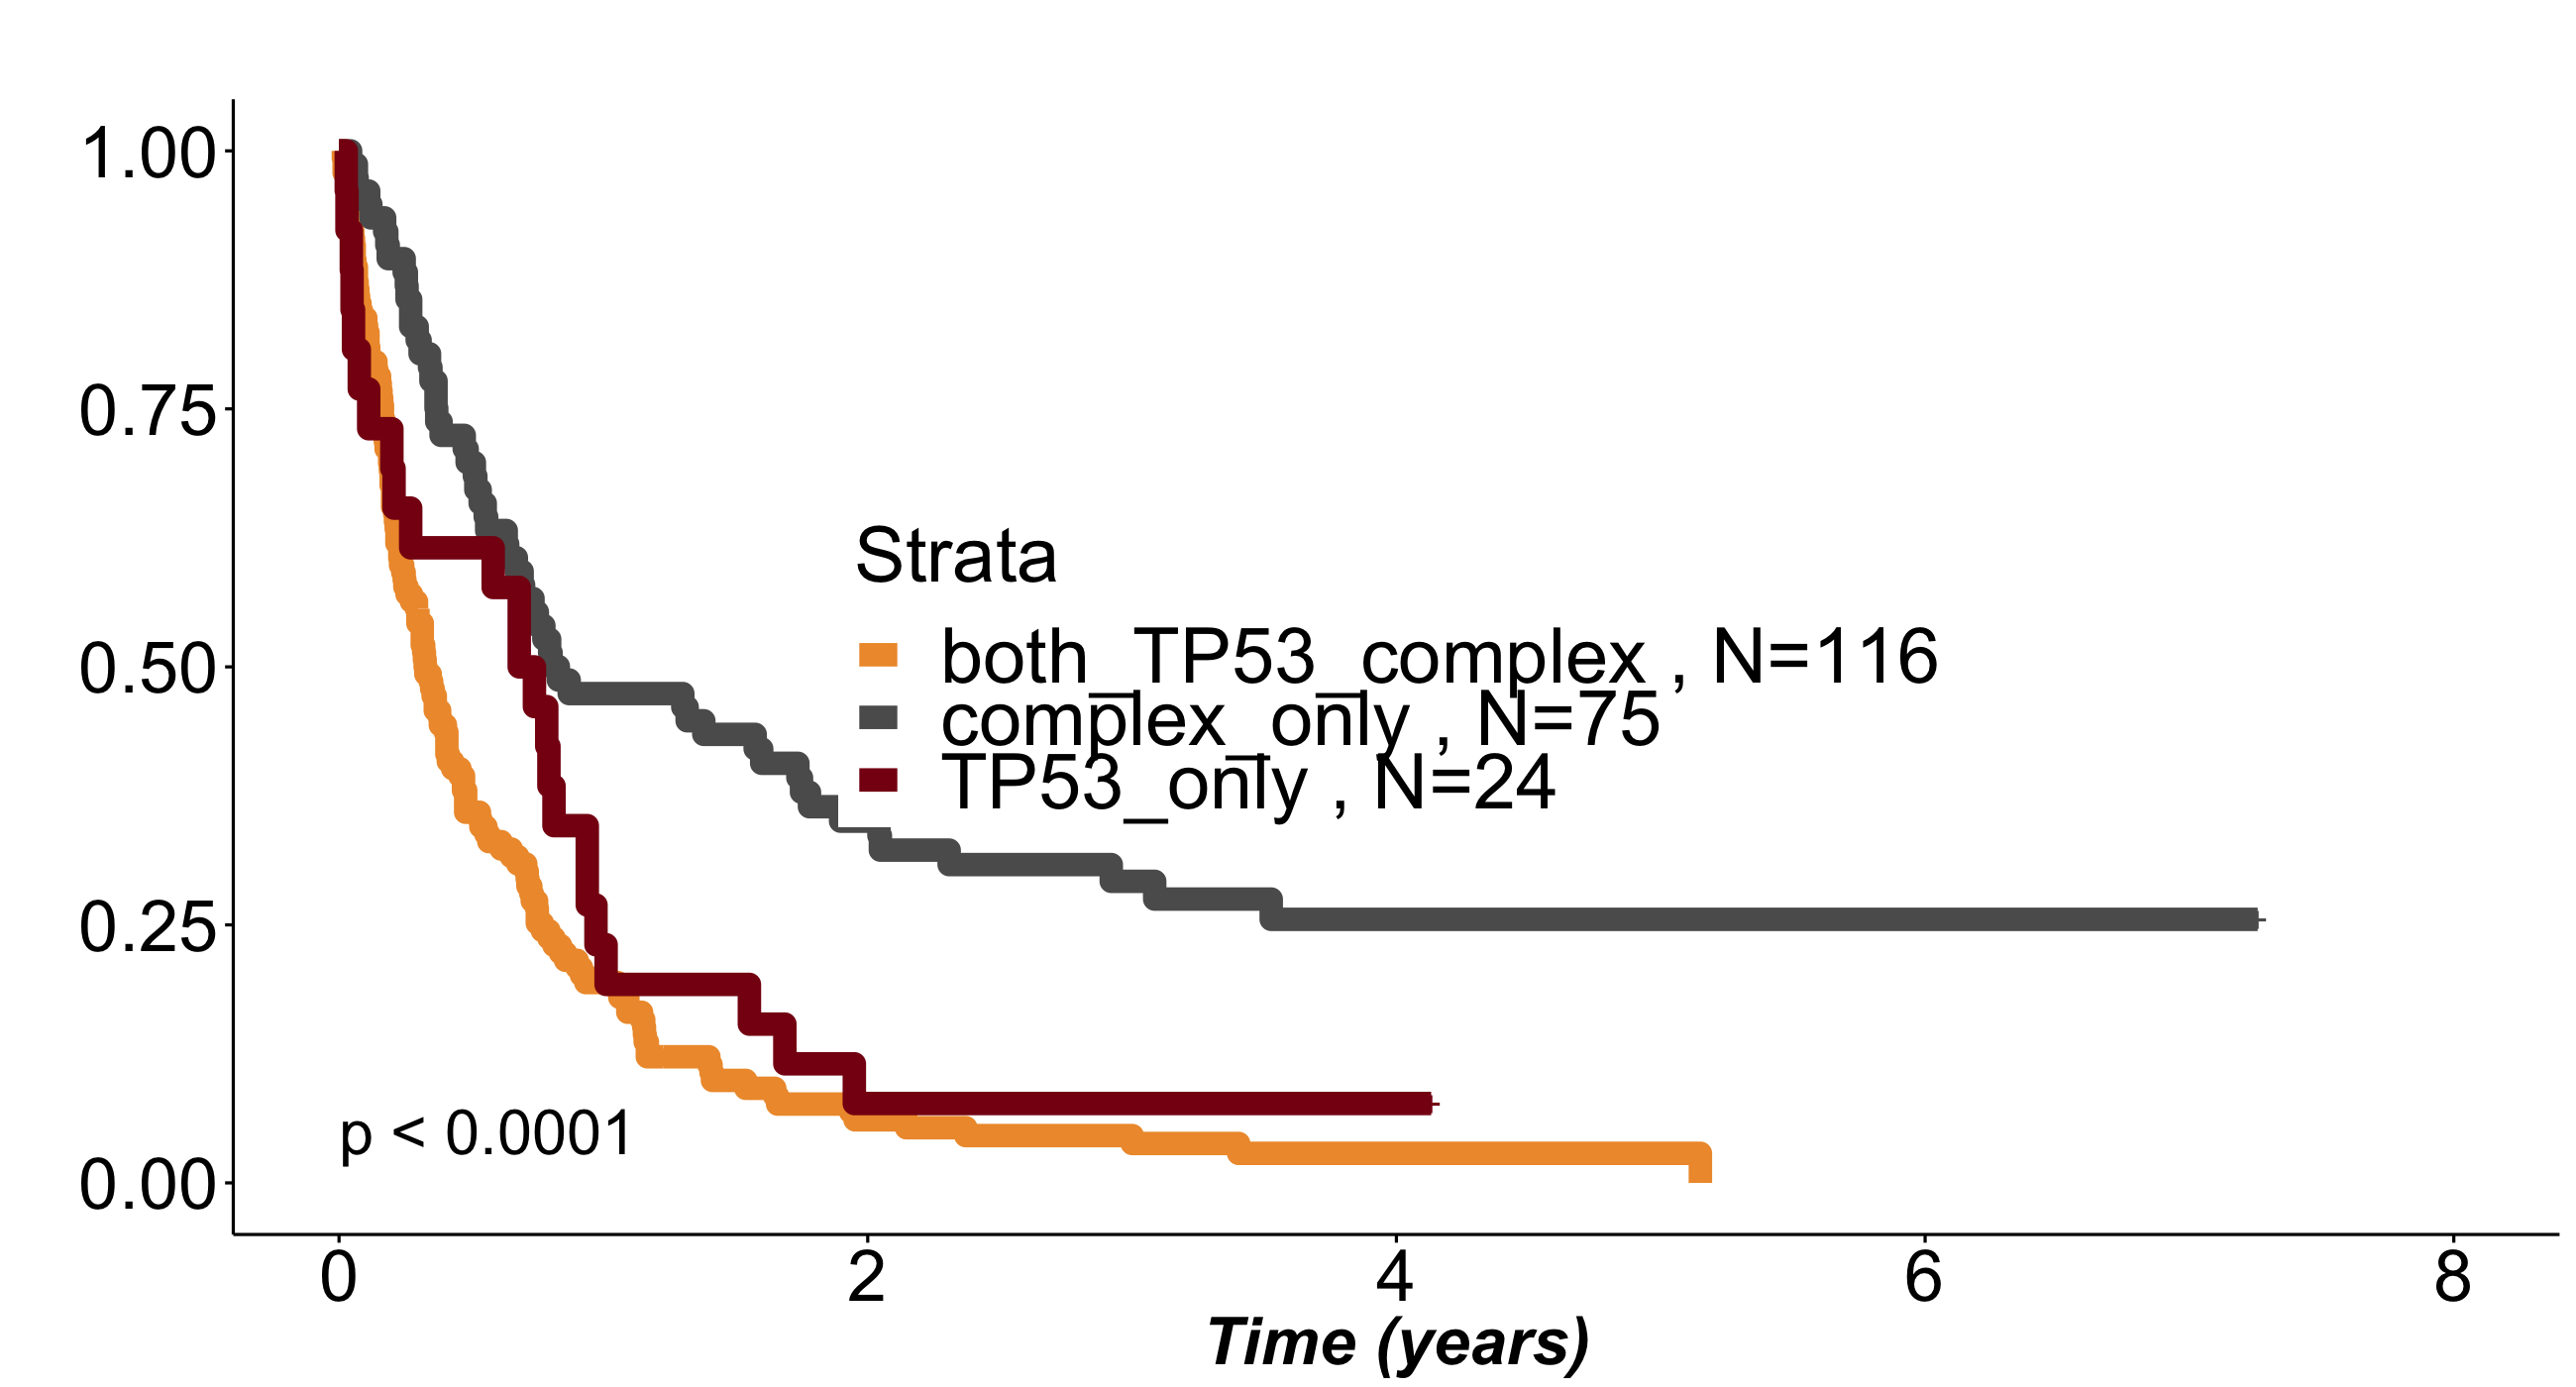

In [62]:
# png("tp53_digging_surv.png",width=2000,height=1200,res=120)
tmp <- read.table("../clustering/clustering_Final_1/df_final_multiple_comp_overlap_comp.tsv")
df_initial <- read.table("../../data/initial_dataset/Master_04_10_2019.csv",sep = ',' , header = T) 
rownames(df_initial) <- df_initial$data_pd
df_initial <- df_initial[,-1:-4]
tmp <- merge(df_initial[c("os","os_status")],tmp,by=0)
rownames(tmp) <- tmp$Row.names
tmp <- tmp [,-1]
tmp <- tmp %>% filter(os > 0)
tmp <- tmp[tmp$comp_TP53_complex==1,]
tmp$comparison <- "TP53_only"
tmp$comparison <- ifelse((tmp$del_5+tmp$del_7+tmp$del_17+tmp$del_9+tmp$del_13+tmp$del_20+tmp$del_18+tmp$del_16+tmp$del_12+tmp$del_3==0) & tmp$TP53==1 & tmp$comp_additions==1  , "TP53_additions_only",
                         ifelse((tmp$del_5+tmp$del_7+tmp$del_17+tmp$del_9+tmp$del_13+tmp$del_20+tmp$del_18+tmp$del_16+tmp$del_12+tmp$del_3>0) & tmp$TP53==1 & tmp$comp_additions==0 , "TP53_deletions_only",
                               ifelse((tmp$del_5+tmp$del_7+tmp$del_17+tmp$del_9+tmp$del_13+tmp$del_20+tmp$del_18+tmp$del_16+tmp$del_12+tmp$del_3>0) & tmp$TP53==1 & tmp$comp_additions==1 , "TP53_both",
                                      ifelse(tmp$TP53==1 & tmp$complex==0,"TP53_only",
                                             ifelse((tmp$del_5+tmp$del_7+tmp$del_17+tmp$del_9+tmp$del_13+tmp$del_20+tmp$del_18+tmp$del_16+tmp$del_12+tmp$del_3==0) & tmp$comp_additions==1  , "additions_only",
                                                    ifelse((tmp$del_5+tmp$del_7+tmp$del_17+tmp$del_9+tmp$del_13+tmp$del_20+tmp$del_18+tmp$del_16+tmp$del_12+tmp$del_3>0) & tmp$comp_additions==0  , "deletions_only",
                                                           ifelse((tmp$del_5+tmp$del_7+tmp$del_17+tmp$del_9+tmp$del_13+tmp$del_20+tmp$del_18+tmp$del_16+tmp$del_12+tmp$del_3>0) & tmp$comp_additions==1  , "additions_deletions","others")))))))
tmp <- tmp[tmp$comparison!="others",]
#                                      ifelse((tmp$del_5+tmp$del_7+tmp$del_17+tmp$del_9+tmp$del_13+tmp$del_20+tmp$del_18+tmp$del_16+tmp$del_12+tmp$del_3==0) & tmp$TP53==1 & tmp$comp_additions==0 & tmp$complex==1, "TP53_complex",
#                                            ifelse((tmp$del_5+tmp$del_7+tmp$del_17+tmp$del_9+tmp$del_13+tmp$del_20+tmp$del_18+tmp$del_16+tmp$del_12+tmp$del_3>0) & tmp$TP53==0 & tmp$comp_additions==0 , "deletions_only",
#                                                 ifelse((tmp$del_5+tmp$del_7+tmp$del_17+tmp$del_9+tmp$del_13+tmp$del_20+tmp$del_18+tmp$del_16+tmp$del_12+tmp$del_3==0) & tmp$TP53==0 & tmp$comp_additions==1 , "additions_only", 
#                                                        ifelse((tmp$del_5+tmp$del_7+tmp$del_17+tmp$del_9+tmp$del_13+tmp$del_20+tmp$del_18+tmp$del_16+tmp$del_12+tmp$del_3==0) & tmp$TP53==0 & tmp$comp_additions==0 & tmp$complex==1, "complex_only","others")))))))
surv_object <- Surv(time = tmp$os, event = tmp$os_status)
fit <- survfit(surv_object ~ comparison, data = tmp)
set_notebook_plot_size(13,7)
plot_surv_curves(fit,legend=c(0.5,0.8))
# dev.off()
# png("tp53_complex_surv.png",width=2000,height=1200,res=120)
tmp <- df_w_correlates[df_w_correlates$full_component_TP53_complex==1,]
tmp$comparison <- ifelse(tmp$TP53==1 & tmp$complex==1,"both_TP53_complex",
                         ifelse(tmp$TP53==1,"TP53_only",
                             ifelse(tmp$complex==1,"complex_only","pb")))

surv_object <- Surv(time = tmp$os, event = tmp$os_status)
fit <- survfit(surv_object ~ comparison, data = tmp)
plot_surv_curves(fit,legend=c(0.5,0.5))
# dev.off()

# UNIQUE GENOTYPE

In [ ]:
source('tools.R')
unique_genotypes(df_final,features=c(genes,cytos),top=20)

tmp <- df_final[,c(genes,cytos)]

dfgoal <- cbind.data.frame(tmp,overall = apply(tmp, 1, function(x)paste(colnames(tmp)[x[1:length(x)] == 1], collapse = ", ")))
                                               
levels(dfgoal$overall)[levels(dfgoal$overall) == ""] <- "no events"
                                               
# png("unique_genotypes.png",width=4500,height=2500,res=200)
                                               
datagoal <- data.frame(table(dfgoal$overall))    
datagoal <-datagoal[order(datagoal$Freq,decreasing=T),]                                               
ggplot(datagoal[1:20,],aes(x=reorder(Var1,Freq),y=Freq))+geom_bar(stat="identity")+coord_flip()+
theme(plot.title = element_text(hjust = 0.5,size=25),axis.text=element_text(size=22),axis.title=element_text(size=34,face="bold"),
legend.position="none")+xlab("Top 20 Unique genotypes") + ylab("Number of Patients")
                                               
# dev.off()


# SHIFT RISK DENSITY

In [5]:
full_components <- colnames(df_final %>% dplyr:: select(starts_with("full_component")))
tmp <- NULL
for (comp in c(full_components)){
    tmp1 <- df_w_correlates[df_w_correlates[,comp]==1,]
    tmp1$comparison <- str_remove(comp,"full_component_")
    tmp <- rbind(tmp,tmp1)
    }
tmp$fill_pal <- factor(tmp$comparison)
color_values <- c("grey45", "#e79f00", "#009E73","#0072B2",  "#CC79A7","#9ad0f3", "#D55E00", "lightgoldenrod","lightskyblue","#F0E442",
                  "firebrick3","#000000","#870C14","#a6bddb","mistyrose4","#fdbb84","gray","deeppink","darkblue","darkred","darkgreen",
                  "purple","forestgreen")
names(color_values) <- levels(factor(tmp$fill_pal))
color_values["overlap"] <- "purple"

In [ ]:
shift_density(df_final,cols_component)
tmp_final <- read.table("../clustering/clustering_Final_1/df_final_full_component.tsv")
df <- data.frame(mean_survival = double() )
for (co in colnames(tmp_final[,c(170:185)])){
    df[co,] <- mean(tmp_final[tmp_final[,co]==1,]$os)
    df[co,"name"] <- co
}
components_ordered <- df[order(df$mean_survival,decreasing=T),]$name

set_notebook_plot_size(20,100)
i <- 1
p <- list()
# png(file="density_plots.png",width=4500,height=5000)
for (co in c('eln_2017_favorable','eln_2017_intermediate','eln_2017_adverse',components_ordered)){
    if (is.element(co,c("full_component_t_8_21","full_component_t_6_9","full_component_NPM1","full_component_CEBPA_bi","full_component_DNMT3A_IDH1_2","full_component_WT1","full_component_not_assigned"))){    
        tmp <- tmp_final[tmp_final[,co]==1 &  tmp_final$ITD==0,]
        fit <- kphaz.fit(tmp$os,tmp$os_status,q=1,method="nelson")
        df <- fit%>%
        as.data.frame()
        df[,"category"] <- co
        tmp <- tmp_final[tmp_final[,co]==1 &  tmp_final$ITD==1,]
        fit <- kphaz.fit(tmp$os,tmp$os_status,q=1,method="nelson")
        df1 <- fit%>%
        as.data.frame()
        df1[,"category"] <- paste(co,"ITD",sep="_")        
        df <- rbind(df,df1)

     }else{
        tmp <- tmp_final[tmp_final[,co]==1 ,]
        fit <- kphaz.fit(tmp$os,tmp$os_status,q=1,method="nelson")
        df <- fit%>%
        as.data.frame()
        df[,"category"] <- co
        }   
    p[[i]] <- ggplot(df, aes(x=log(haz,10),color=category,fill=category)) + 
  geom_density(aes(y=..count..),alpha=1)+guides(fill=FALSE)+guides(fill=F,color=F)+ggtitle(co)+xlim(c(-2,1)) +theme(plot.title = element_text(hjust = 0.5,size=65),axis.text=element_text(size=45,face='bold'),
        axis.title=element_text(size=45,face="bold"))
    if(co=="eln_2017_favorable"){
        p[[i]] <- (p[[i]]+ scale_fill_manual(values=c("#2b8cbe")))
    }
    if(co=="eln_2017_intermediate"){
        p[[i]] <- (p[[i]]+ scale_fill_manual(values=c("#59A08B")))
    }
    if(co=="eln_2017_adverse"){
        p[[i]] <- (p[[i]]+ scale_fill_manual(values=c("#EE9937")))}
    if(is.element(co,components_ordered)){
        p[[i]] <- (p[[i]]    + scale_fill_manual(values=c(color_values[[str_remove(co,"full_component_")]],"pink","#a6bddb","pink","#fdbb84")))
                   #+ scale_fill_manual(values=c("#870C14","#a6bddb","#a6bddb","pink","#fdbb84")))
        }
    i <- i+1
#     grid.arrange(p[1],p[2],nrow=2)
    }
grid.arrange(p[[1]],p[[2]],p[[3]],p[[4]],p[[5]],p[[6]],p[[7]],p[[8]],p[[9]],p[[10]],p[[11]],p[[12]],p[[13]],p[[14]],p[[15]],p[[16]],p[[17]],p[[18]],p[[19]],nrow=19)
# dev.off()

# COMPONENT GENE AND CYTO FREQUENCY

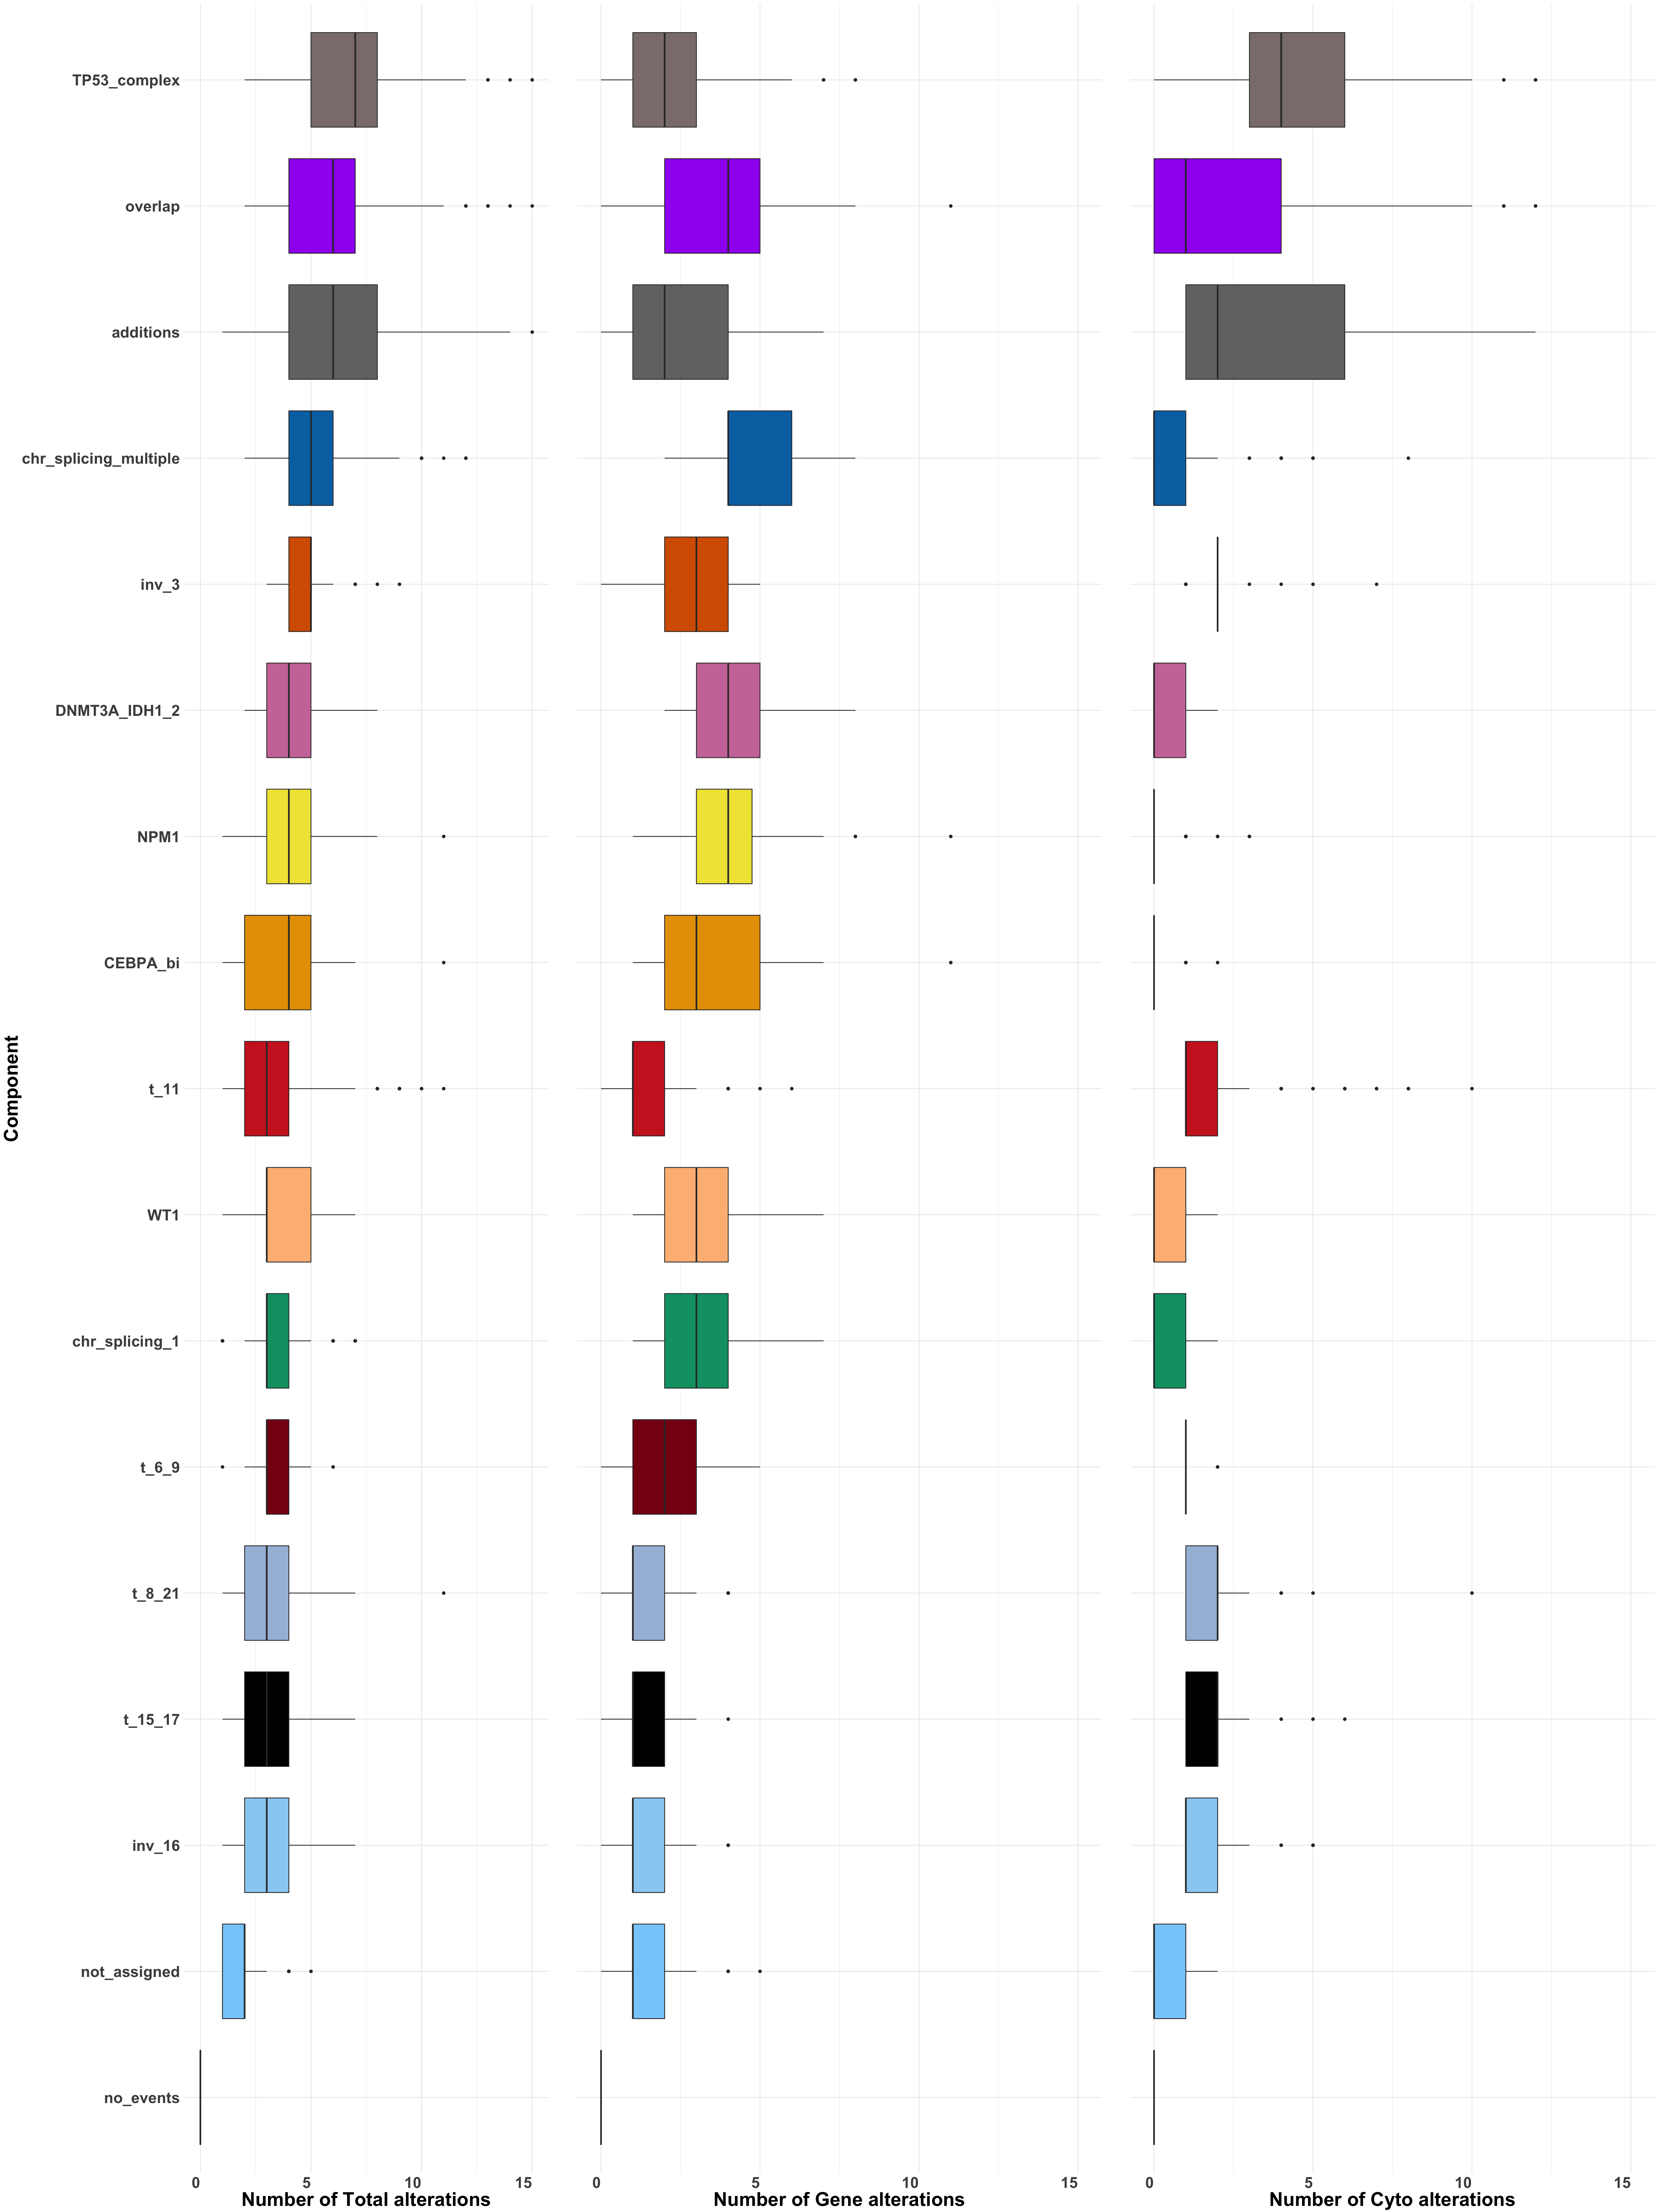

In [110]:
source('tools.R')
num_events_comp(df_final,cols_component=c(colnames(df_final %>% dplyr:: select(starts_with("full_component_"))),"overlap"))
cols_component <- colnames(df_final %>% dplyr:: select(starts_with("full_component_")))

tmp <- NULL
for (co in c(cols_component,"overlap")){
    tmp1 <- df_w_correlates[df_w_correlates[,co]==1,]
    tmp1$comparison <- str_replace(co,"full_component_","")
    tmp <- rbind(tmp,tmp1)
    }
tmp$genes <- rowSums(tmp[,c(genes)])
tmp$cytos <- rowSums(tmp[,c(cyto)])
tmp$total <- rowSums(tmp[,c(genes,cyto)])
p <- ggplot(tmp, aes(x=reorder(comparison,total), y=total,fill=comparison)) + 
  geom_boxplot()+coord_flip()+scale_fill_manual(values=color_values)+xlab("Component")+ylab("Number of Total alterations")+
theme(axis.title = element_text(hjust = 0.5,size=25,face="bold"),axis.text.x = element_text( hjust = 1, size=20,face="bold"),axis.text.y = element_text(size=20,face="bold"))+guides(fill=F)+ylim(c(0,15))

q <- ggplot(tmp, aes(x=reorder(comparison,total), y=genes,fill=comparison)) + 
  geom_boxplot()+coord_flip()+scale_fill_manual(values=color_values)+xlab("")+ylab("Number of Gene alterations")+
theme(axis.title = element_text(hjust = 0.5,size=25,face="bold"),axis.text.y=element_blank(),axis.text.x = element_text( hjust = 1, size=20,face="bold"))+guides(fill=F)+ylim(c(0,15))

r <- ggplot(tmp, aes(x=reorder(comparison,total), y=cytos,fill=comparison)) + 
  geom_boxplot()+coord_flip()+scale_fill_manual(values=color_values)+xlab("")+ylab("Number of Cyto alterations")+
theme(axis.title = element_text(hjust = 0.5,size=25,face="bold"),axis.text.y=element_blank(),axis.text.x = element_text( hjust = 1, size=20,face="bold"))+guides(fill=F)+ylim(c(0,15))

set_notebook_plot_size(30,40)
# png("comp_gene_cyto_freq.png",width=4500,height=2500,res=200)
grid.arrange(p,q,r,ncol=3)
# dev.off()

# SURV PLOT COMPONENTS + MRD

In [8]:
plot_surv <-function(fit,tmp,submain="",vals=val,legend="top",risk.tab=T, leg.labs = "",remove=F){
    p <-ggsurvplot(fit,  pval = TRUE,main = "Survival curve",risk.table=risk.tab,submain = submain,palette=vals,legend=legend,risk.table.col = "strata",pval.size=8,pval.coord=c(0,0.05),risk.table.fontsize=10,xlab="Time (years)",
               legend.labs=leg.labs,
               linetype=1,size=4,
                  ggtheme = theme_survminer(
                 font.main = c(30, "bold", "black"),
                 font.submain = c(30, "bold.italic", "black"),
                 font.legend=40,
                 font.caption = c(30, "plain", "black"),
                 font.x = c(30, "bold.italic", "black"),
                 font.y = c(30, "bold.italic", "black"),
                 font.tickslab = c(30, "plain", "black")))
    if(remove) {
        p <-ggsurvplot(fit,  pval = TRUE,main = "Survival curve",risk.table=risk.tab,submain = submain,palette=vals,legend=legend,risk.table.col = "strata",pval.size=8,pval.coord=c(0,0.05),risk.table.fontsize=10,xlab="Time (years)",ylab="",
               legend.labs=leg.labs,
               linetype=1,size=4,
                  ggtheme = theme_survminer(axis.text.y=element_blank(),
                 font.main = c(30, "bold", "black"),
                 font.submain = c(30, "bold.italic", "black"),
                 font.legend=30,
                 font.caption = c(30, "plain", "black"),
                 font.x = c(30, "bold.italic", "black"),
                 font.y = c(30, "bold.italic", "black"),
                 font.tickslab = c(30, "plain", "black"))
                      )
                      
    }
    p$plot

}

In [121]:
tmp <-read.table('../prognosis/Prognosis_locked/handovercompiled.Yanis.080919.csv',sep=",",header=T)
rownames(tmp) <- tmp$data_pd
cols_to_keep <- colnames(tmp)
master <- read.table('../../data/initial_dataset/Master_04_10_2019.csv',sep=",",header=T)
rownames(master) <- master$data_pd
df <- read.table('../clustering/clustering_Final_1/df_final_full_component.tsv')
df_merge <- merge(df,master[,cols_to_keep],by=0)
rownames(df_merge) <- df_merge$Row.names
df_merge <- df_merge[-1]
#write.table(df_merge,"df_with_RFS.tsv")
# keep only patients with AML 17

# df_merge$AMLID <- as.character(df_merge$AMLID)
# df_merge$MRD1 <- as.character(df_merge$MRD1)
# df_merge <- df_merge[grep("17-", df_merge$AMLID),]
# df_merge$MRD_status <- ifelse(df_merge$MRD1=="CR,MRD-" ,"CR,MRD-",
#                          ifelse(df_merge$MRD1=="CR,MRD+" ,"CR,MRD+","_others"))   ## _others instead of others for color purposes
# df_merge[is.na(df_merge$MRD_status),"MRD_status"] <- "_others"

In [475]:

for (co in cols_component){
    png(paste(str_remove(co,"full_component_"),"relapse.png",sep="_"),width=4500,height=2500,res=200)
    set_notebook_plot_size(30,10)
    tmp<- df_merge
    tmp$comparison <- ifelse(tmp[,co]==1,co,"_others")
    surv_object <- Surv(time = tmp$RFSyears, event = tmp$RFSStatus)
    fit <- survfit(surv_object ~ comparison, data = tmp)
    p <- plot_surv(fit,legend="top",submain=paste("Relapse Free Survival for ",str_remove(co,"full_component_")),risk.tab=F,leg.labs=c(paste("others, n=",nrow(tmp[tmp$comparison=="_others" & !is.na(tmp$RFSStatus),])),
                                                                                                paste(str_remove(co,"full_component_"),sep=" n=",nrow(tmp[tmp$comparison==co & !is.na(tmp$RFSStatus),]))),
                                             ,vals=c("#5C5C5C","#EE9937"),remove=T)
    

    surv_object <- Surv(time = tmp$os, event = tmp$os_status)
    fit <- survfit(surv_object ~ comparison, data = tmp)
    q <- plot_surv(fit,legend="top",submain=paste("OS  for ",str_remove(co,"full_component_")),risk.tab=F,leg.labs=c(paste("others, n=",nrow(tmp[tmp$comparison=="_others" & !is.na(tmp$os_status),])),
                                                                                                paste(str_remove(co,"full_component_"),sep=" n=",nrow(tmp[tmp$comparison==co & !is.na(tmp$os_status),]))),
                                             ,vals=c("#5C5C5C","#EE9937"))


    arrange_ggsurvplots(list(q,p),ncol=2)
    dev.off()    
}
co <- "overlap"
png(paste(str_remove(co,"full_component_"),"relapse.png",sep="_"),width=4500,height=2500,res=200)
tmp<- df_merge
tmp$comparison <- ifelse(tmp[,co]==1,co,"_others")
surv_object <- Surv(time = tmp$RFSyears, event = tmp$RFSStatus)
fit <- survfit(surv_object ~ comparison, data = tmp)
p <- plot_surv(fit,legend="top",submain=paste("Relapse Free Survival for ",co),risk.tab=F,leg.labs=c(paste("others, n=",nrow(tmp[tmp$comparison=="_others" & !is.na(tmp$RFSStatus),])),
                                                                                            paste(co,sep=" n=",nrow(tmp[tmp$comparison==co & !is.na(tmp$RFSStatus),]))),
                                         ,vals=c("#5C5C5C","#EE9937"),remove=T)


surv_object <- Surv(time = tmp$os, event = tmp$os_status)
fit <- survfit(surv_object ~ comparison, data = tmp)
q <- plot_surv(fit,legend="top",submain=paste("OS  for ",co),risk.tab=F,leg.labs=c(paste("others, n=",nrow(tmp[tmp$comparison=="_others" & !is.na(tmp$os_status),])),
                                                                                            paste(co,sep=" n=",nrow(tmp[tmp$comparison==co & !is.na(tmp$os_status),]))),
                                         ,vals=c("#5C5C5C","#EE9937"))


arrange_ggsurvplots(list(q,p),ncol=2)
dev.off()    
    

pdf 
  2

In [461]:
png("t_9_v_11.png",width=4500,height=2500,res=200)
tmp<- df_merge
tmp$comparison <- ifelse(tmp$t_v_11==1,"t_v_11",
                         ifelse(tmp$t_9_11==1,"t_9_11","_others"))
surv_object <- Surv(time = tmp$RFSyears, event = tmp$RFSStatus)
fit <- survfit(surv_object ~ comparison, data = tmp)
p <- plot_surv(fit,legend="top",submain=paste("Relapse Free Survival for ",str_remove(co,"full_component_")),risk.tab=F,leg.labs=c(paste("others, n=",nrow(tmp[tmp$comparison=="_others" & !is.na(tmp$RFSStatus),])),
                                                                                                    paste("t_9_11",sep=" n=",nrow(tmp[tmp$comparison=="t_9_11" & !is.na(tmp$RFSStatus),])),
                                                                                                                                       paste("t_v_11",sep=" n=",nrow(tmp[tmp$comparison=="t_v_11" & !is.na(tmp$RFSStatus),])))
                                                 ,vals=c("#5C5C5C","#EE9937","darkgreen"),remove=T)
surv_object <- Surv(time = tmp$os, event = tmp$os_status)
fit <- survfit(surv_object ~ comparison, data = tmp)
q <- plot_surv(fit,legend="top",submain=paste("OS  for ",str_remove(co,"full_component_")),risk.tab=F,leg.labs=c(paste("others, n=",nrow(tmp[tmp$comparison=="_others" & !is.na(tmp$os_status),])),
                                                                                                    paste("t_9_11",sep=" n=",nrow(tmp[tmp$comparison=="t_9_11" & !is.na(tmp$os_status),])),
                                                                                                                                       paste("t_v_11",sep=" n=",nrow(tmp[tmp$comparison=="t_v_11" & !is.na(tmp$RFSStatus),])))
                                                 ,vals=c("#5C5C5C","#EE9937","darkgreen"))

arrange_ggsurvplots(list(q,p),ncol=2)
dev.off()

pdf 
  2

# 5 PANEL VIEW

In [24]:
plot_surv <-function(fit,tmp,submain="",vals=val,legend="top",risk.tab=T, leg.labs = "",remove=F,y=""){
    p <-ggsurvplot(fit,  pval = TRUE,main = "Survival curve",risk.table=risk.tab,submain = submain,palette=vals,legend=legend,risk.table.col = "strata",pval.size=8,pval.coord=c(0,0.05),risk.table.fontsize=10,xlab="Time (years)",ylab=y,
legend.labs=leg.labs,
               linetype=1,size=4,
                  ggtheme = theme_survminer(
                 font.main = c(60,"plain" , "black"),
                 font.submain = c(30, "plain", "black"),
                 font.legend=35,
                 font.caption = c(30, "plain", "black"),
                 font.x = c(30,"plain" , "black"),
                 font.y = c(30,"plain" , "black"),
                 font.tickslab = c(30, "plain", "black")))
    if(remove==T) {
        p <-ggsurvplot(fit,  pval = TRUE,main = "Survival curve",risk.table=risk.tab,submain = submain,palette=vals,legend=legend,risk.table.col = "strata",pval.size=8,pval.coord=c(0,0.05),risk.table.fontsize=10,xlab="Time (years)",ylab=y,
legend.labs=leg.labs,
               linetype=1,size=4,
                  ggtheme = theme_survminer(
                 font.main = c(60, "bold", "black"),
                 font.submain = c(30, "bold.italic", "black"),
                 font.legend=25,
                 font.caption = c(30, "plain", "black"),
                 font.x = c(30, "bold.italic", "black"),
                 font.y = c(30, "bold.italic", "black"),
                 font.tickslab = c(30, "plain", "black")))
                      
                      
    }
    p$plot

}

In [29]:
# Panel 1
tmp <- NULL
for (co in c("full_component_TP53_complex","full_component_additions")){
    tmp1 <- df_w_correlates[df_w_correlates[,co]==1,]
    tmp1$comparison <- str_remove(co,"full_component_")
    tmp <- rbind(tmp,tmp1)
    }
surv_object <- Surv(time = tmp$os, event = tmp$os_status)
fit <- survfit(surv_object ~ comparison, data = tmp)
p <- plot_surv(fit,legend="none",submain="p53-aneuploidies",risk.tab=F,leg.labs=c("additions, n=192", "TP53-complex, n=245"),vals=c('grey45','#EE9937'),y="Survival Probability",remove=F)
    

# Panel 2

tmp <- NULL
for (co in c("t_9_11","t_v_11","inv_3","inv_16","t_6_9","t_8_21","t_15_17")){
    tmp1 <- df_w_correlates[df_w_correlates[,co]==1,]
    tmp1$comparison <- co
    tmp <- rbind(tmp,tmp1)
    }
surv_object <- Surv(time = tmp$os, event = tmp$os_status)
fit <- survfit(surv_object ~ comparison, data = tmp)
q <- plot_surv(fit,submain="fusions",risk.tab=F,leg.labs=c(paste("inv_16,",sep=" n=",nrow(df_w_correlates[df_w_correlates[,"inv_16"]==1,])),paste("inv_3,",sep=" n=",nrow(df_w_correlates[df_w_correlates[,"inv_3"]==1,]))
                                                                               ,paste("t_15_17,",sep=" n=",nrow(df_w_correlates[df_w_correlates[,"t_15_17"]==1,])),paste("t_6_9,",sep=" n=",nrow(df_w_correlates[df_w_correlates[,"t_6_9"]==1,]))
                                                                               ,paste("t_8_21,",sep=" n=",nrow(df_w_correlates[df_w_correlates[,"t_8_21"]==1,])),paste("t_9_11,",sep=" n=",nrow(df_w_correlates[df_w_correlates[,"t_9_11"]==1,]))
                                                                               ,paste("t_v_11,",sep=" n=",nrow(df_w_correlates[df_w_correlates[,"t_v_11"]==1,]))),
          vals=c('#9ad0f3','#D55E00','#000000','#870C14','#a6bddb','firebrick3','firebrick3'),remove=F,legend="none")

                                                                                                    
# Panel 3
tmp <- NULL
for (co in c("NPM1","CEBPA_bi")){
    tmp1 <- df_w_correlates[df_w_correlates[,co]==1,]
    tmp1$comparison <- co
    tmp <- rbind(tmp,tmp1)
    }
surv_object <- Surv(time = tmp$os, event = tmp$os_status)
fit <- survfit(surv_object ~ comparison, data = tmp)
r <- plot_surv(fit,submain="known gene groups",leg.labs = c("CEBPA_bi, n=52","NPM1, n=678"),vals=c('#e79f00','#F0E442'),risk.tab=F,remove=F,legend="none")
               
# Panel 4
tmp <- NULL
for (co in c("full_component_WT1","full_component_DNMT3A_IDH1_2","full_component_chr_splicing_1","full_component_chr_splicing_multiple")){
    tmp1 <- df_w_correlates[df_w_correlates[,co]==1,]
    tmp1$comparison <- co
    tmp <- rbind(tmp,tmp1)
    }

surv_object <- Surv(time = tmp$os, event = tmp$os_status)
fit <- survfit(surv_object ~ comparison, data = tmp)
s <- plot_surv(fit,leg.labs=c("chr_1, n=183","chr_mult, n=456","DNMT3A-IDH, n=101","WT1, n=65"),legend="none"
          ,vals=c('grey45','#009E73','#0072B2','#CC79A7','#fdbb84'),risk.tab=F,submain="new gene groups",remove=F)

#Panel 5
tmp <- NULL
for (co in c("full_component_not_assigned","full_component_no_events")){
    tmp1 <- df_w_correlates[df_w_correlates[,co]==1,]
    tmp1$comparison <- co
    tmp <- rbind(tmp,tmp1)
    }

surv_object <- Surv(time = tmp$os, event = tmp$os_status)
fit <- survfit(surv_object ~ comparison, data = tmp)               
t <- plot_surv(fit,leg.labs = c("no_events, n=51","not_assigned, n=121"),vals=c('lightgoldenrod','lightskyblue'),risk.tab=F,submain="no classification",legend="none")             
set_notebook_plot_size(50,15)  
# png("5_panel.png",width=5000,height=5000,res=130)
# dev.off()

In [30]:
png("panelLEGEND.png",width=10000,height=1500,res=230)
grid.arrange(p,q,r,s,t,ncol=5)
dev.off()


pdf 
  2

In [12]:
p,q,r,s